# Company A - Neural Nets

**Goal:** Create a model that capture relationships between input and output of production  
**Scope:** focusing on all 13 inputs, but only 3 outputs (as given by the company)  
**Note:** This is a regression task because the target value is continuous (as opposed to discrete classes in classification).

* Multilayer Perceptron (Dense layers of neurons with various depths and widths)
* Ensemble (Bagging, Boosting) <span style="color:red"><< TODO </span>

## Import packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import sklearn

In [2]:
from tensorflow.keras.models import (Model, Sequential)
from tensorflow.keras.layers import (Input, Dense, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.optimizers import (Adam, SGD)
from tensorflow.keras.regularizers import l1

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Load data & key parameters

In [4]:
data = pd.read_pickle('mod_data.pkl')
print("Column headings:")
print(data.columns)

Column headings:
Index(['Product Made', 'Air consumption', 'Gas consumption', 'Exhaust gas',
       'Speed', 'Pressure', 'Kiln Feed', 'Dust Addition',
       'Moisture Beltweigher', 'Moisture CLC', 'Additive B', 'Additive C',
       'CLC CaO', 'CLC Na2O', 'Surface Area', 'Compacite', 'd50', 'd90',
       'B₂O₃', 'Na₂O'],
      dtype='object')


In [5]:
# key metrics
col_input = ["Air consumption","Gas consumption","Exhaust gas","Speed","Pressure","Kiln Feed","Dust Addition","Moisture Beltweigher","Moisture CLC","Additive B","Additive C","CLC CaO","CLC Na2O"]
col_output_H = ["Surface Area","Compacite","d50"]
col_output_L = ["d90","B₂O₃","Na₂O"]
prod_type = ['A','B','C','D','F','G','H','I']

## Multilayer Perceptron / Dense Neural Nets
**Training on three major metrics (Surface Area, Compacite, d50)**

##### Normalize data for NN

In [6]:
from sklearn import preprocessing

# removing Product A (="0") because there are too many, thus dominate results
data_in = data[col_input]
data_outH = data[col_output_H]

# Create a standard processor object
standard_scaler = preprocessing.StandardScaler()
# Create an object to transform the data to fit std processor
x_scaled = standard_scaler.fit_transform(data_in)
x_scaled2 = standard_scaler.fit_transform(data_outH)
# Run the normalizer on the dataframe
data_in_normalized = pd.DataFrame(x_scaled)
data_outH_normalized = pd.DataFrame(x_scaled2)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.1)

##### Inspect data shape 

In [65]:
print(" input layer:",data_in_normalized.shape)
print("output layer:",data_outH_normalized.shape)

 input layer: (1116, 13)
output layer: (1116, 3)


##### Setting up NN

In [105]:
l1_norm = 1e-4

model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(5):
    model.add(Dense(20, activation='relu', activity_regularizer=l1(l1_norm)))
model.add(Dense(3, activation='linear'))

##### Compile NN and fit

In [106]:
# set learning rate

lr = 1e-4
model.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=20, epochs=500,
          validation_data=(X_test, y_test))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 3ms/sample - loss: 1.0956 - accuracy: 0.4405 - val_loss: 0.7497 - val_accuracy: 0.4507
Epoch 2/500
781/781 [==============================] - 0s 179us/sample - loss: 1.0899 - accuracy: 0.4417 - val_loss: 0.7437 - val_accuracy: 0.4478
Epoch 3/500
781/781 [==============================] - 0s 246us/sample - loss: 1.0843 - accuracy: 0.4405 - val_loss: 0.7376 - val_accuracy: 0.4388
Epoch 4/500
781/781 [==============================] - 0s 378us/sample - loss: 1.0792 - accuracy: 0.4251 - val_loss: 0.7330 - val_accuracy: 0.4388
Epoch 5/500
781/781 [==============================] - 0s 400us/sample - loss: 1.0742 - accuracy: 0.4315 - val_loss: 0.7265 - val_accuracy: 0.4358
Epoch 6/500
781/781 [==============================] - 0s 486us/sample - loss: 1.0681 - accuracy: 0.4366 - val_loss: 0.7203 - val_accuracy: 0.4448
Epoch 7/500
781/781 [==============================] - 0s 516us/sample - l

781/781 [==============================] - 0s 316us/sample - loss: 0.7317 - accuracy: 0.5685 - val_loss: 0.4360 - val_accuracy: 0.5791
Epoch 112/500
781/781 [==============================] - 0s 351us/sample - loss: 0.7324 - accuracy: 0.5672 - val_loss: 0.4343 - val_accuracy: 0.5821
Epoch 113/500
781/781 [==============================] - 0s 353us/sample - loss: 0.7299 - accuracy: 0.5672 - val_loss: 0.4347 - val_accuracy: 0.5761
Epoch 114/500
781/781 [==============================] - 0s 350us/sample - loss: 0.7287 - accuracy: 0.5621 - val_loss: 0.4360 - val_accuracy: 0.5791
Epoch 115/500
781/781 [==============================] - 0s 331us/sample - loss: 0.7285 - accuracy: 0.5672 - val_loss: 0.4353 - val_accuracy: 0.5791
Epoch 116/500
781/781 [==============================] - 0s 321us/sample - loss: 0.7267 - accuracy: 0.5711 - val_loss: 0.4346 - val_accuracy: 0.5821
Epoch 117/500
781/781 [==============================] - 0s 272us/sample - loss: 0.7265 - accuracy: 0.5647 - val_loss: 0

781/781 [==============================] - 0s 330us/sample - loss: 0.6791 - accuracy: 0.5877 - val_loss: 0.4441 - val_accuracy: 0.5881
Epoch 167/500
781/781 [==============================] - 0s 298us/sample - loss: 0.6780 - accuracy: 0.5903 - val_loss: 0.4426 - val_accuracy: 0.5672
Epoch 168/500
781/781 [==============================] - 0s 309us/sample - loss: 0.6771 - accuracy: 0.5851 - val_loss: 0.4437 - val_accuracy: 0.5701
Epoch 169/500
781/781 [==============================] - 0s 321us/sample - loss: 0.6770 - accuracy: 0.5928 - val_loss: 0.4421 - val_accuracy: 0.5701
Epoch 170/500
781/781 [==============================] - 0s 317us/sample - loss: 0.6757 - accuracy: 0.5864 - val_loss: 0.4433 - val_accuracy: 0.5731
Epoch 171/500
781/781 [==============================] - 0s 323us/sample - loss: 0.6737 - accuracy: 0.5928 - val_loss: 0.4429 - val_accuracy: 0.5791
Epoch 172/500
781/781 [==============================] - 0s 356us/sample - loss: 0.6735 - accuracy: 0.5839 - val_loss: 0

781/781 [==============================] - 0s 376us/sample - loss: 0.6296 - accuracy: 0.6108 - val_loss: 0.4543 - val_accuracy: 0.5851
Epoch 222/500
781/781 [==============================] - 0s 383us/sample - loss: 0.6266 - accuracy: 0.6044 - val_loss: 0.4573 - val_accuracy: 0.5672
Epoch 223/500
781/781 [==============================] - 0s 390us/sample - loss: 0.6271 - accuracy: 0.6133 - val_loss: 0.4550 - val_accuracy: 0.5851
Epoch 224/500
781/781 [==============================] - 0s 357us/sample - loss: 0.6303 - accuracy: 0.6108 - val_loss: 0.4529 - val_accuracy: 0.5672
Epoch 225/500
781/781 [==============================] - 0s 240us/sample - loss: 0.6279 - accuracy: 0.6120 - val_loss: 0.4546 - val_accuracy: 0.5701
Epoch 226/500
781/781 [==============================] - 0s 313us/sample - loss: 0.6238 - accuracy: 0.6056 - val_loss: 0.4566 - val_accuracy: 0.5731
Epoch 227/500
781/781 [==============================] - 0s 226us/sample - loss: 0.6230 - accuracy: 0.6095 - val_loss: 0

781/781 [==============================] - 0s 390us/sample - loss: 0.5775 - accuracy: 0.6184 - val_loss: 0.4753 - val_accuracy: 0.5761
Epoch 277/500
781/781 [==============================] - 0s 427us/sample - loss: 0.5766 - accuracy: 0.6172 - val_loss: 0.4756 - val_accuracy: 0.5791
Epoch 278/500
781/781 [==============================] - 0s 469us/sample - loss: 0.5772 - accuracy: 0.6184 - val_loss: 0.4770 - val_accuracy: 0.5791
Epoch 279/500
781/781 [==============================] - 0s 445us/sample - loss: 0.5749 - accuracy: 0.6210 - val_loss: 0.4774 - val_accuracy: 0.5761
Epoch 280/500
781/781 [==============================] - 0s 453us/sample - loss: 0.5736 - accuracy: 0.6197 - val_loss: 0.4794 - val_accuracy: 0.5731
Epoch 281/500
781/781 [==============================] - 0s 462us/sample - loss: 0.5737 - accuracy: 0.6210 - val_loss: 0.4796 - val_accuracy: 0.5731
Epoch 282/500
781/781 [==============================] - 0s 422us/sample - loss: 0.5718 - accuracy: 0.6236 - val_loss: 0

781/781 [==============================] - 0s 440us/sample - loss: 0.5246 - accuracy: 0.6236 - val_loss: 0.4961 - val_accuracy: 0.5851
Epoch 332/500
781/781 [==============================] - 0s 440us/sample - loss: 0.5277 - accuracy: 0.6031 - val_loss: 0.4994 - val_accuracy: 0.5910
Epoch 333/500
781/781 [==============================] - 0s 415us/sample - loss: 0.5227 - accuracy: 0.6108 - val_loss: 0.4950 - val_accuracy: 0.5701
Epoch 334/500
781/781 [==============================] - 0s 449us/sample - loss: 0.5238 - accuracy: 0.6133 - val_loss: 0.4974 - val_accuracy: 0.5701
Epoch 335/500
781/781 [==============================] - 0s 436us/sample - loss: 0.5214 - accuracy: 0.6133 - val_loss: 0.4971 - val_accuracy: 0.5672
Epoch 336/500
781/781 [==============================] - 0s 432us/sample - loss: 0.5213 - accuracy: 0.6248 - val_loss: 0.4959 - val_accuracy: 0.5761
Epoch 337/500
781/781 [==============================] - 0s 435us/sample - loss: 0.5211 - accuracy: 0.6223 - val_loss: 0

781/781 [==============================] - 0s 434us/sample - loss: 0.4732 - accuracy: 0.6338 - val_loss: 0.5149 - val_accuracy: 0.5701
Epoch 387/500
781/781 [==============================] - 0s 425us/sample - loss: 0.4693 - accuracy: 0.6300 - val_loss: 0.5130 - val_accuracy: 0.5761
Epoch 388/500
781/781 [==============================] - 0s 448us/sample - loss: 0.4702 - accuracy: 0.6325 - val_loss: 0.5153 - val_accuracy: 0.5761
Epoch 389/500
781/781 [==============================] - 0s 444us/sample - loss: 0.4697 - accuracy: 0.6300 - val_loss: 0.5136 - val_accuracy: 0.5821
Epoch 390/500
781/781 [==============================] - 0s 438us/sample - loss: 0.4679 - accuracy: 0.6312 - val_loss: 0.5151 - val_accuracy: 0.5731
Epoch 391/500
781/781 [==============================] - 0s 443us/sample - loss: 0.4667 - accuracy: 0.6274 - val_loss: 0.5153 - val_accuracy: 0.5731
Epoch 392/500
781/781 [==============================] - 0s 425us/sample - loss: 0.4703 - accuracy: 0.6376 - val_loss: 0

781/781 [==============================] - 0s 440us/sample - loss: 0.4106 - accuracy: 0.6197 - val_loss: 0.5268 - val_accuracy: 0.5672
Epoch 442/500
781/781 [==============================] - 0s 420us/sample - loss: 0.4115 - accuracy: 0.6210 - val_loss: 0.5270 - val_accuracy: 0.5701
Epoch 443/500
781/781 [==============================] - 0s 420us/sample - loss: 0.4076 - accuracy: 0.6184 - val_loss: 0.5269 - val_accuracy: 0.5672
Epoch 444/500
781/781 [==============================] - 0s 440us/sample - loss: 0.4096 - accuracy: 0.6300 - val_loss: 0.5297 - val_accuracy: 0.5672
Epoch 445/500
781/781 [==============================] - 0s 418us/sample - loss: 0.4065 - accuracy: 0.6300 - val_loss: 0.5287 - val_accuracy: 0.5672
Epoch 446/500
781/781 [==============================] - 0s 427us/sample - loss: 0.4051 - accuracy: 0.6223 - val_loss: 0.5272 - val_accuracy: 0.5701
Epoch 447/500
781/781 [==============================] - 0s 433us/sample - loss: 0.4037 - accuracy: 0.6197 - val_loss: 0

781/781 [==============================] - 0s 229us/sample - loss: 0.3416 - accuracy: 0.6376 - val_loss: 0.5477 - val_accuracy: 0.5612
Epoch 497/500
781/781 [==============================] - 0s 347us/sample - loss: 0.3394 - accuracy: 0.6338 - val_loss: 0.5480 - val_accuracy: 0.5522
Epoch 498/500
781/781 [==============================] - 0s 435us/sample - loss: 0.3380 - accuracy: 0.6376 - val_loss: 0.5442 - val_accuracy: 0.5522
Epoch 499/500
781/781 [==============================] - 0s 425us/sample - loss: 0.3368 - accuracy: 0.6351 - val_loss: 0.5502 - val_accuracy: 0.5493
Epoch 500/500
781/781 [==============================] - 0s 443us/sample - loss: 0.3371 - accuracy: 0.6389 - val_loss: 0.5447 - val_accuracy: 0.5493


##### Evaluate model

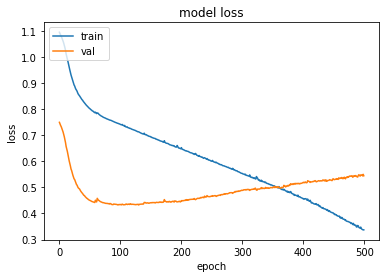

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

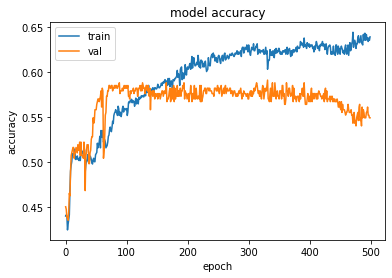

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
# Prediction
predict_raw = model.predict(X_test, verbose=0)
predict_raw.shape

(369, 3)

### <span style="color:red"> ** Using deeper and wider net </span>

In [87]:
l1_norm = 1e-4

model2 = Sequential()
model2.add(Dense(50, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(10):
    model2.add(Dense(50, activation='relu', activity_regularizer=l1(l1_norm)))
model2.add(Dense(3, activation='linear'))

In [93]:
# set learning rate

lr = 1e-4
model2.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
                      batch_size=100, epochs=500,
                      validation_data=(X_test, y_test))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 3ms/sample - loss: 1.1073 - accuracy: 0.4405 - val_loss: 0.7599 - val_accuracy: 0.4179
Epoch 2/500
781/781 [==============================] - 0s 88us/sample - loss: 1.1063 - accuracy: 0.4302 - val_loss: 0.7591 - val_accuracy: 0.4119
Epoch 3/500
781/781 [==============================] - 0s 78us/sample - loss: 1.1052 - accuracy: 0.4149 - val_loss: 0.7583 - val_accuracy: 0.3910
Epoch 4/500
781/781 [==============================] - 0s 79us/sample - loss: 1.1040 - accuracy: 0.3841 - val_loss: 0.7571 - val_accuracy: 0.3701
Epoch 5/500
781/781 [==============================] - 0s 89us/sample - loss: 1.1023 - accuracy: 0.3892 - val_loss: 0.7554 - val_accuracy: 0.3642
Epoch 6/500
781/781 [==============================] - 0s 94us/sample - loss: 1.1001 - accuracy: 0.3969 - val_loss: 0.7528 - val_accuracy: 0.3881
Epoch 7/500
781/781 [==============================] - 0s 104us/sample - loss: 

781/781 [==============================] - 0s 99us/sample - loss: 0.5594 - accuracy: 0.5992 - val_loss: 0.5396 - val_accuracy: 0.5164
Epoch 112/500
781/781 [==============================] - 0s 100us/sample - loss: 0.5571 - accuracy: 0.5928 - val_loss: 0.5369 - val_accuracy: 0.5134
Epoch 113/500
781/781 [==============================] - 0s 93us/sample - loss: 0.5575 - accuracy: 0.6005 - val_loss: 0.5422 - val_accuracy: 0.5194
Epoch 114/500
781/781 [==============================] - 0s 177us/sample - loss: 0.5514 - accuracy: 0.6069 - val_loss: 0.5451 - val_accuracy: 0.5194
Epoch 115/500
781/781 [==============================] - 0s 184us/sample - loss: 0.5520 - accuracy: 0.5980 - val_loss: 0.5521 - val_accuracy: 0.5134
Epoch 116/500
781/781 [==============================] - 0s 185us/sample - loss: 0.5452 - accuracy: 0.6108 - val_loss: 0.5418 - val_accuracy: 0.5164
Epoch 117/500
781/781 [==============================] - 0s 151us/sample - loss: 0.5420 - accuracy: 0.6069 - val_loss: 0.5

781/781 [==============================] - 0s 175us/sample - loss: 0.1593 - accuracy: 0.6120 - val_loss: 0.7733 - val_accuracy: 0.5821
Epoch 222/500
781/781 [==============================] - 0s 185us/sample - loss: 0.1683 - accuracy: 0.6172 - val_loss: 0.7862 - val_accuracy: 0.5851
Epoch 223/500
781/781 [==============================] - 0s 119us/sample - loss: 0.1655 - accuracy: 0.6159 - val_loss: 0.7828 - val_accuracy: 0.5881
Epoch 224/500
781/781 [==============================] - 0s 99us/sample - loss: 0.1606 - accuracy: 0.6223 - val_loss: 0.7861 - val_accuracy: 0.5672
Epoch 225/500
781/781 [==============================] - 0s 105us/sample - loss: 0.1623 - accuracy: 0.6172 - val_loss: 0.7983 - val_accuracy: 0.5791
Epoch 226/500
781/781 [==============================] - 0s 110us/sample - loss: 0.1518 - accuracy: 0.6223 - val_loss: 0.7950 - val_accuracy: 0.5821
Epoch 227/500
781/781 [==============================] - 0s 95us/sample - loss: 0.1503 - accuracy: 0.6172 - val_loss: 0.7

781/781 [==============================] - 0s 115us/sample - loss: 0.0714 - accuracy: 0.6825 - val_loss: 0.7584 - val_accuracy: 0.5642
Epoch 332/500
781/781 [==============================] - 0s 123us/sample - loss: 0.0740 - accuracy: 0.6940 - val_loss: 0.7574 - val_accuracy: 0.5582
Epoch 333/500
781/781 [==============================] - 0s 112us/sample - loss: 0.0763 - accuracy: 0.6863 - val_loss: 0.7364 - val_accuracy: 0.5552
Epoch 334/500
781/781 [==============================] - 0s 122us/sample - loss: 0.0752 - accuracy: 0.6863 - val_loss: 0.7499 - val_accuracy: 0.5761
Epoch 335/500
781/781 [==============================] - 0s 126us/sample - loss: 0.0785 - accuracy: 0.6876 - val_loss: 0.7460 - val_accuracy: 0.5612
Epoch 336/500
781/781 [==============================] - 0s 114us/sample - loss: 0.0735 - accuracy: 0.6863 - val_loss: 0.7527 - val_accuracy: 0.5672
Epoch 337/500
781/781 [==============================] - 0s 114us/sample - loss: 0.0769 - accuracy: 0.6876 - val_loss: 0

781/781 [==============================] - 0s 100us/sample - loss: 0.0534 - accuracy: 0.7273 - val_loss: 0.7406 - val_accuracy: 0.5940
Epoch 442/500
781/781 [==============================] - 0s 104us/sample - loss: 0.0537 - accuracy: 0.7324 - val_loss: 0.7264 - val_accuracy: 0.5881
Epoch 443/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0539 - accuracy: 0.7324 - val_loss: 0.7346 - val_accuracy: 0.5851
Epoch 444/500
781/781 [==============================] - 0s 91us/sample - loss: 0.0541 - accuracy: 0.7362 - val_loss: 0.7318 - val_accuracy: 0.5940
Epoch 445/500
781/781 [==============================] - 0s 103us/sample - loss: 0.0545 - accuracy: 0.7247 - val_loss: 0.7307 - val_accuracy: 0.5970
Epoch 446/500
781/781 [==============================] - 0s 101us/sample - loss: 0.0552 - accuracy: 0.7337 - val_loss: 0.7407 - val_accuracy: 0.5910
Epoch 447/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0539 - accuracy: 0.7375 - val_loss: 0.74

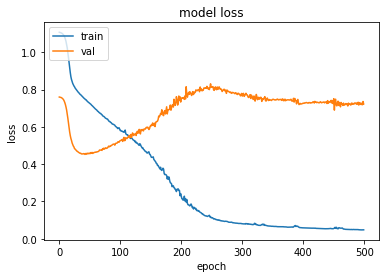

In [94]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<span style="color:green"> These sort of trends mean you are just overfitting the training data. We might just not have enough data for this or we might have to add a lot of regularization and dropout. 

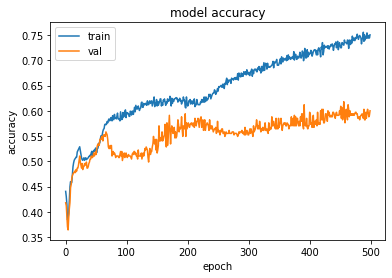

In [95]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Reduce training set </span>

In [99]:
X_train2a, X_test2a, y_train2a, y_test2a = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.3)

In [100]:
l1_norm = 1e-4

model2a = Sequential()
model2a.add(Dense(50, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(10):
    model2a.add(Dense(50, activation='relu', activity_regularizer=l1(l1_norm)))
model2a.add(Dense(3, activation='linear'))

In [101]:
# set learning rate

lr = 1e-4
model2a.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history2a = model2a.fit(X_train2a, y_train2a,
          batch_size=20, epochs=500,
          validation_data=(X_test2a, y_test2a))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 4ms/sample - loss: 0.7647 - accuracy: 0.4264 - val_loss: 1.5585 - val_accuracy: 0.4418
Epoch 2/500
781/781 [==============================] - 0s 258us/sample - loss: 0.7617 - accuracy: 0.4725 - val_loss: 1.5553 - val_accuracy: 0.4657
Epoch 3/500
781/781 [==============================] - 0s 350us/sample - loss: 0.7563 - accuracy: 0.4814 - val_loss: 1.5481 - val_accuracy: 0.4657
Epoch 4/500
781/781 [==============================] - 0s 525us/sample - loss: 0.7407 - accuracy: 0.4981 - val_loss: 1.5287 - val_accuracy: 0.4806
Epoch 5/500
781/781 [==============================] - 0s 517us/sample - loss: 0.7022 - accuracy: 0.5096 - val_loss: 1.4879 - val_accuracy: 0.4955
Epoch 6/500
781/781 [==============================] - 0s 404us/sample - loss: 0.6402 - accuracy: 0.5173 - val_loss: 1.4457 - val_accuracy: 0.4896
Epoch 7/500
781/781 [==============================] - 0s 425us/sample - l

781/781 [==============================] - 0s 440us/sample - loss: 0.1166 - accuracy: 0.6645 - val_loss: 1.6402 - val_accuracy: 0.5104
Epoch 112/500
781/781 [==============================] - 0s 345us/sample - loss: 0.1174 - accuracy: 0.6556 - val_loss: 1.6455 - val_accuracy: 0.4985
Epoch 113/500
781/781 [==============================] - 0s 516us/sample - loss: 0.1481 - accuracy: 0.6530 - val_loss: 1.6410 - val_accuracy: 0.4925
Epoch 114/500
781/781 [==============================] - 0s 495us/sample - loss: 0.1213 - accuracy: 0.6530 - val_loss: 1.6145 - val_accuracy: 0.5194
Epoch 115/500
781/781 [==============================] - 0s 314us/sample - loss: 0.1169 - accuracy: 0.6504 - val_loss: 1.6283 - val_accuracy: 0.5015
Epoch 116/500
781/781 [==============================] - 0s 293us/sample - loss: 0.1171 - accuracy: 0.6594 - val_loss: 1.6337 - val_accuracy: 0.5104
Epoch 117/500
781/781 [==============================] - 0s 304us/sample - loss: 0.1116 - accuracy: 0.6530 - val_loss: 1

781/781 [==============================] - 0s 366us/sample - loss: 0.0814 - accuracy: 0.7119 - val_loss: 1.6420 - val_accuracy: 0.5313
Epoch 167/500
781/781 [==============================] - 0s 403us/sample - loss: 0.0693 - accuracy: 0.7119 - val_loss: 1.6474 - val_accuracy: 0.5552
Epoch 168/500
781/781 [==============================] - 0s 319us/sample - loss: 0.0680 - accuracy: 0.7081 - val_loss: 1.6753 - val_accuracy: 0.5254
Epoch 169/500
781/781 [==============================] - 0s 392us/sample - loss: 0.0742 - accuracy: 0.7055 - val_loss: 1.6668 - val_accuracy: 0.5373
Epoch 170/500
781/781 [==============================] - 0s 399us/sample - loss: 0.0791 - accuracy: 0.7119 - val_loss: 1.6450 - val_accuracy: 0.5463
Epoch 171/500
781/781 [==============================] - 0s 352us/sample - loss: 0.0689 - accuracy: 0.7081 - val_loss: 1.6637 - val_accuracy: 0.5343
Epoch 172/500
781/781 [==============================] - 0s 399us/sample - loss: 0.0695 - accuracy: 0.6978 - val_loss: 1

781/781 [==============================] - 0s 470us/sample - loss: 0.0459 - accuracy: 0.7401 - val_loss: 1.6522 - val_accuracy: 0.5254
Epoch 222/500
781/781 [==============================] - 0s 453us/sample - loss: 0.0452 - accuracy: 0.7439 - val_loss: 1.6638 - val_accuracy: 0.5254
Epoch 223/500
781/781 [==============================] - 0s 440us/sample - loss: 0.0442 - accuracy: 0.7388 - val_loss: 1.6593 - val_accuracy: 0.5313
Epoch 224/500
781/781 [==============================] - 0s 586us/sample - loss: 0.0434 - accuracy: 0.7503 - val_loss: 1.6572 - val_accuracy: 0.5254
Epoch 225/500
781/781 [==============================] - 0s 507us/sample - loss: 0.0434 - accuracy: 0.7554 - val_loss: 1.6647 - val_accuracy: 0.5284
Epoch 226/500
781/781 [==============================] - 0s 622us/sample - loss: 0.0443 - accuracy: 0.7567 - val_loss: 1.6588 - val_accuracy: 0.5403
Epoch 227/500
781/781 [==============================] - 0s 537us/sample - loss: 0.0442 - accuracy: 0.7529 - val_loss: 1

781/781 [==============================] - 0s 449us/sample - loss: 0.0473 - accuracy: 0.7324 - val_loss: 1.6849 - val_accuracy: 0.5075
Epoch 277/500
781/781 [==============================] - 0s 406us/sample - loss: 0.0453 - accuracy: 0.7695 - val_loss: 1.6873 - val_accuracy: 0.5015
Epoch 278/500
781/781 [==============================] - 0s 410us/sample - loss: 0.0452 - accuracy: 0.7695 - val_loss: 1.6799 - val_accuracy: 0.5015
Epoch 279/500
781/781 [==============================] - 0s 388us/sample - loss: 0.0470 - accuracy: 0.7785 - val_loss: 1.6953 - val_accuracy: 0.4925
Epoch 280/500
781/781 [==============================] - 0s 380us/sample - loss: 0.0428 - accuracy: 0.7670 - val_loss: 1.6743 - val_accuracy: 0.5045
Epoch 281/500
781/781 [==============================] - 0s 564us/sample - loss: 0.0617 - accuracy: 0.7798 - val_loss: 1.6756 - val_accuracy: 0.5104
Epoch 282/500
781/781 [==============================] - 0s 591us/sample - loss: 0.0427 - accuracy: 0.7670 - val_loss: 1

781/781 [==============================] - 0s 564us/sample - loss: 0.0303 - accuracy: 0.8131 - val_loss: 1.6812 - val_accuracy: 0.5075
Epoch 332/500
781/781 [==============================] - 0s 577us/sample - loss: 0.0369 - accuracy: 0.7926 - val_loss: 1.6715 - val_accuracy: 0.5104
Epoch 333/500
781/781 [==============================] - 0s 600us/sample - loss: 0.0484 - accuracy: 0.8079 - val_loss: 1.6590 - val_accuracy: 0.5194
Epoch 334/500
781/781 [==============================] - 0s 456us/sample - loss: 0.0317 - accuracy: 0.8054 - val_loss: 1.6783 - val_accuracy: 0.5104
Epoch 335/500
781/781 [==============================] - 0s 417us/sample - loss: 0.0307 - accuracy: 0.8028 - val_loss: 1.6846 - val_accuracy: 0.5075
Epoch 336/500
781/781 [==============================] - 0s 389us/sample - loss: 0.0297 - accuracy: 0.8118 - val_loss: 1.6745 - val_accuracy: 0.5194
Epoch 337/500
781/781 [==============================] - 0s 320us/sample - loss: 0.0298 - accuracy: 0.8118 - val_loss: 1

781/781 [==============================] - 0s 495us/sample - loss: 0.0303 - accuracy: 0.8374 - val_loss: 1.6567 - val_accuracy: 0.5313
Epoch 387/500
781/781 [==============================] - 0s 331us/sample - loss: 0.0300 - accuracy: 0.8412 - val_loss: 1.6604 - val_accuracy: 0.5164
Epoch 388/500
781/781 [==============================] - 0s 505us/sample - loss: 0.0299 - accuracy: 0.8489 - val_loss: 1.6584 - val_accuracy: 0.5224
Epoch 389/500
781/781 [==============================] - 0s 512us/sample - loss: 0.0298 - accuracy: 0.8412 - val_loss: 1.6560 - val_accuracy: 0.5224
Epoch 390/500
781/781 [==============================] - 0s 495us/sample - loss: 0.0295 - accuracy: 0.8399 - val_loss: 1.6626 - val_accuracy: 0.5254
Epoch 391/500
781/781 [==============================] - 0s 518us/sample - loss: 0.0295 - accuracy: 0.8489 - val_loss: 1.6580 - val_accuracy: 0.5194
Epoch 392/500
781/781 [==============================] - 0s 487us/sample - loss: 0.0294 - accuracy: 0.8489 - val_loss: 1

781/781 [==============================] - 0s 573us/sample - loss: 0.0247 - accuracy: 0.8643 - val_loss: 1.6794 - val_accuracy: 0.4955
Epoch 442/500
781/781 [==============================] - 0s 564us/sample - loss: 0.0245 - accuracy: 0.8707 - val_loss: 1.6821 - val_accuracy: 0.4925
Epoch 443/500
781/781 [==============================] - 0s 603us/sample - loss: 0.0242 - accuracy: 0.8630 - val_loss: 1.6762 - val_accuracy: 0.4985
Epoch 444/500
781/781 [==============================] - 0s 555us/sample - loss: 0.0240 - accuracy: 0.8604 - val_loss: 1.6809 - val_accuracy: 0.4985
Epoch 445/500
781/781 [==============================] - 0s 321us/sample - loss: 0.0254 - accuracy: 0.8528 - val_loss: 1.6803 - val_accuracy: 0.4955
Epoch 446/500
781/781 [==============================] - 0s 509us/sample - loss: 0.0243 - accuracy: 0.8566 - val_loss: 1.6743 - val_accuracy: 0.4985
Epoch 447/500
781/781 [==============================] - 0s 345us/sample - loss: 0.0249 - accuracy: 0.8553 - val_loss: 1

781/781 [==============================] - 0s 358us/sample - loss: 0.0261 - accuracy: 0.8592 - val_loss: 1.6593 - val_accuracy: 0.4955
Epoch 497/500
781/781 [==============================] - 0s 348us/sample - loss: 0.0230 - accuracy: 0.8528 - val_loss: 1.6707 - val_accuracy: 0.4896
Epoch 498/500
781/781 [==============================] - 0s 557us/sample - loss: 0.0242 - accuracy: 0.8694 - val_loss: 1.6799 - val_accuracy: 0.4836
Epoch 499/500
781/781 [==============================] - 0s 451us/sample - loss: 0.0231 - accuracy: 0.8643 - val_loss: 1.6803 - val_accuracy: 0.4746
Epoch 500/500
781/781 [==============================] - 0s 306us/sample - loss: 0.0235 - accuracy: 0.8630 - val_loss: 1.6901 - val_accuracy: 0.4746


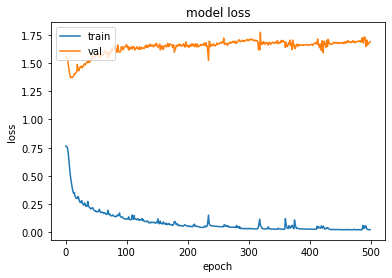

In [102]:
plt.plot(history2a.history['loss'])
plt.plot(history2a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

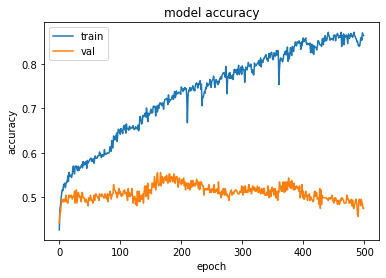

In [103]:
plt.plot(history2a.history['accuracy'])
plt.plot(history2a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<span style="color:green"> This is just overfitting. We might need to downselect the number of features that we have to minimize this. Try first to add dropout. 
    
<span style="color:green"> This might train much better if you add skip layers... Resnet like. You can tell this because when you go to shallower networks your results get better :)

### <span style="color:red"> ** Using 1 hidden layer of mean (8) neurons </span>

reading: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

In [133]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.1)

In [142]:
l1_norm = 1e-4

model3 = Sequential()
model3.add(Dense(13, activation='relu', activity_regularizer=l1(l1_norm)))
model3.add(Dense(8, activation='relu', activity_regularizer=l1(l1_norm)))
model3.add(Dense(3, activation='linear'))

In [143]:
# set learning rate

lr = 1e-4
model3.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history3 = model3.fit(X_train3, y_train3,
          batch_size=100, epochs=5000,
          validation_data=(X_test3, y_test3))


Train on 1004 samples, validate on 112 samples
Epoch 1/5000
1004/1004 [==============================] - 1s 930us/sample - loss: 1.3787 - accuracy: 0.3606 - val_loss: 0.8548 - val_accuracy: 0.3750
Epoch 2/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 1.3619 - accuracy: 0.3606 - val_loss: 0.8377 - val_accuracy: 0.3750
Epoch 3/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 1.3472 - accuracy: 0.3606 - val_loss: 0.8219 - val_accuracy: 0.3661
Epoch 4/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 1.3341 - accuracy: 0.3616 - val_loss: 0.8072 - val_accuracy: 0.3661
Epoch 5/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 1.3206 - accuracy: 0.3606 - val_loss: 0.7920 - val_accuracy: 0.3571
Epoch 6/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 1.3070 - accuracy: 0.3596 - val_loss: 0.7775 - val_accuracy: 0.3571
Epoch 7/5000
1004/1004 [==============================] - 

1004/1004 [==============================] - 0s 73us/sample - loss: 0.9022 - accuracy: 0.4691 - val_loss: 0.4027 - val_accuracy: 0.4821
Epoch 110/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.9011 - accuracy: 0.4691 - val_loss: 0.4029 - val_accuracy: 0.4911
Epoch 111/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.9000 - accuracy: 0.4691 - val_loss: 0.4023 - val_accuracy: 0.4911
Epoch 112/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8988 - accuracy: 0.4741 - val_loss: 0.4018 - val_accuracy: 0.4911
Epoch 113/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8974 - accuracy: 0.4751 - val_loss: 0.4014 - val_accuracy: 0.5000
Epoch 114/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8962 - accuracy: 0.4741 - val_loss: 0.4011 - val_accuracy: 0.5000
Epoch 115/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8950 - accuracy: 0.4741 

1004/1004 [==============================] - 0s 74us/sample - loss: 0.8262 - accuracy: 0.5000 - val_loss: 0.3955 - val_accuracy: 0.4643
Epoch 218/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8259 - accuracy: 0.5010 - val_loss: 0.3953 - val_accuracy: 0.4643
Epoch 219/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8254 - accuracy: 0.5010 - val_loss: 0.3952 - val_accuracy: 0.4732
Epoch 220/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.8249 - accuracy: 0.5010 - val_loss: 0.3956 - val_accuracy: 0.4732
Epoch 221/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8244 - accuracy: 0.5010 - val_loss: 0.3956 - val_accuracy: 0.4732
Epoch 222/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8240 - accuracy: 0.5020 - val_loss: 0.3957 - val_accuracy: 0.4732
Epoch 223/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8236 - accuracy: 0.5020 

1004/1004 [==============================] - 0s 86us/sample - loss: 0.7941 - accuracy: 0.5010 - val_loss: 0.3919 - val_accuracy: 0.4911
Epoch 326/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7939 - accuracy: 0.5000 - val_loss: 0.3917 - val_accuracy: 0.4911
Epoch 327/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7938 - accuracy: 0.5000 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 328/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7937 - accuracy: 0.4970 - val_loss: 0.3905 - val_accuracy: 0.4911
Epoch 329/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7938 - accuracy: 0.4980 - val_loss: 0.3903 - val_accuracy: 0.4911
Epoch 330/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7935 - accuracy: 0.4960 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 331/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7931 - accuracy: 0.4970 

1004/1004 [==============================] - 0s 87us/sample - loss: 0.7748 - accuracy: 0.5169 - val_loss: 0.3905 - val_accuracy: 0.5089
Epoch 434/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7747 - accuracy: 0.5149 - val_loss: 0.3910 - val_accuracy: 0.5089
Epoch 435/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.7745 - accuracy: 0.5129 - val_loss: 0.3917 - val_accuracy: 0.5089
Epoch 436/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7745 - accuracy: 0.5129 - val_loss: 0.3918 - val_accuracy: 0.5089
Epoch 437/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7743 - accuracy: 0.5149 - val_loss: 0.3914 - val_accuracy: 0.5089
Epoch 438/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7741 - accuracy: 0.5149 - val_loss: 0.3910 - val_accuracy: 0.5089
Epoch 439/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7739 - accuracy: 0.5139

1004/1004 [==============================] - 0s 84us/sample - loss: 0.7623 - accuracy: 0.5189 - val_loss: 0.3881 - val_accuracy: 0.5179
Epoch 542/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7622 - accuracy: 0.5199 - val_loss: 0.3890 - val_accuracy: 0.5268
Epoch 543/5000
1004/1004 [==============================] - 0s 99us/sample - loss: 0.7621 - accuracy: 0.5199 - val_loss: 0.3892 - val_accuracy: 0.5268
Epoch 544/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7620 - accuracy: 0.5179 - val_loss: 0.3891 - val_accuracy: 0.5268
Epoch 545/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7618 - accuracy: 0.5209 - val_loss: 0.3881 - val_accuracy: 0.5089
Epoch 546/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.7618 - accuracy: 0.5249 - val_loss: 0.3880 - val_accuracy: 0.5089
Epoch 547/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7617 - accuracy: 0.524

1004/1004 [==============================] - 0s 45us/sample - loss: 0.7523 - accuracy: 0.5239 - val_loss: 0.3888 - val_accuracy: 0.5268
Epoch 650/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7523 - accuracy: 0.5239 - val_loss: 0.3889 - val_accuracy: 0.5268
Epoch 651/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7522 - accuracy: 0.5249 - val_loss: 0.3889 - val_accuracy: 0.5357
Epoch 652/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7521 - accuracy: 0.5239 - val_loss: 0.3894 - val_accuracy: 0.5357
Epoch 653/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7520 - accuracy: 0.5249 - val_loss: 0.3899 - val_accuracy: 0.5268
Epoch 654/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.7520 - accuracy: 0.5259 - val_loss: 0.3891 - val_accuracy: 0.5357
Epoch 655/5000
1004/1004 [==============================] - 0s 109us/sample - loss: 0.7517 - accuracy: 0.525

Epoch 757/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7432 - accuracy: 0.5319 - val_loss: 0.3863 - val_accuracy: 0.5357
Epoch 758/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7432 - accuracy: 0.5319 - val_loss: 0.3851 - val_accuracy: 0.5446
Epoch 759/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7431 - accuracy: 0.5329 - val_loss: 0.3847 - val_accuracy: 0.5446
Epoch 760/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7430 - accuracy: 0.5349 - val_loss: 0.3846 - val_accuracy: 0.5446
Epoch 761/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7429 - accuracy: 0.5329 - val_loss: 0.3852 - val_accuracy: 0.5446
Epoch 762/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7428 - accuracy: 0.5329 - val_loss: 0.3855 - val_accuracy: 0.5446
Epoch 763/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7428 - ac

1004/1004 [==============================] - 0s 85us/sample - loss: 0.7357 - accuracy: 0.5398 - val_loss: 0.3828 - val_accuracy: 0.5536
Epoch 866/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7356 - accuracy: 0.5408 - val_loss: 0.3828 - val_accuracy: 0.5446
Epoch 867/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7355 - accuracy: 0.5388 - val_loss: 0.3824 - val_accuracy: 0.5446
Epoch 868/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7354 - accuracy: 0.5388 - val_loss: 0.3821 - val_accuracy: 0.5536
Epoch 869/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7355 - accuracy: 0.5398 - val_loss: 0.3810 - val_accuracy: 0.5536
Epoch 870/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.7353 - accuracy: 0.5388 - val_loss: 0.3808 - val_accuracy: 0.5536
Epoch 871/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7352 - accuracy: 0.5388 

1004/1004 [==============================] - 0s 71us/sample - loss: 0.7287 - accuracy: 0.5349 - val_loss: 0.3887 - val_accuracy: 0.5625
Epoch 974/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7287 - accuracy: 0.5359 - val_loss: 0.3887 - val_accuracy: 0.5714
Epoch 975/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7286 - accuracy: 0.5369 - val_loss: 0.3888 - val_accuracy: 0.5714
Epoch 976/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7284 - accuracy: 0.5369 - val_loss: 0.3887 - val_accuracy: 0.5714
Epoch 977/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7284 - accuracy: 0.5388 - val_loss: 0.3892 - val_accuracy: 0.5714
Epoch 978/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7283 - accuracy: 0.5418 - val_loss: 0.3891 - val_accuracy: 0.5714
Epoch 979/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7283 - accuracy: 0.5428 

Epoch 1081/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7226 - accuracy: 0.5408 - val_loss: 0.3903 - val_accuracy: 0.5446
Epoch 1082/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7225 - accuracy: 0.5369 - val_loss: 0.3900 - val_accuracy: 0.5446
Epoch 1083/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7224 - accuracy: 0.5378 - val_loss: 0.3900 - val_accuracy: 0.5357
Epoch 1084/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7224 - accuracy: 0.5388 - val_loss: 0.3904 - val_accuracy: 0.5357
Epoch 1085/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7222 - accuracy: 0.5398 - val_loss: 0.3907 - val_accuracy: 0.5357
Epoch 1086/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7223 - accuracy: 0.5378 - val_loss: 0.3895 - val_accuracy: 0.5357
Epoch 1087/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.72

Epoch 1135/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7193 - accuracy: 0.5428 - val_loss: 0.3892 - val_accuracy: 0.5625
Epoch 1136/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7193 - accuracy: 0.5398 - val_loss: 0.3895 - val_accuracy: 0.5625
Epoch 1137/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7194 - accuracy: 0.5388 - val_loss: 0.3895 - val_accuracy: 0.5625
Epoch 1138/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7194 - accuracy: 0.5388 - val_loss: 0.3902 - val_accuracy: 0.5625
Epoch 1139/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0.7193 - accuracy: 0.5428 - val_loss: 0.3909 - val_accuracy: 0.5625
Epoch 1140/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7194 - accuracy: 0.5388 - val_loss: 0.3920 - val_accuracy: 0.5536
Epoch 1141/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0

Epoch 1189/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7164 - accuracy: 0.5458 - val_loss: 0.3832 - val_accuracy: 0.5804
Epoch 1190/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7164 - accuracy: 0.5448 - val_loss: 0.3830 - val_accuracy: 0.5804
Epoch 1191/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7164 - accuracy: 0.5448 - val_loss: 0.3832 - val_accuracy: 0.5714
Epoch 1192/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7162 - accuracy: 0.5438 - val_loss: 0.3836 - val_accuracy: 0.5714
Epoch 1193/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7162 - accuracy: 0.5428 - val_loss: 0.3839 - val_accuracy: 0.5804
Epoch 1194/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7162 - accuracy: 0.5438 - val_loss: 0.3835 - val_accuracy: 0.5714
Epoch 1195/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.71

Epoch 1243/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7136 - accuracy: 0.5448 - val_loss: 0.3837 - val_accuracy: 0.5714
Epoch 1244/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7136 - accuracy: 0.5448 - val_loss: 0.3835 - val_accuracy: 0.5714
Epoch 1245/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7135 - accuracy: 0.5458 - val_loss: 0.3831 - val_accuracy: 0.5714
Epoch 1246/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7134 - accuracy: 0.5458 - val_loss: 0.3830 - val_accuracy: 0.5714
Epoch 1247/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7134 - accuracy: 0.5458 - val_loss: 0.3833 - val_accuracy: 0.5714
Epoch 1248/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7133 - accuracy: 0.5458 - val_loss: 0.3837 - val_accuracy: 0.5714
Epoch 1249/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.71

Epoch 1297/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7110 - accuracy: 0.5468 - val_loss: 0.3817 - val_accuracy: 0.5625
Epoch 1298/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7110 - accuracy: 0.5468 - val_loss: 0.3819 - val_accuracy: 0.5714
Epoch 1299/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7110 - accuracy: 0.5468 - val_loss: 0.3808 - val_accuracy: 0.5625
Epoch 1300/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7109 - accuracy: 0.5478 - val_loss: 0.3809 - val_accuracy: 0.5625
Epoch 1301/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7108 - accuracy: 0.5458 - val_loss: 0.3816 - val_accuracy: 0.5625
Epoch 1302/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7108 - accuracy: 0.5478 - val_loss: 0.3818 - val_accuracy: 0.5625
Epoch 1303/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.71

Epoch 1351/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7084 - accuracy: 0.5448 - val_loss: 0.3816 - val_accuracy: 0.5625
Epoch 1352/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7084 - accuracy: 0.5448 - val_loss: 0.3814 - val_accuracy: 0.5625
Epoch 1353/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7082 - accuracy: 0.5458 - val_loss: 0.3820 - val_accuracy: 0.5625
Epoch 1354/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.7082 - accuracy: 0.5448 - val_loss: 0.3821 - val_accuracy: 0.5625
Epoch 1355/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3818 - val_accuracy: 0.5625
Epoch 1356/5000
1004/1004 [==============================] - 0s 115us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3817 - val_accuracy: 0.5625
Epoch 1357/5000
1004/1004 [==============================] - 0s 130us/sample - loss: 0.

Epoch 1405/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7056 - accuracy: 0.5418 - val_loss: 0.3830 - val_accuracy: 0.5625
Epoch 1406/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7056 - accuracy: 0.5448 - val_loss: 0.3838 - val_accuracy: 0.5714
Epoch 1407/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7056 - accuracy: 0.5438 - val_loss: 0.3838 - val_accuracy: 0.5714
Epoch 1408/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7056 - accuracy: 0.5438 - val_loss: 0.3836 - val_accuracy: 0.5714
Epoch 1409/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7055 - accuracy: 0.5448 - val_loss: 0.3836 - val_accuracy: 0.5714
Epoch 1410/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7054 - accuracy: 0.5448 - val_loss: 0.3848 - val_accuracy: 0.5625
Epoch 1411/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.70

Epoch 1459/5000
1004/1004 [==============================] - 0s 127us/sample - loss: 0.7031 - accuracy: 0.5438 - val_loss: 0.3799 - val_accuracy: 0.5714
Epoch 1460/5000
1004/1004 [==============================] - 0s 120us/sample - loss: 0.7029 - accuracy: 0.5428 - val_loss: 0.3802 - val_accuracy: 0.5714
Epoch 1461/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.7029 - accuracy: 0.5408 - val_loss: 0.3802 - val_accuracy: 0.5714
Epoch 1462/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7028 - accuracy: 0.5408 - val_loss: 0.3802 - val_accuracy: 0.5714
Epoch 1463/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7027 - accuracy: 0.5408 - val_loss: 0.3803 - val_accuracy: 0.5714
Epoch 1464/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.7027 - accuracy: 0.5408 - val_loss: 0.3806 - val_accuracy: 0.5714
Epoch 1465/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 

Epoch 1513/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7005 - accuracy: 0.5398 - val_loss: 0.3786 - val_accuracy: 0.5625
Epoch 1514/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7007 - accuracy: 0.5388 - val_loss: 0.3768 - val_accuracy: 0.5625
Epoch 1515/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7007 - accuracy: 0.5378 - val_loss: 0.3763 - val_accuracy: 0.5625
Epoch 1516/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7006 - accuracy: 0.5359 - val_loss: 0.3764 - val_accuracy: 0.5536
Epoch 1517/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7005 - accuracy: 0.5369 - val_loss: 0.3765 - val_accuracy: 0.5536
Epoch 1518/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7005 - accuracy: 0.5388 - val_loss: 0.3757 - val_accuracy: 0.5536
Epoch 1519/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.70

Epoch 1567/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6979 - accuracy: 0.5369 - val_loss: 0.3811 - val_accuracy: 0.5446
Epoch 1568/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6979 - accuracy: 0.5359 - val_loss: 0.3808 - val_accuracy: 0.5446
Epoch 1569/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6979 - accuracy: 0.5369 - val_loss: 0.3807 - val_accuracy: 0.5446
Epoch 1570/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.6977 - accuracy: 0.5378 - val_loss: 0.3818 - val_accuracy: 0.5446
Epoch 1571/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6977 - accuracy: 0.5369 - val_loss: 0.3827 - val_accuracy: 0.5446
Epoch 1572/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6978 - accuracy: 0.5388 - val_loss: 0.3835 - val_accuracy: 0.5446
Epoch 1573/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6

Epoch 1621/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6959 - accuracy: 0.5438 - val_loss: 0.3853 - val_accuracy: 0.5804
Epoch 1622/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6958 - accuracy: 0.5428 - val_loss: 0.3856 - val_accuracy: 0.5804
Epoch 1623/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6959 - accuracy: 0.5428 - val_loss: 0.3854 - val_accuracy: 0.5804
Epoch 1624/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6958 - accuracy: 0.5418 - val_loss: 0.3854 - val_accuracy: 0.5804
Epoch 1625/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6957 - accuracy: 0.5418 - val_loss: 0.3858 - val_accuracy: 0.5804
Epoch 1626/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6958 - accuracy: 0.5428 - val_loss: 0.3866 - val_accuracy: 0.5804
Epoch 1627/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.69

Epoch 1675/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6938 - accuracy: 0.5438 - val_loss: 0.3855 - val_accuracy: 0.5625
Epoch 1676/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6937 - accuracy: 0.5458 - val_loss: 0.3864 - val_accuracy: 0.5625
Epoch 1677/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6937 - accuracy: 0.5428 - val_loss: 0.3881 - val_accuracy: 0.5446
Epoch 1678/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6939 - accuracy: 0.5408 - val_loss: 0.3885 - val_accuracy: 0.5446
Epoch 1679/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6938 - accuracy: 0.5418 - val_loss: 0.3882 - val_accuracy: 0.5446
Epoch 1680/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6938 - accuracy: 0.5418 - val_loss: 0.3873 - val_accuracy: 0.5446
Epoch 1681/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.69

Epoch 1729/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6920 - accuracy: 0.5438 - val_loss: 0.3804 - val_accuracy: 0.5446
Epoch 1730/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6920 - accuracy: 0.5438 - val_loss: 0.3805 - val_accuracy: 0.5446
Epoch 1731/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6919 - accuracy: 0.5458 - val_loss: 0.3809 - val_accuracy: 0.5536
Epoch 1732/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6919 - accuracy: 0.5448 - val_loss: 0.3804 - val_accuracy: 0.5536
Epoch 1733/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6918 - accuracy: 0.5438 - val_loss: 0.3809 - val_accuracy: 0.5625
Epoch 1734/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6918 - accuracy: 0.5438 - val_loss: 0.3812 - val_accuracy: 0.5625
Epoch 1735/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.69

Epoch 1783/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6900 - accuracy: 0.5418 - val_loss: 0.3830 - val_accuracy: 0.5625
Epoch 1784/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.6899 - accuracy: 0.5418 - val_loss: 0.3832 - val_accuracy: 0.5625
Epoch 1785/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6898 - accuracy: 0.5438 - val_loss: 0.3832 - val_accuracy: 0.5625
Epoch 1786/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6898 - accuracy: 0.5438 - val_loss: 0.3838 - val_accuracy: 0.5625
Epoch 1787/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6897 - accuracy: 0.5428 - val_loss: 0.3842 - val_accuracy: 0.5625
Epoch 1788/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6896 - accuracy: 0.5448 - val_loss: 0.3849 - val_accuracy: 0.5625
Epoch 1789/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6

Epoch 1837/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6880 - accuracy: 0.5438 - val_loss: 0.3887 - val_accuracy: 0.5536
Epoch 1838/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6880 - accuracy: 0.5438 - val_loss: 0.3890 - val_accuracy: 0.5536
Epoch 1839/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6881 - accuracy: 0.5418 - val_loss: 0.3905 - val_accuracy: 0.5536
Epoch 1840/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6881 - accuracy: 0.5428 - val_loss: 0.3909 - val_accuracy: 0.5536
Epoch 1841/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6880 - accuracy: 0.5428 - val_loss: 0.3911 - val_accuracy: 0.5536
Epoch 1842/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6880 - accuracy: 0.5418 - val_loss: 0.3913 - val_accuracy: 0.5625
Epoch 1843/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.68

Epoch 1891/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6865 - accuracy: 0.5369 - val_loss: 0.3813 - val_accuracy: 0.5179
Epoch 1892/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6865 - accuracy: 0.5378 - val_loss: 0.3807 - val_accuracy: 0.5179
Epoch 1893/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6863 - accuracy: 0.5369 - val_loss: 0.3810 - val_accuracy: 0.5179
Epoch 1894/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6862 - accuracy: 0.5369 - val_loss: 0.3808 - val_accuracy: 0.5179
Epoch 1895/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6862 - accuracy: 0.5369 - val_loss: 0.3792 - val_accuracy: 0.5179
Epoch 1896/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6864 - accuracy: 0.5378 - val_loss: 0.3789 - val_accuracy: 0.5179
Epoch 1897/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.68

Epoch 1945/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6844 - accuracy: 0.5378 - val_loss: 0.3851 - val_accuracy: 0.5268
Epoch 1946/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6843 - accuracy: 0.5388 - val_loss: 0.3845 - val_accuracy: 0.5268
Epoch 1947/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6844 - accuracy: 0.5388 - val_loss: 0.3833 - val_accuracy: 0.5268
Epoch 1948/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6843 - accuracy: 0.5418 - val_loss: 0.3832 - val_accuracy: 0.5268
Epoch 1949/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6844 - accuracy: 0.5418 - val_loss: 0.3833 - val_accuracy: 0.5268
Epoch 1950/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6843 - accuracy: 0.5408 - val_loss: 0.3842 - val_accuracy: 0.5268
Epoch 1951/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.68

Epoch 1999/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6824 - accuracy: 0.5398 - val_loss: 0.3895 - val_accuracy: 0.5357
Epoch 2000/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6823 - accuracy: 0.5388 - val_loss: 0.3890 - val_accuracy: 0.5357
Epoch 2001/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6825 - accuracy: 0.5398 - val_loss: 0.3873 - val_accuracy: 0.5268
Epoch 2002/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6823 - accuracy: 0.5418 - val_loss: 0.3876 - val_accuracy: 0.5268
Epoch 2003/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6822 - accuracy: 0.5408 - val_loss: 0.3879 - val_accuracy: 0.5268
Epoch 2004/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6822 - accuracy: 0.5398 - val_loss: 0.3882 - val_accuracy: 0.5268
Epoch 2005/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.68

Epoch 2053/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6805 - accuracy: 0.5438 - val_loss: 0.3920 - val_accuracy: 0.5357
Epoch 2054/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6804 - accuracy: 0.5408 - val_loss: 0.3919 - val_accuracy: 0.5268
Epoch 2055/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6804 - accuracy: 0.5428 - val_loss: 0.3920 - val_accuracy: 0.5268
Epoch 2056/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6804 - accuracy: 0.5428 - val_loss: 0.3919 - val_accuracy: 0.5179
Epoch 2057/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6804 - accuracy: 0.5418 - val_loss: 0.3916 - val_accuracy: 0.5179
Epoch 2058/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6802 - accuracy: 0.5428 - val_loss: 0.3922 - val_accuracy: 0.5179
Epoch 2059/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.68

Epoch 2107/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6787 - accuracy: 0.5428 - val_loss: 0.3901 - val_accuracy: 0.5357
Epoch 2108/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6786 - accuracy: 0.5418 - val_loss: 0.3899 - val_accuracy: 0.5357
Epoch 2109/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6785 - accuracy: 0.5418 - val_loss: 0.3901 - val_accuracy: 0.5179
Epoch 2110/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6786 - accuracy: 0.5378 - val_loss: 0.3903 - val_accuracy: 0.5089
Epoch 2111/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6784 - accuracy: 0.5408 - val_loss: 0.3902 - val_accuracy: 0.5179
Epoch 2112/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6784 - accuracy: 0.5408 - val_loss: 0.3902 - val_accuracy: 0.5179
Epoch 2113/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.67

Epoch 2161/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6764 - accuracy: 0.5428 - val_loss: 0.3943 - val_accuracy: 0.5089
Epoch 2162/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6764 - accuracy: 0.5418 - val_loss: 0.3949 - val_accuracy: 0.5089
Epoch 2163/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6763 - accuracy: 0.5418 - val_loss: 0.3938 - val_accuracy: 0.5089
Epoch 2164/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6763 - accuracy: 0.5438 - val_loss: 0.3935 - val_accuracy: 0.5179
Epoch 2165/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6764 - accuracy: 0.5438 - val_loss: 0.3930 - val_accuracy: 0.5089
Epoch 2166/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6763 - accuracy: 0.5408 - val_loss: 0.3931 - val_accuracy: 0.5089
Epoch 2167/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.67

Epoch 2215/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6746 - accuracy: 0.5488 - val_loss: 0.3963 - val_accuracy: 0.5179
Epoch 2216/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3963 - val_accuracy: 0.5179
Epoch 2217/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3961 - val_accuracy: 0.5179
Epoch 2218/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6744 - accuracy: 0.5488 - val_loss: 0.3960 - val_accuracy: 0.5179
Epoch 2219/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6744 - accuracy: 0.5488 - val_loss: 0.3959 - val_accuracy: 0.5179
Epoch 2220/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6745 - accuracy: 0.5498 - val_loss: 0.3953 - val_accuracy: 0.5179
Epoch 2221/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.67

Epoch 2269/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6729 - accuracy: 0.5478 - val_loss: 0.3892 - val_accuracy: 0.5089
Epoch 2270/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6727 - accuracy: 0.5478 - val_loss: 0.3907 - val_accuracy: 0.5089
Epoch 2271/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6727 - accuracy: 0.5468 - val_loss: 0.3927 - val_accuracy: 0.5089
Epoch 2272/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6725 - accuracy: 0.5448 - val_loss: 0.3934 - val_accuracy: 0.5089
Epoch 2273/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6725 - accuracy: 0.5438 - val_loss: 0.3937 - val_accuracy: 0.5089
Epoch 2274/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6725 - accuracy: 0.5428 - val_loss: 0.3940 - val_accuracy: 0.5089
Epoch 2275/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.67

Epoch 2323/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6708 - accuracy: 0.5428 - val_loss: 0.3964 - val_accuracy: 0.5089
Epoch 2324/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6708 - accuracy: 0.5408 - val_loss: 0.3949 - val_accuracy: 0.5089
Epoch 2325/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6706 - accuracy: 0.5418 - val_loss: 0.3935 - val_accuracy: 0.5089
Epoch 2326/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6707 - accuracy: 0.5418 - val_loss: 0.3930 - val_accuracy: 0.5089
Epoch 2327/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6707 - accuracy: 0.5428 - val_loss: 0.3924 - val_accuracy: 0.5089
Epoch 2328/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6707 - accuracy: 0.5438 - val_loss: 0.3932 - val_accuracy: 0.5089
Epoch 2329/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.67

Epoch 2377/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6690 - accuracy: 0.5418 - val_loss: 0.4001 - val_accuracy: 0.5179
Epoch 2378/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6691 - accuracy: 0.5418 - val_loss: 0.3985 - val_accuracy: 0.5089
Epoch 2379/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6691 - accuracy: 0.5428 - val_loss: 0.3980 - val_accuracy: 0.5089
Epoch 2380/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6690 - accuracy: 0.5448 - val_loss: 0.3978 - val_accuracy: 0.5089
Epoch 2381/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6690 - accuracy: 0.5468 - val_loss: 0.3991 - val_accuracy: 0.5089
Epoch 2382/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6688 - accuracy: 0.5458 - val_loss: 0.3982 - val_accuracy: 0.5089
Epoch 2383/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.66

Epoch 2431/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6673 - accuracy: 0.5438 - val_loss: 0.4011 - val_accuracy: 0.5089
Epoch 2432/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6673 - accuracy: 0.5438 - val_loss: 0.4009 - val_accuracy: 0.5089
Epoch 2433/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6672 - accuracy: 0.5438 - val_loss: 0.4003 - val_accuracy: 0.5089
Epoch 2434/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6672 - accuracy: 0.5458 - val_loss: 0.4000 - val_accuracy: 0.5089
Epoch 2435/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6671 - accuracy: 0.5448 - val_loss: 0.3995 - val_accuracy: 0.5089
Epoch 2436/5000
1004/1004 [==============================] - 0s 100us/sample - loss: 0.6671 - accuracy: 0.5428 - val_loss: 0.3993 - val_accuracy: 0.5089
Epoch 2437/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6

Epoch 2485/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6659 - accuracy: 0.5388 - val_loss: 0.3989 - val_accuracy: 0.5089
Epoch 2486/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6657 - accuracy: 0.5418 - val_loss: 0.3994 - val_accuracy: 0.5089
Epoch 2487/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6657 - accuracy: 0.5408 - val_loss: 0.4001 - val_accuracy: 0.5089
Epoch 2488/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6657 - accuracy: 0.5398 - val_loss: 0.3994 - val_accuracy: 0.5089
Epoch 2489/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6656 - accuracy: 0.5388 - val_loss: 0.3977 - val_accuracy: 0.5089
Epoch 2490/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6656 - accuracy: 0.5398 - val_loss: 0.3971 - val_accuracy: 0.5089
Epoch 2491/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.66

Epoch 2539/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6643 - accuracy: 0.5408 - val_loss: 0.3998 - val_accuracy: 0.5179
Epoch 2540/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6642 - accuracy: 0.5408 - val_loss: 0.4001 - val_accuracy: 0.5179
Epoch 2541/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.6642 - accuracy: 0.5408 - val_loss: 0.4004 - val_accuracy: 0.5179
Epoch 2542/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6641 - accuracy: 0.5408 - val_loss: 0.4003 - val_accuracy: 0.5179
Epoch 2543/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6641 - accuracy: 0.5408 - val_loss: 0.4000 - val_accuracy: 0.5179
Epoch 2544/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6641 - accuracy: 0.5418 - val_loss: 0.3972 - val_accuracy: 0.5179
Epoch 2545/5000
1004/1004 [==============================] - 0s 103us/sample - loss: 0.6

Epoch 2593/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6628 - accuracy: 0.5388 - val_loss: 0.4048 - val_accuracy: 0.5179
Epoch 2594/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6627 - accuracy: 0.5388 - val_loss: 0.4050 - val_accuracy: 0.5179
Epoch 2595/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6626 - accuracy: 0.5408 - val_loss: 0.4050 - val_accuracy: 0.5179
Epoch 2596/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6626 - accuracy: 0.5388 - val_loss: 0.4050 - val_accuracy: 0.5179
Epoch 2597/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6627 - accuracy: 0.5408 - val_loss: 0.4070 - val_accuracy: 0.5179
Epoch 2598/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6629 - accuracy: 0.5428 - val_loss: 0.4078 - val_accuracy: 0.5179
Epoch 2599/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.66

Epoch 2647/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6615 - accuracy: 0.5428 - val_loss: 0.4000 - val_accuracy: 0.5179
Epoch 2648/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6614 - accuracy: 0.5448 - val_loss: 0.4009 - val_accuracy: 0.5179
Epoch 2649/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.6628 - accuracy: 0.54 - 0s 79us/sample - loss: 0.6613 - accuracy: 0.5448 - val_loss: 0.4018 - val_accuracy: 0.5179
Epoch 2650/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6613 - accuracy: 0.5448 - val_loss: 0.4028 - val_accuracy: 0.5179
Epoch 2651/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6613 - accuracy: 0.5448 - val_loss: 0.4021 - val_accuracy: 0.5179
Epoch 2652/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6612 - accuracy: 0.5448 - val_loss: 0.4026 - val_accuracy: 0.5179
Epoch 2653/5000
1004/1004 [===================

1004/1004 [==============================] - 0s 77us/sample - loss: 0.6582 - accuracy: 0.5468 - val_loss: 0.4098 - val_accuracy: 0.5179
Epoch 2755/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.6582 - accuracy: 0.5458 - val_loss: 0.4097 - val_accuracy: 0.5179
Epoch 2756/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6581 - accuracy: 0.5458 - val_loss: 0.4099 - val_accuracy: 0.5179
Epoch 2757/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6581 - accuracy: 0.5458 - val_loss: 0.4104 - val_accuracy: 0.5179
Epoch 2758/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6581 - accuracy: 0.5458 - val_loss: 0.4105 - val_accuracy: 0.5179
Epoch 2759/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6580 - accuracy: 0.5448 - val_loss: 0.4105 - val_accuracy: 0.5179
Epoch 2760/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6581 - accuracy: 0

Epoch 2808/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6568 - accuracy: 0.5518 - val_loss: 0.4158 - val_accuracy: 0.5000
Epoch 2809/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6568 - accuracy: 0.5508 - val_loss: 0.4156 - val_accuracy: 0.5000
Epoch 2810/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6567 - accuracy: 0.5488 - val_loss: 0.4153 - val_accuracy: 0.5089
Epoch 2811/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6567 - accuracy: 0.5478 - val_loss: 0.4149 - val_accuracy: 0.5089
Epoch 2812/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6566 - accuracy: 0.5488 - val_loss: 0.4149 - val_accuracy: 0.5089
Epoch 2813/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6566 - accuracy: 0.5478 - val_loss: 0.4158 - val_accuracy: 0.5089
Epoch 2814/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.65

Epoch 2915/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6538 - accuracy: 0.5458 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 2916/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6542 - accuracy: 0.5458 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 2917/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6543 - accuracy: 0.5468 - val_loss: 0.4163 - val_accuracy: 0.5000
Epoch 2918/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6543 - accuracy: 0.5478 - val_loss: 0.4177 - val_accuracy: 0.5000
Epoch 2919/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6543 - accuracy: 0.5468 - val_loss: 0.4186 - val_accuracy: 0.5000
Epoch 2920/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6541 - accuracy: 0.5468 - val_loss: 0.4186 - val_accuracy: 0.5000
Epoch 2921/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.65

Epoch 2969/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6525 - accuracy: 0.5518 - val_loss: 0.4189 - val_accuracy: 0.5000
Epoch 2970/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6526 - accuracy: 0.5518 - val_loss: 0.4195 - val_accuracy: 0.5000
Epoch 2971/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6524 - accuracy: 0.5498 - val_loss: 0.4196 - val_accuracy: 0.5000
Epoch 2972/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6523 - accuracy: 0.5508 - val_loss: 0.4190 - val_accuracy: 0.5000
Epoch 2973/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6523 - accuracy: 0.5488 - val_loss: 0.4188 - val_accuracy: 0.5000
Epoch 2974/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6523 - accuracy: 0.5488 - val_loss: 0.4189 - val_accuracy: 0.5000
Epoch 2975/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.65

Epoch 3023/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6511 - accuracy: 0.5528 - val_loss: 0.4172 - val_accuracy: 0.5000
Epoch 3024/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6511 - accuracy: 0.5518 - val_loss: 0.4167 - val_accuracy: 0.5000
Epoch 3025/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6511 - accuracy: 0.5518 - val_loss: 0.4171 - val_accuracy: 0.5000
Epoch 3026/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6511 - accuracy: 0.5508 - val_loss: 0.4166 - val_accuracy: 0.5000
Epoch 3027/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6512 - accuracy: 0.5498 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 3028/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6511 - accuracy: 0.5488 - val_loss: 0.4161 - val_accuracy: 0.5000
Epoch 3029/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.65

Epoch 3077/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.6498 - accuracy: 0.5498 - val_loss: 0.4217 - val_accuracy: 0.5000
Epoch 3078/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6498 - accuracy: 0.5508 - val_loss: 0.4219 - val_accuracy: 0.5000
Epoch 3079/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6497 - accuracy: 0.5498 - val_loss: 0.4211 - val_accuracy: 0.5000
Epoch 3080/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.4206 - val_accuracy: 0.5000
Epoch 3081/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.4197 - val_accuracy: 0.5000
Epoch 3082/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.4195 - val_accuracy: 0.5000
Epoch 3083/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.64

Epoch 3131/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6485 - accuracy: 0.5468 - val_loss: 0.4266 - val_accuracy: 0.5000
Epoch 3132/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6484 - accuracy: 0.5478 - val_loss: 0.4270 - val_accuracy: 0.5000
Epoch 3133/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6488 - accuracy: 0.5458 - val_loss: 0.4295 - val_accuracy: 0.5000
Epoch 3134/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6486 - accuracy: 0.5458 - val_loss: 0.4298 - val_accuracy: 0.5000
Epoch 3135/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6486 - accuracy: 0.5468 - val_loss: 0.4294 - val_accuracy: 0.5000
Epoch 3136/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6485 - accuracy: 0.5468 - val_loss: 0.4293 - val_accuracy: 0.5000
Epoch 3137/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.64

Epoch 3185/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6473 - accuracy: 0.5518 - val_loss: 0.4318 - val_accuracy: 0.5000
Epoch 3186/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6471 - accuracy: 0.5508 - val_loss: 0.4322 - val_accuracy: 0.5000
Epoch 3187/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6471 - accuracy: 0.5488 - val_loss: 0.4319 - val_accuracy: 0.5000
Epoch 3188/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6470 - accuracy: 0.5488 - val_loss: 0.4318 - val_accuracy: 0.5000
Epoch 3189/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6470 - accuracy: 0.5488 - val_loss: 0.4329 - val_accuracy: 0.5000
Epoch 3190/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6470 - accuracy: 0.5518 - val_loss: 0.4328 - val_accuracy: 0.5000
Epoch 3191/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.64

Epoch 3239/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6455 - accuracy: 0.5498 - val_loss: 0.4312 - val_accuracy: 0.5000
Epoch 3240/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6454 - accuracy: 0.5518 - val_loss: 0.4300 - val_accuracy: 0.5000
Epoch 3241/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6455 - accuracy: 0.5518 - val_loss: 0.4298 - val_accuracy: 0.5000
Epoch 3242/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6454 - accuracy: 0.5518 - val_loss: 0.4299 - val_accuracy: 0.5000
Epoch 3243/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6455 - accuracy: 0.5508 - val_loss: 0.4301 - val_accuracy: 0.5000
Epoch 3244/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6455 - accuracy: 0.5518 - val_loss: 0.4309 - val_accuracy: 0.5000
Epoch 3245/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.64

Epoch 3293/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6443 - accuracy: 0.5518 - val_loss: 0.4316 - val_accuracy: 0.5000
Epoch 3294/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6442 - accuracy: 0.5528 - val_loss: 0.4316 - val_accuracy: 0.5000
Epoch 3295/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6442 - accuracy: 0.5508 - val_loss: 0.4311 - val_accuracy: 0.5000
Epoch 3296/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6444 - accuracy: 0.5498 - val_loss: 0.4288 - val_accuracy: 0.5000
Epoch 3297/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6442 - accuracy: 0.5498 - val_loss: 0.4282 - val_accuracy: 0.5000
Epoch 3298/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6442 - accuracy: 0.5508 - val_loss: 0.4282 - val_accuracy: 0.5000
Epoch 3299/5000
1004/1004 [==============================] - 0s 116us/sample - loss: 0.6

Epoch 3347/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6431 - accuracy: 0.5468 - val_loss: 0.4262 - val_accuracy: 0.5000
Epoch 3348/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6431 - accuracy: 0.5478 - val_loss: 0.4264 - val_accuracy: 0.5000
Epoch 3349/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6431 - accuracy: 0.5478 - val_loss: 0.4268 - val_accuracy: 0.5000
Epoch 3350/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6430 - accuracy: 0.5478 - val_loss: 0.4269 - val_accuracy: 0.5000
Epoch 3351/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6430 - accuracy: 0.5478 - val_loss: 0.4268 - val_accuracy: 0.5000
Epoch 3352/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6430 - accuracy: 0.5478 - val_loss: 0.4270 - val_accuracy: 0.5000
Epoch 3353/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.64

Epoch 3401/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6415 - accuracy: 0.5498 - val_loss: 0.4326 - val_accuracy: 0.5000
Epoch 3402/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6415 - accuracy: 0.5508 - val_loss: 0.4329 - val_accuracy: 0.5000
Epoch 3403/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.6415 - accuracy: 0.5498 - val_loss: 0.4328 - val_accuracy: 0.5000
Epoch 3404/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6414 - accuracy: 0.5488 - val_loss: 0.4332 - val_accuracy: 0.5000
Epoch 3405/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6414 - accuracy: 0.5498 - val_loss: 0.4337 - val_accuracy: 0.5000
Epoch 3406/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6413 - accuracy: 0.5498 - val_loss: 0.4336 - val_accuracy: 0.5000
Epoch 3407/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.64

Epoch 3455/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6406 - accuracy: 0.5528 - val_loss: 0.4454 - val_accuracy: 0.5000
Epoch 3456/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6404 - accuracy: 0.5508 - val_loss: 0.4424 - val_accuracy: 0.5000
Epoch 3457/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6403 - accuracy: 0.5528 - val_loss: 0.4410 - val_accuracy: 0.5000
Epoch 3458/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6402 - accuracy: 0.5538 - val_loss: 0.4410 - val_accuracy: 0.5000
Epoch 3459/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.6402 - accuracy: 0.5508 - val_loss: 0.4443 - val_accuracy: 0.5000
Epoch 3460/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6405 - accuracy: 0.5508 - val_loss: 0.4448 - val_accuracy: 0.5000
Epoch 3461/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.64

Epoch 3509/5000
1004/1004 [==============================] - 0s 109us/sample - loss: 0.6388 - accuracy: 0.5518 - val_loss: 0.4308 - val_accuracy: 0.4911
Epoch 3510/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0.6388 - accuracy: 0.5508 - val_loss: 0.4312 - val_accuracy: 0.4911
Epoch 3511/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6393 - accuracy: 0.5508 - val_loss: 0.4290 - val_accuracy: 0.4821
Epoch 3512/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6389 - accuracy: 0.5498 - val_loss: 0.4291 - val_accuracy: 0.5000
Epoch 3513/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6388 - accuracy: 0.5518 - val_loss: 0.4289 - val_accuracy: 0.5000
Epoch 3514/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6389 - accuracy: 0.5518 - val_loss: 0.4271 - val_accuracy: 0.5000
Epoch 3515/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.

Epoch 3563/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6375 - accuracy: 0.5528 - val_loss: 0.4326 - val_accuracy: 0.4821
Epoch 3564/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6375 - accuracy: 0.5528 - val_loss: 0.4326 - val_accuracy: 0.4911
Epoch 3565/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6374 - accuracy: 0.5548 - val_loss: 0.4332 - val_accuracy: 0.4821
Epoch 3566/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6374 - accuracy: 0.5538 - val_loss: 0.4334 - val_accuracy: 0.4821
Epoch 3567/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6374 - accuracy: 0.5538 - val_loss: 0.4336 - val_accuracy: 0.4821
Epoch 3568/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6373 - accuracy: 0.5548 - val_loss: 0.4342 - val_accuracy: 0.4821
Epoch 3569/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.63

Epoch 3617/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6360 - accuracy: 0.5538 - val_loss: 0.4366 - val_accuracy: 0.4911
Epoch 3618/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6360 - accuracy: 0.5538 - val_loss: 0.4378 - val_accuracy: 0.4821
Epoch 3619/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6360 - accuracy: 0.5538 - val_loss: 0.4396 - val_accuracy: 0.4821
Epoch 3620/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.6361 - accuracy: 0.5538 - val_loss: 0.4391 - val_accuracy: 0.4821
Epoch 3621/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6360 - accuracy: 0.5518 - val_loss: 0.4389 - val_accuracy: 0.4732
Epoch 3622/5000
1004/1004 [==============================] - 0s 99us/sample - loss: 0.6360 - accuracy: 0.5508 - val_loss: 0.4384 - val_accuracy: 0.4911
Epoch 3623/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.63

Epoch 3671/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6349 - accuracy: 0.5528 - val_loss: 0.4393 - val_accuracy: 0.4821
Epoch 3672/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6349 - accuracy: 0.5508 - val_loss: 0.4393 - val_accuracy: 0.4821
Epoch 3673/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6349 - accuracy: 0.5508 - val_loss: 0.4393 - val_accuracy: 0.4821
Epoch 3674/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6349 - accuracy: 0.5508 - val_loss: 0.4403 - val_accuracy: 0.4911
Epoch 3675/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6348 - accuracy: 0.5528 - val_loss: 0.4404 - val_accuracy: 0.4821
Epoch 3676/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6347 - accuracy: 0.5528 - val_loss: 0.4410 - val_accuracy: 0.4821
Epoch 3677/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.63

Epoch 3725/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6333 - accuracy: 0.5558 - val_loss: 0.4369 - val_accuracy: 0.4911
Epoch 3726/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6333 - accuracy: 0.5558 - val_loss: 0.4374 - val_accuracy: 0.4911
Epoch 3727/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6333 - accuracy: 0.5558 - val_loss: 0.4372 - val_accuracy: 0.4911
Epoch 3728/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6332 - accuracy: 0.5558 - val_loss: 0.4376 - val_accuracy: 0.4911
Epoch 3729/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6332 - accuracy: 0.5548 - val_loss: 0.4395 - val_accuracy: 0.5000
Epoch 3730/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6331 - accuracy: 0.5548 - val_loss: 0.4401 - val_accuracy: 0.5000
Epoch 3731/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.63

Epoch 3779/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6321 - accuracy: 0.5508 - val_loss: 0.4386 - val_accuracy: 0.5000
Epoch 3780/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6321 - accuracy: 0.5488 - val_loss: 0.4381 - val_accuracy: 0.5000
Epoch 3781/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6321 - accuracy: 0.5528 - val_loss: 0.4366 - val_accuracy: 0.4911
Epoch 3782/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6321 - accuracy: 0.5528 - val_loss: 0.4368 - val_accuracy: 0.4911
Epoch 3783/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6320 - accuracy: 0.5538 - val_loss: 0.4370 - val_accuracy: 0.4911
Epoch 3784/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6319 - accuracy: 0.5528 - val_loss: 0.4376 - val_accuracy: 0.4911
Epoch 3785/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.63

Epoch 3833/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6313 - accuracy: 0.5568 - val_loss: 0.4485 - val_accuracy: 0.5089
Epoch 3834/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6314 - accuracy: 0.5568 - val_loss: 0.4494 - val_accuracy: 0.5089
Epoch 3835/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.2468 - accuracy: 0.58 - 0s 58us/sample - loss: 0.6313 - accuracy: 0.5568 - val_loss: 0.4495 - val_accuracy: 0.5089
Epoch 3836/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6314 - accuracy: 0.5588 - val_loss: 0.4511 - val_accuracy: 0.4911
Epoch 3837/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6313 - accuracy: 0.5578 - val_loss: 0.4511 - val_accuracy: 0.4911
Epoch 3838/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6312 - accuracy: 0.5588 - val_loss: 0.4516 - val_accuracy: 0.4911
Epoch 3839/5000
1004/1004 [===================

Epoch 3940/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6283 - accuracy: 0.5548 - val_loss: 0.4548 - val_accuracy: 0.4821
Epoch 3941/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6283 - accuracy: 0.5548 - val_loss: 0.4547 - val_accuracy: 0.4911
Epoch 3942/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6282 - accuracy: 0.5558 - val_loss: 0.4548 - val_accuracy: 0.4911
Epoch 3943/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6281 - accuracy: 0.5558 - val_loss: 0.4548 - val_accuracy: 0.4911
Epoch 3944/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6280 - accuracy: 0.5558 - val_loss: 0.4546 - val_accuracy: 0.4911
Epoch 3945/5000
1004/1004 [==============================] - 0s 106us/sample - loss: 0.6279 - accuracy: 0.5558 - val_loss: 0.4536 - val_accuracy: 0.4911
Epoch 3946/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.6

Epoch 3994/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6262 - accuracy: 0.5568 - val_loss: 0.4478 - val_accuracy: 0.5000
Epoch 3995/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6260 - accuracy: 0.5578 - val_loss: 0.4458 - val_accuracy: 0.5000
Epoch 3996/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6261 - accuracy: 0.5568 - val_loss: 0.4451 - val_accuracy: 0.5000
Epoch 3997/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6261 - accuracy: 0.5578 - val_loss: 0.4452 - val_accuracy: 0.4911
Epoch 3998/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6260 - accuracy: 0.5578 - val_loss: 0.4453 - val_accuracy: 0.5000
Epoch 3999/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6260 - accuracy: 0.5568 - val_loss: 0.4453 - val_accuracy: 0.5000
Epoch 4000/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.62

Epoch 4048/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6252 - accuracy: 0.5538 - val_loss: 0.4559 - val_accuracy: 0.5089
Epoch 4049/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6252 - accuracy: 0.5548 - val_loss: 0.4566 - val_accuracy: 0.5089
Epoch 4050/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6252 - accuracy: 0.5568 - val_loss: 0.4544 - val_accuracy: 0.5089
Epoch 4051/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6249 - accuracy: 0.5538 - val_loss: 0.4541 - val_accuracy: 0.5179
Epoch 4052/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6249 - accuracy: 0.5558 - val_loss: 0.4546 - val_accuracy: 0.4821
Epoch 4053/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6249 - accuracy: 0.5568 - val_loss: 0.4550 - val_accuracy: 0.4821
Epoch 4054/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.62

Epoch 4102/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6239 - accuracy: 0.5478 - val_loss: 0.4485 - val_accuracy: 0.4911
Epoch 4103/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6237 - accuracy: 0.5508 - val_loss: 0.4507 - val_accuracy: 0.4911
Epoch 4104/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6235 - accuracy: 0.5488 - val_loss: 0.4536 - val_accuracy: 0.4911
Epoch 4105/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6234 - accuracy: 0.5478 - val_loss: 0.4572 - val_accuracy: 0.4911
Epoch 4106/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6236 - accuracy: 0.5498 - val_loss: 0.4581 - val_accuracy: 0.4911
Epoch 4107/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6236 - accuracy: 0.5488 - val_loss: 0.4592 - val_accuracy: 0.4821
Epoch 4108/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.62

Epoch 4156/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.6223 - accuracy: 0.5468 - val_loss: 0.4603 - val_accuracy: 0.5000
Epoch 4157/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6224 - accuracy: 0.5468 - val_loss: 0.4627 - val_accuracy: 0.5000
Epoch 4158/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6225 - accuracy: 0.5458 - val_loss: 0.4632 - val_accuracy: 0.5000
Epoch 4159/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6223 - accuracy: 0.5468 - val_loss: 0.4627 - val_accuracy: 0.5000
Epoch 4160/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6224 - accuracy: 0.5468 - val_loss: 0.4629 - val_accuracy: 0.5000
Epoch 4161/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6223 - accuracy: 0.5468 - val_loss: 0.4647 - val_accuracy: 0.5000
Epoch 4162/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.62

Epoch 4210/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6209 - accuracy: 0.5498 - val_loss: 0.4501 - val_accuracy: 0.4911
Epoch 4211/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6212 - accuracy: 0.5468 - val_loss: 0.4520 - val_accuracy: 0.4821
Epoch 4212/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6208 - accuracy: 0.5458 - val_loss: 0.4525 - val_accuracy: 0.4911
Epoch 4213/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6208 - accuracy: 0.5458 - val_loss: 0.4534 - val_accuracy: 0.4821
Epoch 4214/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.6208 - accuracy: 0.5458 - val_loss: 0.4538 - val_accuracy: 0.4911
Epoch 4215/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6207 - accuracy: 0.5478 - val_loss: 0.4540 - val_accuracy: 0.4911
Epoch 4216/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.62

Epoch 4264/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6199 - accuracy: 0.5468 - val_loss: 0.4543 - val_accuracy: 0.4911
Epoch 4265/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6196 - accuracy: 0.5458 - val_loss: 0.4538 - val_accuracy: 0.4911
Epoch 4266/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6197 - accuracy: 0.5458 - val_loss: 0.4534 - val_accuracy: 0.4821
Epoch 4267/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6196 - accuracy: 0.5478 - val_loss: 0.4532 - val_accuracy: 0.4821
Epoch 4268/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6197 - accuracy: 0.5488 - val_loss: 0.4526 - val_accuracy: 0.4911
Epoch 4269/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6196 - accuracy: 0.5478 - val_loss: 0.4526 - val_accuracy: 0.4911
Epoch 4270/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.61

Epoch 4318/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6182 - accuracy: 0.5518 - val_loss: 0.4518 - val_accuracy: 0.5000
Epoch 4319/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6181 - accuracy: 0.5518 - val_loss: 0.4518 - val_accuracy: 0.5000
Epoch 4320/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6181 - accuracy: 0.5528 - val_loss: 0.4523 - val_accuracy: 0.4911
Epoch 4321/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6181 - accuracy: 0.5498 - val_loss: 0.4525 - val_accuracy: 0.4911
Epoch 4322/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6180 - accuracy: 0.5508 - val_loss: 0.4532 - val_accuracy: 0.4911
Epoch 4323/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6179 - accuracy: 0.5488 - val_loss: 0.4549 - val_accuracy: 0.4911
Epoch 4324/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.61

Epoch 4372/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6168 - accuracy: 0.5508 - val_loss: 0.4620 - val_accuracy: 0.5000
Epoch 4373/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6167 - accuracy: 0.5478 - val_loss: 0.4605 - val_accuracy: 0.5089
Epoch 4374/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6167 - accuracy: 0.5488 - val_loss: 0.4599 - val_accuracy: 0.5089
Epoch 4375/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6166 - accuracy: 0.5508 - val_loss: 0.4601 - val_accuracy: 0.5089
Epoch 4376/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6165 - accuracy: 0.5488 - val_loss: 0.4598 - val_accuracy: 0.5089
Epoch 4377/5000
1004/1004 [==============================] - 0s 135us/sample - loss: 0.6165 - accuracy: 0.5478 - val_loss: 0.4596 - val_accuracy: 0.5000
Epoch 4378/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6

Epoch 4426/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6152 - accuracy: 0.5508 - val_loss: 0.4593 - val_accuracy: 0.5089
Epoch 4427/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6154 - accuracy: 0.5488 - val_loss: 0.4603 - val_accuracy: 0.5000
Epoch 4428/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6153 - accuracy: 0.5498 - val_loss: 0.4610 - val_accuracy: 0.4911
Epoch 4429/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.6153 - accuracy: 0.5498 - val_loss: 0.4625 - val_accuracy: 0.4911
Epoch 4430/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6153 - accuracy: 0.5468 - val_loss: 0.4625 - val_accuracy: 0.5089
Epoch 4431/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6152 - accuracy: 0.5518 - val_loss: 0.4604 - val_accuracy: 0.5089
Epoch 4432/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.61

Epoch 4480/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6144 - accuracy: 0.5538 - val_loss: 0.4492 - val_accuracy: 0.5000
Epoch 4481/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6144 - accuracy: 0.5518 - val_loss: 0.4488 - val_accuracy: 0.4911
Epoch 4482/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6143 - accuracy: 0.5518 - val_loss: 0.4489 - val_accuracy: 0.4911
Epoch 4483/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6143 - accuracy: 0.5518 - val_loss: 0.4497 - val_accuracy: 0.5000
Epoch 4484/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6141 - accuracy: 0.5518 - val_loss: 0.4503 - val_accuracy: 0.4911
Epoch 4485/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6140 - accuracy: 0.5508 - val_loss: 0.4515 - val_accuracy: 0.5089
Epoch 4486/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.61

Epoch 4534/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.6129 - accuracy: 0.5468 - val_loss: 0.4673 - val_accuracy: 0.4911
Epoch 4535/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6127 - accuracy: 0.5468 - val_loss: 0.4667 - val_accuracy: 0.4911
Epoch 4536/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6127 - accuracy: 0.5458 - val_loss: 0.4665 - val_accuracy: 0.4911
Epoch 4537/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6128 - accuracy: 0.5438 - val_loss: 0.4677 - val_accuracy: 0.4911
Epoch 4538/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6127 - accuracy: 0.5448 - val_loss: 0.4680 - val_accuracy: 0.5000
Epoch 4539/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6126 - accuracy: 0.5448 - val_loss: 0.4679 - val_accuracy: 0.5000
Epoch 4540/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.61

Epoch 4588/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6116 - accuracy: 0.5498 - val_loss: 0.4660 - val_accuracy: 0.5089
Epoch 4589/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6116 - accuracy: 0.5488 - val_loss: 0.4659 - val_accuracy: 0.5089
Epoch 4590/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6115 - accuracy: 0.5498 - val_loss: 0.4658 - val_accuracy: 0.5089
Epoch 4591/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6115 - accuracy: 0.5498 - val_loss: 0.4657 - val_accuracy: 0.5089
Epoch 4592/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6115 - accuracy: 0.5488 - val_loss: 0.4660 - val_accuracy: 0.5089
Epoch 4593/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6115 - accuracy: 0.5478 - val_loss: 0.4662 - val_accuracy: 0.5089
Epoch 4594/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.61

Epoch 4642/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6108 - accuracy: 0.5508 - val_loss: 0.4650 - val_accuracy: 0.5179
Epoch 4643/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6107 - accuracy: 0.5508 - val_loss: 0.4674 - val_accuracy: 0.5179
Epoch 4644/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6106 - accuracy: 0.5498 - val_loss: 0.4680 - val_accuracy: 0.5179
Epoch 4645/5000
1004/1004 [==============================] - 0s 105us/sample - loss: 0.6105 - accuracy: 0.5498 - val_loss: 0.4679 - val_accuracy: 0.5179
Epoch 4646/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6106 - accuracy: 0.5488 - val_loss: 0.4670 - val_accuracy: 0.5179
Epoch 4647/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6104 - accuracy: 0.5508 - val_loss: 0.4662 - val_accuracy: 0.5179
Epoch 4648/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6

Epoch 4696/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6090 - accuracy: 0.5438 - val_loss: 0.4698 - val_accuracy: 0.5089
Epoch 4697/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6089 - accuracy: 0.5438 - val_loss: 0.4697 - val_accuracy: 0.5089
Epoch 4698/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6089 - accuracy: 0.5448 - val_loss: 0.4696 - val_accuracy: 0.5089
Epoch 4699/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6089 - accuracy: 0.5458 - val_loss: 0.4665 - val_accuracy: 0.5089
Epoch 4700/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6089 - accuracy: 0.5488 - val_loss: 0.4669 - val_accuracy: 0.5089
Epoch 4701/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6088 - accuracy: 0.5498 - val_loss: 0.4681 - val_accuracy: 0.5089
Epoch 4702/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.60

Epoch 4750/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6077 - accuracy: 0.5468 - val_loss: 0.4714 - val_accuracy: 0.5089
Epoch 4751/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6076 - accuracy: 0.5478 - val_loss: 0.4711 - val_accuracy: 0.5089
Epoch 4752/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6078 - accuracy: 0.5468 - val_loss: 0.4714 - val_accuracy: 0.5089
Epoch 4753/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6079 - accuracy: 0.5448 - val_loss: 0.4716 - val_accuracy: 0.5089
Epoch 4754/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.6078 - accuracy: 0.5448 - val_loss: 0.4708 - val_accuracy: 0.5089
Epoch 4755/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6078 - accuracy: 0.5478 - val_loss: 0.4717 - val_accuracy: 0.5089
Epoch 4756/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.60

Epoch 4804/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6063 - accuracy: 0.5508 - val_loss: 0.4688 - val_accuracy: 0.5089
Epoch 4805/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6062 - accuracy: 0.5508 - val_loss: 0.4691 - val_accuracy: 0.5089
Epoch 4806/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6061 - accuracy: 0.5508 - val_loss: 0.4687 - val_accuracy: 0.5089
Epoch 4807/5000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6061 - accuracy: 0.5508 - val_loss: 0.4686 - val_accuracy: 0.5089
Epoch 4808/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6060 - accuracy: 0.5508 - val_loss: 0.4691 - val_accuracy: 0.5089
Epoch 4809/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6058 - accuracy: 0.5488 - val_loss: 0.4734 - val_accuracy: 0.5089
Epoch 4810/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.60

Epoch 4858/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6052 - accuracy: 0.5518 - val_loss: 0.4720 - val_accuracy: 0.5179
Epoch 4859/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6050 - accuracy: 0.5468 - val_loss: 0.4713 - val_accuracy: 0.5179
Epoch 4860/5000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6050 - accuracy: 0.5468 - val_loss: 0.4709 - val_accuracy: 0.5179
Epoch 4861/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6050 - accuracy: 0.5458 - val_loss: 0.4699 - val_accuracy: 0.5179
Epoch 4862/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6049 - accuracy: 0.5498 - val_loss: 0.4701 - val_accuracy: 0.5179
Epoch 4863/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6048 - accuracy: 0.5498 - val_loss: 0.4707 - val_accuracy: 0.5179
Epoch 4864/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.60

Epoch 4912/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6037 - accuracy: 0.5438 - val_loss: 0.4708 - val_accuracy: 0.5179
Epoch 4913/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6037 - accuracy: 0.5468 - val_loss: 0.4683 - val_accuracy: 0.5179
Epoch 4914/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6037 - accuracy: 0.5458 - val_loss: 0.4667 - val_accuracy: 0.5179
Epoch 4915/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6035 - accuracy: 0.5458 - val_loss: 0.4679 - val_accuracy: 0.5179
Epoch 4916/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6036 - accuracy: 0.5438 - val_loss: 0.4704 - val_accuracy: 0.5179
Epoch 4917/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6032 - accuracy: 0.5458 - val_loss: 0.4695 - val_accuracy: 0.5179
Epoch 4918/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.60

Epoch 4966/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6023 - accuracy: 0.5468 - val_loss: 0.4727 - val_accuracy: 0.5179
Epoch 4967/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6023 - accuracy: 0.5468 - val_loss: 0.4713 - val_accuracy: 0.5179
Epoch 4968/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6022 - accuracy: 0.5478 - val_loss: 0.4711 - val_accuracy: 0.5179
Epoch 4969/5000
1004/1004 [==============================] - 0s 126us/sample - loss: 0.6022 - accuracy: 0.5508 - val_loss: 0.4714 - val_accuracy: 0.5179
Epoch 4970/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6022 - accuracy: 0.5498 - val_loss: 0.4676 - val_accuracy: 0.5179
Epoch 4971/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6023 - accuracy: 0.5478 - val_loss: 0.4676 - val_accuracy: 0.5179
Epoch 4972/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6

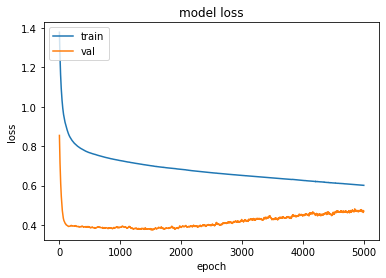

In [144]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<span style="color:green"> This is a sign that you underfit your data. You need to fit more. 

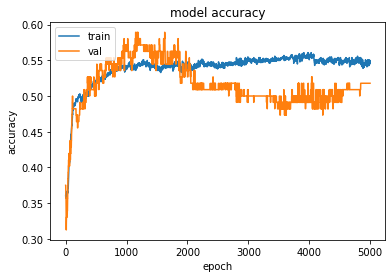

In [145]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Using 1 hidden layer of 11 neurons </span>

In [146]:
l1_norm = 1e-4

model4 = Sequential()
model4.add(Dense(13, activation='relu', activity_regularizer=l1(l1_norm)))
model4.add(Dense(11, activation='relu', activity_regularizer=l1(l1_norm)))
model4.add(Dense(3, activation='linear'))

In [147]:
# set learning rate

lr = 1e-4
model4.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history4 = model4.fit(X_train3, y_train3,
          batch_size=100, epochs=5000,
          validation_data=(X_test3, y_test3))


Train on 1004 samples, validate on 112 samples
Epoch 1/5000
1004/1004 [==============================] - 1s 1ms/sample - loss: 1.6421 - accuracy: 0.2211 - val_loss: 1.0294 - val_accuracy: 0.2411
Epoch 2/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 1.6160 - accuracy: 0.2191 - val_loss: 1.0058 - val_accuracy: 0.2321
Epoch 3/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 1.5918 - accuracy: 0.2211 - val_loss: 0.9836 - val_accuracy: 0.2321
Epoch 4/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 1.5691 - accuracy: 0.2221 - val_loss: 0.9635 - val_accuracy: 0.2321
Epoch 5/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 1.5484 - accuracy: 0.2271 - val_loss: 0.9443 - val_accuracy: 0.2321
Epoch 6/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 1.5284 - accuracy: 0.2291 - val_loss: 0.9258 - val_accuracy: 0.2321
Epoch 7/5000
1004/1004 [==============================] - 0s

1004/1004 [==============================] - 0s 48us/sample - loss: 1.0044 - accuracy: 0.4303 - val_loss: 0.4681 - val_accuracy: 0.4732
Epoch 110/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 1.0029 - accuracy: 0.4303 - val_loss: 0.4673 - val_accuracy: 0.4821
Epoch 111/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 1.0015 - accuracy: 0.4343 - val_loss: 0.4665 - val_accuracy: 0.4821
Epoch 112/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.9998 - accuracy: 0.4353 - val_loss: 0.4657 - val_accuracy: 0.4821
Epoch 113/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.9984 - accuracy: 0.4373 - val_loss: 0.4647 - val_accuracy: 0.4821
Epoch 114/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.9970 - accuracy: 0.4382 - val_loss: 0.4637 - val_accuracy: 0.4911
Epoch 115/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.9956 - accuracy: 0.4373 

1004/1004 [==============================] - 0s 85us/sample - loss: 0.9007 - accuracy: 0.4771 - val_loss: 0.4205 - val_accuracy: 0.4464
Epoch 218/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.9000 - accuracy: 0.4761 - val_loss: 0.4201 - val_accuracy: 0.4464
Epoch 219/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.8993 - accuracy: 0.4771 - val_loss: 0.4197 - val_accuracy: 0.4464
Epoch 220/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8987 - accuracy: 0.4781 - val_loss: 0.4193 - val_accuracy: 0.4464
Epoch 221/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8980 - accuracy: 0.4771 - val_loss: 0.4190 - val_accuracy: 0.4554
Epoch 222/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8974 - accuracy: 0.4771 - val_loss: 0.4187 - val_accuracy: 0.4554
Epoch 223/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8967 - accuracy: 0.4771 

1004/1004 [==============================] - 0s 56us/sample - loss: 0.8344 - accuracy: 0.4940 - val_loss: 0.3970 - val_accuracy: 0.4554
Epoch 326/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.8338 - accuracy: 0.4940 - val_loss: 0.3969 - val_accuracy: 0.4554
Epoch 327/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.8335 - accuracy: 0.4930 - val_loss: 0.3965 - val_accuracy: 0.4643
Epoch 328/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.8330 - accuracy: 0.4940 - val_loss: 0.3964 - val_accuracy: 0.4554
Epoch 329/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.8326 - accuracy: 0.4950 - val_loss: 0.3961 - val_accuracy: 0.4464
Epoch 330/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.8321 - accuracy: 0.4960 - val_loss: 0.3956 - val_accuracy: 0.4464
Epoch 331/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.8317 - accuracy: 0.4950 

1004/1004 [==============================] - 0s 68us/sample - loss: 0.7963 - accuracy: 0.4990 - val_loss: 0.3885 - val_accuracy: 0.4286
Epoch 434/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7961 - accuracy: 0.5000 - val_loss: 0.3884 - val_accuracy: 0.4286
Epoch 435/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7958 - accuracy: 0.5010 - val_loss: 0.3884 - val_accuracy: 0.4286
Epoch 436/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7955 - accuracy: 0.5030 - val_loss: 0.3885 - val_accuracy: 0.4286
Epoch 437/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7953 - accuracy: 0.5040 - val_loss: 0.3885 - val_accuracy: 0.4286
Epoch 438/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7951 - accuracy: 0.5050 - val_loss: 0.3883 - val_accuracy: 0.4286
Epoch 439/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7949 - accuracy: 0.5040 

1004/1004 [==============================] - 0s 57us/sample - loss: 0.7754 - accuracy: 0.4980 - val_loss: 0.3785 - val_accuracy: 0.4286
Epoch 542/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7753 - accuracy: 0.4970 - val_loss: 0.3779 - val_accuracy: 0.4286
Epoch 543/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7751 - accuracy: 0.4970 - val_loss: 0.3783 - val_accuracy: 0.4286
Epoch 544/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7750 - accuracy: 0.4960 - val_loss: 0.3789 - val_accuracy: 0.4375
Epoch 545/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7748 - accuracy: 0.4950 - val_loss: 0.3790 - val_accuracy: 0.4286
Epoch 546/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7746 - accuracy: 0.4960 - val_loss: 0.3791 - val_accuracy: 0.4375
Epoch 547/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7745 - accuracy: 0.4950 

1004/1004 [==============================] - 0s 61us/sample - loss: 0.7674 - accuracy: 0.4960 - val_loss: 0.3736 - val_accuracy: 0.4018
Epoch 596/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7672 - accuracy: 0.4950 - val_loss: 0.3736 - val_accuracy: 0.4018
Epoch 597/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7671 - accuracy: 0.4960 - val_loss: 0.3739 - val_accuracy: 0.4018
Epoch 598/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7669 - accuracy: 0.4950 - val_loss: 0.3738 - val_accuracy: 0.4018
Epoch 599/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7668 - accuracy: 0.4960 - val_loss: 0.3739 - val_accuracy: 0.4018
Epoch 600/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7667 - accuracy: 0.4950 - val_loss: 0.3737 - val_accuracy: 0.4107
Epoch 601/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7666 - accuracy: 0.4950 

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7547 - accuracy: 0.5070 - val_loss: 0.3661 - val_accuracy: 0.4286
Epoch 704/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7547 - accuracy: 0.5090 - val_loss: 0.3660 - val_accuracy: 0.4286
Epoch 705/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7546 - accuracy: 0.5110 - val_loss: 0.3659 - val_accuracy: 0.4286
Epoch 706/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.7544 - accuracy: 0.5110 - val_loss: 0.3659 - val_accuracy: 0.4286
Epoch 707/5000
1004/1004 [==============================] - 0s 107us/sample - loss: 0.7543 - accuracy: 0.5100 - val_loss: 0.3659 - val_accuracy: 0.4286
Epoch 708/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.7542 - accuracy: 0.5080 - val_loss: 0.3657 - val_accuracy: 0.4286
Epoch 709/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7541 - accuracy: 0.5070

1004/1004 [==============================] - 0s 52us/sample - loss: 0.7440 - accuracy: 0.5110 - val_loss: 0.3630 - val_accuracy: 0.4732
Epoch 812/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7439 - accuracy: 0.5110 - val_loss: 0.3619 - val_accuracy: 0.4643
Epoch 813/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7437 - accuracy: 0.5120 - val_loss: 0.3617 - val_accuracy: 0.4732
Epoch 814/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7437 - accuracy: 0.5129 - val_loss: 0.3615 - val_accuracy: 0.4732
Epoch 815/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7436 - accuracy: 0.5129 - val_loss: 0.3613 - val_accuracy: 0.4821
Epoch 816/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7435 - accuracy: 0.5149 - val_loss: 0.3610 - val_accuracy: 0.4821
Epoch 817/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7434 - accuracy: 0.5169 

1004/1004 [==============================] - 0s 44us/sample - loss: 0.7389 - accuracy: 0.5050 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 866/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7388 - accuracy: 0.5060 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 867/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7387 - accuracy: 0.5060 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 868/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7386 - accuracy: 0.5050 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 869/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7385 - accuracy: 0.5060 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 870/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7384 - accuracy: 0.5070 - val_loss: 0.3590 - val_accuracy: 0.5000
Epoch 871/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7383 - accuracy: 0.5120 

1004/1004 [==============================] - 0s 71us/sample - loss: 0.7296 - accuracy: 0.5179 - val_loss: 0.3532 - val_accuracy: 0.5000
Epoch 974/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7294 - accuracy: 0.5189 - val_loss: 0.3534 - val_accuracy: 0.4911
Epoch 975/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7294 - accuracy: 0.5189 - val_loss: 0.3540 - val_accuracy: 0.4911
Epoch 976/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7292 - accuracy: 0.5179 - val_loss: 0.3546 - val_accuracy: 0.4911
Epoch 977/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7290 - accuracy: 0.5169 - val_loss: 0.3546 - val_accuracy: 0.5000
Epoch 978/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7289 - accuracy: 0.5169 - val_loss: 0.3540 - val_accuracy: 0.5000
Epoch 979/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7288 - accuracy: 0.5189 

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7211 - accuracy: 0.5179 - val_loss: 0.3550 - val_accuracy: 0.4732
Epoch 1082/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7210 - accuracy: 0.5189 - val_loss: 0.3550 - val_accuracy: 0.4732
Epoch 1083/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7209 - accuracy: 0.5189 - val_loss: 0.3551 - val_accuracy: 0.4732
Epoch 1084/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7208 - accuracy: 0.5189 - val_loss: 0.3555 - val_accuracy: 0.4732
Epoch 1085/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7207 - accuracy: 0.5199 - val_loss: 0.3548 - val_accuracy: 0.4732
Epoch 1086/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7207 - accuracy: 0.5199 - val_loss: 0.3546 - val_accuracy: 0.4732
Epoch 1087/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7206 - accuracy: 0

Epoch 1135/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7173 - accuracy: 0.5199 - val_loss: 0.3552 - val_accuracy: 0.4643
Epoch 1136/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7172 - accuracy: 0.5199 - val_loss: 0.3550 - val_accuracy: 0.4643
Epoch 1137/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7172 - accuracy: 0.5199 - val_loss: 0.3546 - val_accuracy: 0.4643
Epoch 1138/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7171 - accuracy: 0.5209 - val_loss: 0.3547 - val_accuracy: 0.4643
Epoch 1139/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7171 - accuracy: 0.5219 - val_loss: 0.3555 - val_accuracy: 0.4554
Epoch 1140/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7169 - accuracy: 0.5209 - val_loss: 0.3556 - val_accuracy: 0.4554
Epoch 1141/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.71

Epoch 1189/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7136 - accuracy: 0.5129 - val_loss: 0.3564 - val_accuracy: 0.4375
Epoch 1190/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7135 - accuracy: 0.5149 - val_loss: 0.3564 - val_accuracy: 0.4375
Epoch 1191/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7135 - accuracy: 0.5159 - val_loss: 0.3565 - val_accuracy: 0.4375
Epoch 1192/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7135 - accuracy: 0.5149 - val_loss: 0.3569 - val_accuracy: 0.4375
Epoch 1193/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7133 - accuracy: 0.5169 - val_loss: 0.3563 - val_accuracy: 0.4375
Epoch 1194/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7132 - accuracy: 0.5169 - val_loss: 0.3560 - val_accuracy: 0.4375
Epoch 1195/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.71

Epoch 1243/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7097 - accuracy: 0.5229 - val_loss: 0.3535 - val_accuracy: 0.4375
Epoch 1244/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7096 - accuracy: 0.5219 - val_loss: 0.3536 - val_accuracy: 0.4375
Epoch 1245/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7095 - accuracy: 0.5219 - val_loss: 0.3538 - val_accuracy: 0.4464
Epoch 1246/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7094 - accuracy: 0.5219 - val_loss: 0.3540 - val_accuracy: 0.4375
Epoch 1247/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7093 - accuracy: 0.5209 - val_loss: 0.3533 - val_accuracy: 0.4375
Epoch 1248/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7093 - accuracy: 0.5209 - val_loss: 0.3530 - val_accuracy: 0.4375
Epoch 1249/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.70

Epoch 1297/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7060 - accuracy: 0.5239 - val_loss: 0.3526 - val_accuracy: 0.4375
Epoch 1298/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7059 - accuracy: 0.5239 - val_loss: 0.3528 - val_accuracy: 0.4464
Epoch 1299/5000
1004/1004 [==============================] - 0s 112us/sample - loss: 0.7059 - accuracy: 0.5239 - val_loss: 0.3527 - val_accuracy: 0.4464
Epoch 1300/5000
1004/1004 [==============================] - 0s 105us/sample - loss: 0.7059 - accuracy: 0.5229 - val_loss: 0.3517 - val_accuracy: 0.4464
Epoch 1301/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7056 - accuracy: 0.5219 - val_loss: 0.3513 - val_accuracy: 0.4464
Epoch 1302/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7056 - accuracy: 0.5219 - val_loss: 0.3510 - val_accuracy: 0.4464
Epoch 1303/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.

Epoch 1351/5000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.7023 - accuracy: 0.5169 - val_loss: 0.3537 - val_accuracy: 0.4375
Epoch 1352/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7023 - accuracy: 0.5169 - val_loss: 0.3533 - val_accuracy: 0.4464
Epoch 1353/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7022 - accuracy: 0.5179 - val_loss: 0.3522 - val_accuracy: 0.4464
Epoch 1354/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7021 - accuracy: 0.5189 - val_loss: 0.3520 - val_accuracy: 0.4554
Epoch 1355/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7020 - accuracy: 0.5189 - val_loss: 0.3517 - val_accuracy: 0.4554
Epoch 1356/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7020 - accuracy: 0.5189 - val_loss: 0.3516 - val_accuracy: 0.4554
Epoch 1357/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.70

Epoch 1458/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6963 - accuracy: 0.5219 - val_loss: 0.3497 - val_accuracy: 0.4732
Epoch 1459/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6963 - accuracy: 0.5219 - val_loss: 0.3498 - val_accuracy: 0.4732
Epoch 1460/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6962 - accuracy: 0.5219 - val_loss: 0.3498 - val_accuracy: 0.4732
Epoch 1461/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6961 - accuracy: 0.5209 - val_loss: 0.3502 - val_accuracy: 0.4732
Epoch 1462/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6960 - accuracy: 0.5209 - val_loss: 0.3503 - val_accuracy: 0.4732
Epoch 1463/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6959 - accuracy: 0.5209 - val_loss: 0.3504 - val_accuracy: 0.4732
Epoch 1464/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.69

Epoch 1512/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6934 - accuracy: 0.5299 - val_loss: 0.3521 - val_accuracy: 0.4821
Epoch 1513/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6933 - accuracy: 0.5269 - val_loss: 0.3527 - val_accuracy: 0.4821
Epoch 1514/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6932 - accuracy: 0.5269 - val_loss: 0.3527 - val_accuracy: 0.4821
Epoch 1515/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6931 - accuracy: 0.5279 - val_loss: 0.3524 - val_accuracy: 0.4821
Epoch 1516/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6931 - accuracy: 0.5279 - val_loss: 0.3516 - val_accuracy: 0.4821
Epoch 1517/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6929 - accuracy: 0.5279 - val_loss: 0.3513 - val_accuracy: 0.4821
Epoch 1518/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.69

1004/1004 [==============================] - 0s 49us/sample - loss: 0.6875 - accuracy: 0.5259 - val_loss: 0.3513 - val_accuracy: 0.5000
Epoch 1620/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6874 - accuracy: 0.5259 - val_loss: 0.3509 - val_accuracy: 0.5000
Epoch 1621/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6873 - accuracy: 0.5239 - val_loss: 0.3499 - val_accuracy: 0.5089
Epoch 1622/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6873 - accuracy: 0.5229 - val_loss: 0.3496 - val_accuracy: 0.5179
Epoch 1623/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6873 - accuracy: 0.5249 - val_loss: 0.3497 - val_accuracy: 0.5179
Epoch 1624/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6873 - accuracy: 0.5269 - val_loss: 0.3512 - val_accuracy: 0.5000
Epoch 1625/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6872 - accuracy: 0

1004/1004 [==============================] - 0s 47us/sample - loss: 0.6852 - accuracy: 0.5309 - val_loss: 0.3510 - val_accuracy: 0.5000
Epoch 1674/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6851 - accuracy: 0.5299 - val_loss: 0.3518 - val_accuracy: 0.5000
Epoch 1675/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6850 - accuracy: 0.5289 - val_loss: 0.3527 - val_accuracy: 0.5000
Epoch 1676/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6849 - accuracy: 0.5289 - val_loss: 0.3529 - val_accuracy: 0.5000
Epoch 1677/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6849 - accuracy: 0.5289 - val_loss: 0.3528 - val_accuracy: 0.5000
Epoch 1678/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6848 - accuracy: 0.5299 - val_loss: 0.3528 - val_accuracy: 0.5000
Epoch 1679/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6847 - accuracy: 0

1004/1004 [==============================] - 0s 58us/sample - loss: 0.6825 - accuracy: 0.5309 - val_loss: 0.3522 - val_accuracy: 0.5089
Epoch 1728/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6823 - accuracy: 0.5309 - val_loss: 0.3531 - val_accuracy: 0.5000
Epoch 1729/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6825 - accuracy: 0.5299 - val_loss: 0.3535 - val_accuracy: 0.5000
Epoch 1730/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6824 - accuracy: 0.5299 - val_loss: 0.3536 - val_accuracy: 0.5089
Epoch 1731/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6824 - accuracy: 0.5289 - val_loss: 0.3534 - val_accuracy: 0.5089
Epoch 1732/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6825 - accuracy: 0.5279 - val_loss: 0.3537 - val_accuracy: 0.5089
Epoch 1733/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6823 - accuracy: 0

1004/1004 [==============================] - 0s 54us/sample - loss: 0.6802 - accuracy: 0.5378 - val_loss: 0.3494 - val_accuracy: 0.5179
Epoch 1782/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6802 - accuracy: 0.5398 - val_loss: 0.3488 - val_accuracy: 0.5089
Epoch 1783/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6802 - accuracy: 0.5408 - val_loss: 0.3487 - val_accuracy: 0.5089
Epoch 1784/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6801 - accuracy: 0.5398 - val_loss: 0.3492 - val_accuracy: 0.5089
Epoch 1785/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6801 - accuracy: 0.5388 - val_loss: 0.3494 - val_accuracy: 0.5089
Epoch 1786/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6800 - accuracy: 0.5378 - val_loss: 0.3496 - val_accuracy: 0.5089
Epoch 1787/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6799 - accuracy: 0

1004/1004 [==============================] - 0s 54us/sample - loss: 0.6778 - accuracy: 0.5408 - val_loss: 0.3484 - val_accuracy: 0.5000
Epoch 1836/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6778 - accuracy: 0.5388 - val_loss: 0.3488 - val_accuracy: 0.5000
Epoch 1837/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6777 - accuracy: 0.5398 - val_loss: 0.3492 - val_accuracy: 0.5000
Epoch 1838/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6776 - accuracy: 0.5408 - val_loss: 0.3494 - val_accuracy: 0.5089
Epoch 1839/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6775 - accuracy: 0.5398 - val_loss: 0.3495 - val_accuracy: 0.5089
Epoch 1840/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6775 - accuracy: 0.5398 - val_loss: 0.3497 - val_accuracy: 0.5089
Epoch 1841/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6774 - accuracy: 0

Epoch 1889/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6751 - accuracy: 0.5418 - val_loss: 0.3532 - val_accuracy: 0.5179
Epoch 1890/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6751 - accuracy: 0.5418 - val_loss: 0.3532 - val_accuracy: 0.5179
Epoch 1891/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6750 - accuracy: 0.5418 - val_loss: 0.3529 - val_accuracy: 0.5179
Epoch 1892/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6750 - accuracy: 0.5428 - val_loss: 0.3521 - val_accuracy: 0.5179
Epoch 1893/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6750 - accuracy: 0.5418 - val_loss: 0.3519 - val_accuracy: 0.5179
Epoch 1894/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6748 - accuracy: 0.5408 - val_loss: 0.3514 - val_accuracy: 0.5179
Epoch 1895/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.67

Epoch 1943/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.6729 - accuracy: 0.5418 - val_loss: 0.3548 - val_accuracy: 0.5179
Epoch 1944/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.6726 - accuracy: 0.5418 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 1945/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6726 - accuracy: 0.5398 - val_loss: 0.3546 - val_accuracy: 0.5179
Epoch 1946/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6726 - accuracy: 0.5398 - val_loss: 0.3543 - val_accuracy: 0.5179
Epoch 1947/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6725 - accuracy: 0.5398 - val_loss: 0.3545 - val_accuracy: 0.5179
Epoch 1948/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6724 - accuracy: 0.5408 - val_loss: 0.3541 - val_accuracy: 0.5000
Epoch 1949/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6

Epoch 1997/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6705 - accuracy: 0.5478 - val_loss: 0.3512 - val_accuracy: 0.5000
Epoch 1998/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6706 - accuracy: 0.5468 - val_loss: 0.3517 - val_accuracy: 0.5000
Epoch 1999/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6703 - accuracy: 0.5488 - val_loss: 0.3523 - val_accuracy: 0.5000
Epoch 2000/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6703 - accuracy: 0.5478 - val_loss: 0.3533 - val_accuracy: 0.5089
Epoch 2001/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6702 - accuracy: 0.5468 - val_loss: 0.3545 - val_accuracy: 0.5089
Epoch 2002/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.6700 - accuracy: 0.5428 - val_loss: 0.3547 - val_accuracy: 0.5089
Epoch 2003/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.67

Epoch 2051/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6681 - accuracy: 0.5478 - val_loss: 0.3569 - val_accuracy: 0.5179
Epoch 2052/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6680 - accuracy: 0.5478 - val_loss: 0.3563 - val_accuracy: 0.5179
Epoch 2053/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.6680 - accuracy: 0.5488 - val_loss: 0.3562 - val_accuracy: 0.5179
Epoch 2054/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6679 - accuracy: 0.5478 - val_loss: 0.3562 - val_accuracy: 0.5179
Epoch 2055/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6679 - accuracy: 0.5478 - val_loss: 0.3566 - val_accuracy: 0.5179
Epoch 2056/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6679 - accuracy: 0.5488 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 2057/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.66

Epoch 2105/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6656 - accuracy: 0.5458 - val_loss: 0.3554 - val_accuracy: 0.5179
Epoch 2106/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6656 - accuracy: 0.5478 - val_loss: 0.3555 - val_accuracy: 0.5179
Epoch 2107/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6655 - accuracy: 0.5478 - val_loss: 0.3557 - val_accuracy: 0.5089
Epoch 2108/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6655 - accuracy: 0.5468 - val_loss: 0.3559 - val_accuracy: 0.5089
Epoch 2109/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6654 - accuracy: 0.5468 - val_loss: 0.3560 - val_accuracy: 0.5089
Epoch 2110/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6654 - accuracy: 0.5468 - val_loss: 0.3557 - val_accuracy: 0.5089
Epoch 2111/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.66

Epoch 2159/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6635 - accuracy: 0.5488 - val_loss: 0.3577 - val_accuracy: 0.5268
Epoch 2160/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6635 - accuracy: 0.5508 - val_loss: 0.3576 - val_accuracy: 0.5268
Epoch 2161/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6634 - accuracy: 0.5488 - val_loss: 0.3574 - val_accuracy: 0.5268
Epoch 2162/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6634 - accuracy: 0.5498 - val_loss: 0.3571 - val_accuracy: 0.5179
Epoch 2163/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6633 - accuracy: 0.5498 - val_loss: 0.3564 - val_accuracy: 0.5179
Epoch 2164/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6632 - accuracy: 0.5508 - val_loss: 0.3561 - val_accuracy: 0.5179
Epoch 2165/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.66

Epoch 2213/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6611 - accuracy: 0.5538 - val_loss: 0.3554 - val_accuracy: 0.5179
Epoch 2214/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.6611 - accuracy: 0.5568 - val_loss: 0.3550 - val_accuracy: 0.5179
Epoch 2215/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6612 - accuracy: 0.5578 - val_loss: 0.3557 - val_accuracy: 0.5179
Epoch 2216/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6609 - accuracy: 0.5588 - val_loss: 0.3565 - val_accuracy: 0.5179
Epoch 2217/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6610 - accuracy: 0.5498 - val_loss: 0.3571 - val_accuracy: 0.5179
Epoch 2218/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6609 - accuracy: 0.5488 - val_loss: 0.3570 - val_accuracy: 0.5179
Epoch 2219/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.66

Epoch 2267/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6587 - accuracy: 0.5528 - val_loss: 0.3567 - val_accuracy: 0.5446
Epoch 2268/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6587 - accuracy: 0.5508 - val_loss: 0.3574 - val_accuracy: 0.5446
Epoch 2269/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6588 - accuracy: 0.5518 - val_loss: 0.3569 - val_accuracy: 0.5357
Epoch 2270/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6587 - accuracy: 0.5528 - val_loss: 0.3567 - val_accuracy: 0.5446
Epoch 2271/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6587 - accuracy: 0.5528 - val_loss: 0.3572 - val_accuracy: 0.5446
Epoch 2272/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6586 - accuracy: 0.5518 - val_loss: 0.3575 - val_accuracy: 0.5446
Epoch 2273/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.65

Epoch 2321/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6565 - accuracy: 0.5508 - val_loss: 0.3604 - val_accuracy: 0.5357
Epoch 2322/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6565 - accuracy: 0.5518 - val_loss: 0.3598 - val_accuracy: 0.5357
Epoch 2323/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6563 - accuracy: 0.5528 - val_loss: 0.3597 - val_accuracy: 0.5357
Epoch 2324/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6562 - accuracy: 0.5528 - val_loss: 0.3601 - val_accuracy: 0.5357
Epoch 2325/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6561 - accuracy: 0.5528 - val_loss: 0.3602 - val_accuracy: 0.5357
Epoch 2326/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6561 - accuracy: 0.5528 - val_loss: 0.3604 - val_accuracy: 0.5446
Epoch 2327/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.65

Epoch 2375/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6546 - accuracy: 0.5568 - val_loss: 0.3682 - val_accuracy: 0.5268
Epoch 2376/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6545 - accuracy: 0.5578 - val_loss: 0.3681 - val_accuracy: 0.5268
Epoch 2377/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6545 - accuracy: 0.5578 - val_loss: 0.3673 - val_accuracy: 0.5268
Epoch 2378/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6544 - accuracy: 0.5568 - val_loss: 0.3638 - val_accuracy: 0.5268
Epoch 2379/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6542 - accuracy: 0.5568 - val_loss: 0.3627 - val_accuracy: 0.5357
Epoch 2380/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6541 - accuracy: 0.5558 - val_loss: 0.3622 - val_accuracy: 0.5357
Epoch 2381/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.65

Epoch 2429/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6526 - accuracy: 0.5558 - val_loss: 0.3608 - val_accuracy: 0.5446
Epoch 2430/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6525 - accuracy: 0.5548 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 2431/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6523 - accuracy: 0.5528 - val_loss: 0.3621 - val_accuracy: 0.5446
Epoch 2432/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6523 - accuracy: 0.5548 - val_loss: 0.3629 - val_accuracy: 0.5446
Epoch 2433/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.6522 - accuracy: 0.5568 - val_loss: 0.3631 - val_accuracy: 0.5446
Epoch 2434/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.6521 - accuracy: 0.5568 - val_loss: 0.3634 - val_accuracy: 0.5446
Epoch 2435/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.65

Epoch 2483/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6498 - accuracy: 0.5598 - val_loss: 0.3652 - val_accuracy: 0.5357
Epoch 2484/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6498 - accuracy: 0.5608 - val_loss: 0.3653 - val_accuracy: 0.5357
Epoch 2485/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6498 - accuracy: 0.5627 - val_loss: 0.3648 - val_accuracy: 0.5357
Epoch 2486/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6496 - accuracy: 0.5618 - val_loss: 0.3636 - val_accuracy: 0.5357
Epoch 2487/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6495 - accuracy: 0.5618 - val_loss: 0.3633 - val_accuracy: 0.5357
Epoch 2488/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6495 - accuracy: 0.5627 - val_loss: 0.3632 - val_accuracy: 0.5357
Epoch 2489/5000
1004/1004 [==============================] - 0s 119us/sample - loss: 0.6

Epoch 2537/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6475 - accuracy: 0.5657 - val_loss: 0.3655 - val_accuracy: 0.5268
Epoch 2538/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6474 - accuracy: 0.5697 - val_loss: 0.3639 - val_accuracy: 0.5179
Epoch 2539/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6475 - accuracy: 0.5677 - val_loss: 0.3650 - val_accuracy: 0.5179
Epoch 2540/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6473 - accuracy: 0.5657 - val_loss: 0.3653 - val_accuracy: 0.5179
Epoch 2541/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6473 - accuracy: 0.5647 - val_loss: 0.3660 - val_accuracy: 0.5268
Epoch 2542/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6472 - accuracy: 0.5637 - val_loss: 0.3660 - val_accuracy: 0.5357
Epoch 2543/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.64

Epoch 2591/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6451 - accuracy: 0.5657 - val_loss: 0.3653 - val_accuracy: 0.5268
Epoch 2592/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6450 - accuracy: 0.5657 - val_loss: 0.3654 - val_accuracy: 0.5268
Epoch 2593/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6451 - accuracy: 0.5667 - val_loss: 0.3652 - val_accuracy: 0.5179
Epoch 2594/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6450 - accuracy: 0.5677 - val_loss: 0.3652 - val_accuracy: 0.5268
Epoch 2595/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6449 - accuracy: 0.5647 - val_loss: 0.3660 - val_accuracy: 0.5268
Epoch 2596/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6449 - accuracy: 0.5657 - val_loss: 0.3661 - val_accuracy: 0.5179
Epoch 2597/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.64

Epoch 2645/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6428 - accuracy: 0.5627 - val_loss: 0.3659 - val_accuracy: 0.5179
Epoch 2646/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6428 - accuracy: 0.5657 - val_loss: 0.3659 - val_accuracy: 0.5268
Epoch 2647/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6427 - accuracy: 0.5667 - val_loss: 0.3664 - val_accuracy: 0.5268
Epoch 2648/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6427 - accuracy: 0.5667 - val_loss: 0.3659 - val_accuracy: 0.5357
Epoch 2649/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.3609 - accuracy: 0.58 - 0s 46us/sample - loss: 0.6427 - accuracy: 0.5657 - val_loss: 0.3658 - val_accuracy: 0.5357
Epoch 2650/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6427 - accuracy: 0.5657 - val_loss: 0.3660 - val_accuracy: 0.5268
Epoch 2651/5000
1004/1004 [===================

Epoch 2752/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6386 - accuracy: 0.5757 - val_loss: 0.3684 - val_accuracy: 0.5446
Epoch 2753/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6385 - accuracy: 0.5747 - val_loss: 0.3684 - val_accuracy: 0.5446
Epoch 2754/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.6385 - accuracy: 0.5777 - val_loss: 0.3682 - val_accuracy: 0.5446
Epoch 2755/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.6385 - accuracy: 0.5797 - val_loss: 0.3677 - val_accuracy: 0.5357
Epoch 2756/5000
1004/1004 [==============================] - 0s 107us/sample - loss: 0.6385 - accuracy: 0.5807 - val_loss: 0.3670 - val_accuracy: 0.5357
Epoch 2757/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6385 - accuracy: 0.5797 - val_loss: 0.3654 - val_accuracy: 0.5357
Epoch 2758/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0

Epoch 2806/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6369 - accuracy: 0.5787 - val_loss: 0.3691 - val_accuracy: 0.5357
Epoch 2807/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6366 - accuracy: 0.5787 - val_loss: 0.3709 - val_accuracy: 0.5446
Epoch 2808/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6367 - accuracy: 0.5787 - val_loss: 0.3720 - val_accuracy: 0.5446
Epoch 2809/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.6369 - accuracy: 0.5787 - val_loss: 0.3720 - val_accuracy: 0.5446
Epoch 2810/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6368 - accuracy: 0.5777 - val_loss: 0.3721 - val_accuracy: 0.5446
Epoch 2811/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6367 - accuracy: 0.5767 - val_loss: 0.3719 - val_accuracy: 0.5446
Epoch 2812/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.63

Epoch 2860/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6350 - accuracy: 0.5757 - val_loss: 0.3686 - val_accuracy: 0.5357
Epoch 2861/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6349 - accuracy: 0.5787 - val_loss: 0.3682 - val_accuracy: 0.5357
Epoch 2862/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6348 - accuracy: 0.5797 - val_loss: 0.3688 - val_accuracy: 0.5357
Epoch 2863/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6349 - accuracy: 0.5797 - val_loss: 0.3694 - val_accuracy: 0.5357
Epoch 2864/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6348 - accuracy: 0.5767 - val_loss: 0.3698 - val_accuracy: 0.5446
Epoch 2865/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.6349 - accuracy: 0.5777 - val_loss: 0.3690 - val_accuracy: 0.5446
Epoch 2866/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.63

Epoch 2914/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6330 - accuracy: 0.5747 - val_loss: 0.3744 - val_accuracy: 0.5268
Epoch 2915/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6330 - accuracy: 0.5747 - val_loss: 0.3743 - val_accuracy: 0.5268
Epoch 2916/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6332 - accuracy: 0.5727 - val_loss: 0.3754 - val_accuracy: 0.5357
Epoch 2917/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6332 - accuracy: 0.5707 - val_loss: 0.3749 - val_accuracy: 0.5446
Epoch 2918/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6330 - accuracy: 0.5717 - val_loss: 0.3729 - val_accuracy: 0.5446
Epoch 2919/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6329 - accuracy: 0.5727 - val_loss: 0.3725 - val_accuracy: 0.5446
Epoch 2920/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.63

Epoch 2968/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.6313 - accuracy: 0.5717 - val_loss: 0.3706 - val_accuracy: 0.5446
Epoch 2969/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.6312 - accuracy: 0.5667 - val_loss: 0.3718 - val_accuracy: 0.5446
Epoch 2970/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.6311 - accuracy: 0.5657 - val_loss: 0.3705 - val_accuracy: 0.5446
Epoch 2971/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6310 - accuracy: 0.5687 - val_loss: 0.3702 - val_accuracy: 0.5446
Epoch 2972/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6311 - accuracy: 0.5717 - val_loss: 0.3702 - val_accuracy: 0.5446
Epoch 2973/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.6311 - accuracy: 0.5707 - val_loss: 0.3707 - val_accuracy: 0.5446
Epoch 2974/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.63

Epoch 3022/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6296 - accuracy: 0.5677 - val_loss: 0.3794 - val_accuracy: 0.5357
Epoch 3023/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6295 - accuracy: 0.5697 - val_loss: 0.3785 - val_accuracy: 0.5357
Epoch 3024/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6295 - accuracy: 0.5717 - val_loss: 0.3784 - val_accuracy: 0.5357
Epoch 3025/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6294 - accuracy: 0.5727 - val_loss: 0.3779 - val_accuracy: 0.5357
Epoch 3026/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6293 - accuracy: 0.5737 - val_loss: 0.3778 - val_accuracy: 0.5357
Epoch 3027/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.6293 - accuracy: 0.5717 - val_loss: 0.3780 - val_accuracy: 0.5357
Epoch 3028/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.62

Epoch 3076/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.6276 - accuracy: 0.5837 - val_loss: 0.3755 - val_accuracy: 0.5268
Epoch 3077/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6276 - accuracy: 0.5837 - val_loss: 0.3757 - val_accuracy: 0.5268
Epoch 3078/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.6275 - accuracy: 0.5827 - val_loss: 0.3765 - val_accuracy: 0.5268
Epoch 3079/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6274 - accuracy: 0.5817 - val_loss: 0.3767 - val_accuracy: 0.5268
Epoch 3080/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.6274 - accuracy: 0.5817 - val_loss: 0.3759 - val_accuracy: 0.5268
Epoch 3081/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6274 - accuracy: 0.5827 - val_loss: 0.3756 - val_accuracy: 0.5268
Epoch 3082/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.62

Epoch 3130/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6257 - accuracy: 0.5837 - val_loss: 0.3764 - val_accuracy: 0.5268
Epoch 3131/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6254 - accuracy: 0.5817 - val_loss: 0.3768 - val_accuracy: 0.5268
Epoch 3132/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.6255 - accuracy: 0.5817 - val_loss: 0.3774 - val_accuracy: 0.5268
Epoch 3133/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6256 - accuracy: 0.5787 - val_loss: 0.3794 - val_accuracy: 0.5268
Epoch 3134/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.6256 - accuracy: 0.5777 - val_loss: 0.3798 - val_accuracy: 0.5268
Epoch 3135/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6257 - accuracy: 0.5797 - val_loss: 0.3816 - val_accuracy: 0.5268
Epoch 3136/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.62

Epoch 3184/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6236 - accuracy: 0.5817 - val_loss: 0.3806 - val_accuracy: 0.5268
Epoch 3185/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6236 - accuracy: 0.5817 - val_loss: 0.3804 - val_accuracy: 0.5268
Epoch 3186/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6236 - accuracy: 0.5827 - val_loss: 0.3802 - val_accuracy: 0.5268
Epoch 3187/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6235 - accuracy: 0.5837 - val_loss: 0.3802 - val_accuracy: 0.5268
Epoch 3188/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6235 - accuracy: 0.5827 - val_loss: 0.3798 - val_accuracy: 0.5268
Epoch 3189/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6236 - accuracy: 0.5827 - val_loss: 0.3779 - val_accuracy: 0.5268
Epoch 3190/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.62

Epoch 3238/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6218 - accuracy: 0.5837 - val_loss: 0.3824 - val_accuracy: 0.5268
Epoch 3239/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6218 - accuracy: 0.5847 - val_loss: 0.3828 - val_accuracy: 0.5268
Epoch 3240/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6218 - accuracy: 0.5847 - val_loss: 0.3825 - val_accuracy: 0.5268
Epoch 3241/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6217 - accuracy: 0.5867 - val_loss: 0.3821 - val_accuracy: 0.5268
Epoch 3242/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6217 - accuracy: 0.5867 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 3243/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.6216 - accuracy: 0.5837 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 3244/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.62

Epoch 3292/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6202 - accuracy: 0.5896 - val_loss: 0.3769 - val_accuracy: 0.5268
Epoch 3293/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6201 - accuracy: 0.5886 - val_loss: 0.3769 - val_accuracy: 0.5268
Epoch 3294/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.6200 - accuracy: 0.5926 - val_loss: 0.3770 - val_accuracy: 0.5268
Epoch 3295/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6200 - accuracy: 0.5926 - val_loss: 0.3771 - val_accuracy: 0.5268
Epoch 3296/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6199 - accuracy: 0.5926 - val_loss: 0.3778 - val_accuracy: 0.5268
Epoch 3297/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6198 - accuracy: 0.5926 - val_loss: 0.3780 - val_accuracy: 0.5268
Epoch 3298/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.62

Epoch 3346/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6181 - accuracy: 0.5926 - val_loss: 0.3812 - val_accuracy: 0.5357
Epoch 3347/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6181 - accuracy: 0.5926 - val_loss: 0.3814 - val_accuracy: 0.5357
Epoch 3348/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.6181 - accuracy: 0.5926 - val_loss: 0.3816 - val_accuracy: 0.5357
Epoch 3349/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6180 - accuracy: 0.5926 - val_loss: 0.3814 - val_accuracy: 0.5357
Epoch 3350/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.6180 - accuracy: 0.5946 - val_loss: 0.3813 - val_accuracy: 0.5357
Epoch 3351/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6178 - accuracy: 0.5946 - val_loss: 0.3823 - val_accuracy: 0.5357
Epoch 3352/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.61

Epoch 3400/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6166 - accuracy: 0.5876 - val_loss: 0.3821 - val_accuracy: 0.5089
Epoch 3401/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6167 - accuracy: 0.5867 - val_loss: 0.3829 - val_accuracy: 0.5089
Epoch 3402/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6164 - accuracy: 0.5886 - val_loss: 0.3839 - val_accuracy: 0.5179
Epoch 3403/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6163 - accuracy: 0.5886 - val_loss: 0.3839 - val_accuracy: 0.5179
Epoch 3404/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6163 - accuracy: 0.5886 - val_loss: 0.3832 - val_accuracy: 0.5179
Epoch 3405/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6163 - accuracy: 0.5886 - val_loss: 0.3836 - val_accuracy: 0.5179
Epoch 3406/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.61

Epoch 3454/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.6150 - accuracy: 0.5886 - val_loss: 0.3821 - val_accuracy: 0.5179
Epoch 3455/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6149 - accuracy: 0.5886 - val_loss: 0.3828 - val_accuracy: 0.5089
Epoch 3456/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6150 - accuracy: 0.5876 - val_loss: 0.3834 - val_accuracy: 0.5089
Epoch 3457/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6149 - accuracy: 0.5876 - val_loss: 0.3838 - val_accuracy: 0.5089
Epoch 3458/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6148 - accuracy: 0.5886 - val_loss: 0.3834 - val_accuracy: 0.5089
Epoch 3459/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6148 - accuracy: 0.5886 - val_loss: 0.3834 - val_accuracy: 0.5089
Epoch 3460/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.61

Epoch 3508/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6134 - accuracy: 0.5926 - val_loss: 0.3846 - val_accuracy: 0.5179
Epoch 3509/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6133 - accuracy: 0.5926 - val_loss: 0.3855 - val_accuracy: 0.5179
Epoch 3510/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6133 - accuracy: 0.5916 - val_loss: 0.3869 - val_accuracy: 0.5179
Epoch 3511/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6132 - accuracy: 0.5906 - val_loss: 0.3868 - val_accuracy: 0.5179
Epoch 3512/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6131 - accuracy: 0.5896 - val_loss: 0.3871 - val_accuracy: 0.5179
Epoch 3513/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6132 - accuracy: 0.5896 - val_loss: 0.3860 - val_accuracy: 0.5179
Epoch 3514/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.61

Epoch 3562/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6114 - accuracy: 0.5876 - val_loss: 0.3847 - val_accuracy: 0.5000
Epoch 3563/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6113 - accuracy: 0.5876 - val_loss: 0.3852 - val_accuracy: 0.5000
Epoch 3564/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6114 - accuracy: 0.5867 - val_loss: 0.3836 - val_accuracy: 0.5000
Epoch 3565/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6113 - accuracy: 0.5867 - val_loss: 0.3834 - val_accuracy: 0.5000
Epoch 3566/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6112 - accuracy: 0.5857 - val_loss: 0.3836 - val_accuracy: 0.5179
Epoch 3567/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6111 - accuracy: 0.5876 - val_loss: 0.3843 - val_accuracy: 0.5179
Epoch 3568/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.61

Epoch 3616/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.6100 - accuracy: 0.5916 - val_loss: 0.3862 - val_accuracy: 0.5089
Epoch 3617/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6099 - accuracy: 0.5926 - val_loss: 0.3859 - val_accuracy: 0.5089
Epoch 3618/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6098 - accuracy: 0.5936 - val_loss: 0.3859 - val_accuracy: 0.5179
Epoch 3619/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.6097 - accuracy: 0.5936 - val_loss: 0.3858 - val_accuracy: 0.5179
Epoch 3620/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.6097 - accuracy: 0.5936 - val_loss: 0.3853 - val_accuracy: 0.5179
Epoch 3621/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.6096 - accuracy: 0.5946 - val_loss: 0.3851 - val_accuracy: 0.5179
Epoch 3622/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.60

Epoch 3670/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6084 - accuracy: 0.5936 - val_loss: 0.3864 - val_accuracy: 0.5000
Epoch 3671/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6082 - accuracy: 0.5916 - val_loss: 0.3852 - val_accuracy: 0.5089
Epoch 3672/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6083 - accuracy: 0.5926 - val_loss: 0.3841 - val_accuracy: 0.5089
Epoch 3673/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.6082 - accuracy: 0.5936 - val_loss: 0.3842 - val_accuracy: 0.5089
Epoch 3674/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.6081 - accuracy: 0.5936 - val_loss: 0.3843 - val_accuracy: 0.5089
Epoch 3675/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6080 - accuracy: 0.5926 - val_loss: 0.3845 - val_accuracy: 0.5089
Epoch 3676/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.60

Epoch 3724/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.6064 - accuracy: 0.5936 - val_loss: 0.3856 - val_accuracy: 0.5089
Epoch 3725/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6064 - accuracy: 0.5946 - val_loss: 0.3848 - val_accuracy: 0.5089
Epoch 3726/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6066 - accuracy: 0.5946 - val_loss: 0.3846 - val_accuracy: 0.5089
Epoch 3727/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.6065 - accuracy: 0.5966 - val_loss: 0.3857 - val_accuracy: 0.5089
Epoch 3728/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6062 - accuracy: 0.5956 - val_loss: 0.3864 - val_accuracy: 0.5179
Epoch 3729/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6062 - accuracy: 0.5956 - val_loss: 0.3869 - val_accuracy: 0.5179
Epoch 3730/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.60

Epoch 3778/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6045 - accuracy: 0.5956 - val_loss: 0.3919 - val_accuracy: 0.5000
Epoch 3779/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.6044 - accuracy: 0.5956 - val_loss: 0.3916 - val_accuracy: 0.5089
Epoch 3780/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6045 - accuracy: 0.5956 - val_loss: 0.3919 - val_accuracy: 0.5000
Epoch 3781/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6044 - accuracy: 0.5946 - val_loss: 0.3922 - val_accuracy: 0.5089
Epoch 3782/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6043 - accuracy: 0.5966 - val_loss: 0.3924 - val_accuracy: 0.5089
Epoch 3783/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.6043 - accuracy: 0.5966 - val_loss: 0.3922 - val_accuracy: 0.5089
Epoch 3784/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.60

Epoch 3832/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6029 - accuracy: 0.5936 - val_loss: 0.3945 - val_accuracy: 0.5089
Epoch 3833/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6029 - accuracy: 0.5936 - val_loss: 0.3948 - val_accuracy: 0.5000
Epoch 3834/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.6028 - accuracy: 0.5926 - val_loss: 0.3943 - val_accuracy: 0.5089
Epoch 3835/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6028 - accuracy: 0.5916 - val_loss: 0.3941 - val_accuracy: 0.5089
Epoch 3836/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6028 - accuracy: 0.5926 - val_loss: 0.3943 - val_accuracy: 0.5000
Epoch 3837/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6026 - accuracy: 0.5916 - val_loss: 0.3955 - val_accuracy: 0.5000
Epoch 3838/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.60

Epoch 3886/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.6014 - accuracy: 0.5956 - val_loss: 0.3982 - val_accuracy: 0.5089
Epoch 3887/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.6013 - accuracy: 0.5966 - val_loss: 0.3971 - val_accuracy: 0.5089
Epoch 3888/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.6013 - accuracy: 0.5956 - val_loss: 0.3968 - val_accuracy: 0.5089
Epoch 3889/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.6012 - accuracy: 0.5966 - val_loss: 0.3970 - val_accuracy: 0.5089
Epoch 3890/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.6011 - accuracy: 0.5966 - val_loss: 0.3972 - val_accuracy: 0.5089
Epoch 3891/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.6015 - accuracy: 0.5936 - val_loss: 0.3968 - val_accuracy: 0.5089
Epoch 3892/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.60

Epoch 3940/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.5996 - accuracy: 0.5936 - val_loss: 0.3999 - val_accuracy: 0.5089
Epoch 3941/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5997 - accuracy: 0.5956 - val_loss: 0.4000 - val_accuracy: 0.5089
Epoch 3942/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5996 - accuracy: 0.5956 - val_loss: 0.3996 - val_accuracy: 0.5089
Epoch 3943/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5996 - accuracy: 0.5936 - val_loss: 0.4004 - val_accuracy: 0.5089
Epoch 3944/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5996 - accuracy: 0.5936 - val_loss: 0.4001 - val_accuracy: 0.5089
Epoch 3945/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5995 - accuracy: 0.5966 - val_loss: 0.3986 - val_accuracy: 0.5089
Epoch 3946/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.59

Epoch 3994/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5983 - accuracy: 0.5946 - val_loss: 0.3925 - val_accuracy: 0.4821
Epoch 3995/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.5983 - accuracy: 0.5946 - val_loss: 0.3929 - val_accuracy: 0.4821
Epoch 3996/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.5982 - accuracy: 0.5916 - val_loss: 0.3931 - val_accuracy: 0.4732
Epoch 3997/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.5981 - accuracy: 0.5916 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 3998/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5981 - accuracy: 0.5916 - val_loss: 0.3929 - val_accuracy: 0.4821
Epoch 3999/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5983 - accuracy: 0.5926 - val_loss: 0.3908 - val_accuracy: 0.4732
Epoch 4000/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.59

Epoch 4048/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5964 - accuracy: 0.5906 - val_loss: 0.4032 - val_accuracy: 0.4732
Epoch 4049/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5964 - accuracy: 0.5906 - val_loss: 0.4026 - val_accuracy: 0.4732
Epoch 4050/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.5963 - accuracy: 0.5896 - val_loss: 0.4023 - val_accuracy: 0.4732
Epoch 4051/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5962 - accuracy: 0.5896 - val_loss: 0.4022 - val_accuracy: 0.4732
Epoch 4052/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5961 - accuracy: 0.5896 - val_loss: 0.4019 - val_accuracy: 0.4732
Epoch 4053/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.5961 - accuracy: 0.5906 - val_loss: 0.4009 - val_accuracy: 0.4732
Epoch 4054/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.59

Epoch 4102/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.5948 - accuracy: 0.5936 - val_loss: 0.4017 - val_accuracy: 0.4911
Epoch 4103/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5947 - accuracy: 0.5926 - val_loss: 0.4013 - val_accuracy: 0.4911
Epoch 4104/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5948 - accuracy: 0.5926 - val_loss: 0.4012 - val_accuracy: 0.4821
Epoch 4105/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5945 - accuracy: 0.5926 - val_loss: 0.4016 - val_accuracy: 0.4821
Epoch 4106/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5944 - accuracy: 0.5926 - val_loss: 0.4017 - val_accuracy: 0.4821
Epoch 4107/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5944 - accuracy: 0.5926 - val_loss: 0.4028 - val_accuracy: 0.4821
Epoch 4108/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.59

Epoch 4156/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.5929 - accuracy: 0.5976 - val_loss: 0.4009 - val_accuracy: 0.4911
Epoch 4157/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5928 - accuracy: 0.5976 - val_loss: 0.4008 - val_accuracy: 0.4911
Epoch 4158/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5929 - accuracy: 0.5966 - val_loss: 0.4009 - val_accuracy: 0.4911
Epoch 4159/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5928 - accuracy: 0.5966 - val_loss: 0.4002 - val_accuracy: 0.4911
Epoch 4160/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.5927 - accuracy: 0.5966 - val_loss: 0.4002 - val_accuracy: 0.4911
Epoch 4161/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5927 - accuracy: 0.5966 - val_loss: 0.4004 - val_accuracy: 0.4911
Epoch 4162/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.59

Epoch 4210/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5915 - accuracy: 0.5996 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 4211/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.5914 - accuracy: 0.6006 - val_loss: 0.3986 - val_accuracy: 0.4821
Epoch 4212/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.5913 - accuracy: 0.6006 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 4213/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5914 - accuracy: 0.5986 - val_loss: 0.3983 - val_accuracy: 0.4911
Epoch 4214/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5913 - accuracy: 0.5976 - val_loss: 0.3988 - val_accuracy: 0.4821
Epoch 4215/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5911 - accuracy: 0.5956 - val_loss: 0.4007 - val_accuracy: 0.4821
Epoch 4216/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.59

Epoch 4264/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5901 - accuracy: 0.5926 - val_loss: 0.4032 - val_accuracy: 0.4732
Epoch 4265/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5900 - accuracy: 0.5946 - val_loss: 0.4038 - val_accuracy: 0.4732
Epoch 4266/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5899 - accuracy: 0.5946 - val_loss: 0.4033 - val_accuracy: 0.4732
Epoch 4267/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.5899 - accuracy: 0.5946 - val_loss: 0.4026 - val_accuracy: 0.4732
Epoch 4268/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5897 - accuracy: 0.5936 - val_loss: 0.4014 - val_accuracy: 0.4732
Epoch 4269/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.5897 - accuracy: 0.5926 - val_loss: 0.4004 - val_accuracy: 0.4732
Epoch 4270/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.58

Epoch 4318/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5885 - accuracy: 0.5886 - val_loss: 0.4035 - val_accuracy: 0.4821
Epoch 4319/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.5885 - accuracy: 0.5896 - val_loss: 0.4027 - val_accuracy: 0.4821
Epoch 4320/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5884 - accuracy: 0.5876 - val_loss: 0.4031 - val_accuracy: 0.4821
Epoch 4321/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.5883 - accuracy: 0.5876 - val_loss: 0.4038 - val_accuracy: 0.4821
Epoch 4322/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5882 - accuracy: 0.5876 - val_loss: 0.4028 - val_accuracy: 0.4821
Epoch 4323/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5885 - accuracy: 0.5906 - val_loss: 0.4026 - val_accuracy: 0.4821
Epoch 4324/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.58

Epoch 4372/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5869 - accuracy: 0.5996 - val_loss: 0.4032 - val_accuracy: 0.4821
Epoch 4373/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5870 - accuracy: 0.5996 - val_loss: 0.4031 - val_accuracy: 0.4821
Epoch 4374/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.5869 - accuracy: 0.5976 - val_loss: 0.4037 - val_accuracy: 0.4821
Epoch 4375/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5868 - accuracy: 0.5966 - val_loss: 0.4048 - val_accuracy: 0.4821
Epoch 4376/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.5867 - accuracy: 0.5966 - val_loss: 0.4052 - val_accuracy: 0.4821
Epoch 4377/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5866 - accuracy: 0.5946 - val_loss: 0.4054 - val_accuracy: 0.4821
Epoch 4378/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.58

Epoch 4426/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5853 - accuracy: 0.5966 - val_loss: 0.4049 - val_accuracy: 0.4732
Epoch 4427/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.5852 - accuracy: 0.5976 - val_loss: 0.4040 - val_accuracy: 0.4732
Epoch 4428/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5853 - accuracy: 0.5996 - val_loss: 0.4035 - val_accuracy: 0.4732
Epoch 4429/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.5853 - accuracy: 0.5996 - val_loss: 0.4037 - val_accuracy: 0.4732
Epoch 4430/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.5853 - accuracy: 0.5976 - val_loss: 0.4037 - val_accuracy: 0.4732
Epoch 4431/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.5852 - accuracy: 0.5966 - val_loss: 0.4041 - val_accuracy: 0.4732
Epoch 4432/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.58

Epoch 4480/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5839 - accuracy: 0.5976 - val_loss: 0.4060 - val_accuracy: 0.4821
Epoch 4481/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5839 - accuracy: 0.5986 - val_loss: 0.4058 - val_accuracy: 0.4821
Epoch 4482/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5837 - accuracy: 0.5986 - val_loss: 0.4061 - val_accuracy: 0.4821
Epoch 4483/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.5836 - accuracy: 0.5986 - val_loss: 0.4063 - val_accuracy: 0.4821
Epoch 4484/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5837 - accuracy: 0.5996 - val_loss: 0.4062 - val_accuracy: 0.4821
Epoch 4485/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.5836 - accuracy: 0.6006 - val_loss: 0.4065 - val_accuracy: 0.4821
Epoch 4486/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.58

Epoch 4534/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5822 - accuracy: 0.5976 - val_loss: 0.4123 - val_accuracy: 0.4821
Epoch 4535/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.5822 - accuracy: 0.5966 - val_loss: 0.4117 - val_accuracy: 0.4821
Epoch 4536/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5821 - accuracy: 0.5976 - val_loss: 0.4113 - val_accuracy: 0.4821
Epoch 4537/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.5821 - accuracy: 0.5986 - val_loss: 0.4110 - val_accuracy: 0.4911
Epoch 4538/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.5820 - accuracy: 0.5996 - val_loss: 0.4103 - val_accuracy: 0.4911
Epoch 4539/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5820 - accuracy: 0.5986 - val_loss: 0.4104 - val_accuracy: 0.4911
Epoch 4540/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.58

Epoch 4588/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.5806 - accuracy: 0.6016 - val_loss: 0.4138 - val_accuracy: 0.4911
Epoch 4589/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5806 - accuracy: 0.6026 - val_loss: 0.4142 - val_accuracy: 0.4911
Epoch 4590/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.5805 - accuracy: 0.6036 - val_loss: 0.4144 - val_accuracy: 0.4911
Epoch 4591/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.5805 - accuracy: 0.5966 - val_loss: 0.4165 - val_accuracy: 0.4911
Epoch 4592/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5817 - accuracy: 0.5926 - val_loss: 0.4171 - val_accuracy: 0.4911
Epoch 4593/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5817 - accuracy: 0.5936 - val_loss: 0.4167 - val_accuracy: 0.4911
Epoch 4594/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.58

Epoch 4642/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5792 - accuracy: 0.6006 - val_loss: 0.4144 - val_accuracy: 0.4911
Epoch 4643/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5790 - accuracy: 0.6036 - val_loss: 0.4150 - val_accuracy: 0.4911
Epoch 4644/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.5795 - accuracy: 0.6026 - val_loss: 0.4160 - val_accuracy: 0.4821
Epoch 4645/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.5793 - accuracy: 0.6036 - val_loss: 0.4145 - val_accuracy: 0.4821
Epoch 4646/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.5794 - accuracy: 0.6026 - val_loss: 0.4141 - val_accuracy: 0.4911
Epoch 4647/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.5792 - accuracy: 0.6016 - val_loss: 0.4141 - val_accuracy: 0.5000
Epoch 4648/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.57

Epoch 4696/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5779 - accuracy: 0.6036 - val_loss: 0.4139 - val_accuracy: 0.5000
Epoch 4697/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.5780 - accuracy: 0.6026 - val_loss: 0.4140 - val_accuracy: 0.5000
Epoch 4698/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5779 - accuracy: 0.6026 - val_loss: 0.4146 - val_accuracy: 0.5000
Epoch 4699/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.5779 - accuracy: 0.6016 - val_loss: 0.4151 - val_accuracy: 0.5000
Epoch 4700/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.5777 - accuracy: 0.5996 - val_loss: 0.4153 - val_accuracy: 0.5000
Epoch 4701/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.5776 - accuracy: 0.6006 - val_loss: 0.4155 - val_accuracy: 0.5000
Epoch 4702/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.57

Epoch 4750/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.5760 - accuracy: 0.6036 - val_loss: 0.4165 - val_accuracy: 0.5089
Epoch 4751/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.5759 - accuracy: 0.6036 - val_loss: 0.4151 - val_accuracy: 0.5089
Epoch 4752/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.5760 - accuracy: 0.6026 - val_loss: 0.4150 - val_accuracy: 0.5089
Epoch 4753/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.5760 - accuracy: 0.6016 - val_loss: 0.4153 - val_accuracy: 0.5089
Epoch 4754/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5758 - accuracy: 0.6006 - val_loss: 0.4160 - val_accuracy: 0.5089
Epoch 4755/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.5758 - accuracy: 0.6016 - val_loss: 0.4156 - val_accuracy: 0.5089
Epoch 4756/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.57

Epoch 4804/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5744 - accuracy: 0.6016 - val_loss: 0.4227 - val_accuracy: 0.5089
Epoch 4805/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.5744 - accuracy: 0.6026 - val_loss: 0.4224 - val_accuracy: 0.5089
Epoch 4806/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.5744 - accuracy: 0.6016 - val_loss: 0.4241 - val_accuracy: 0.5089
Epoch 4807/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.5743 - accuracy: 0.6016 - val_loss: 0.4239 - val_accuracy: 0.5089
Epoch 4808/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.5743 - accuracy: 0.6036 - val_loss: 0.4232 - val_accuracy: 0.5089
Epoch 4809/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.5743 - accuracy: 0.6026 - val_loss: 0.4237 - val_accuracy: 0.5089
Epoch 4810/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.57

Epoch 4858/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.5735 - accuracy: 0.6026 - val_loss: 0.4248 - val_accuracy: 0.5089
Epoch 4859/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5733 - accuracy: 0.6036 - val_loss: 0.4249 - val_accuracy: 0.5089
Epoch 4860/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.5734 - accuracy: 0.6046 - val_loss: 0.4251 - val_accuracy: 0.5089
Epoch 4861/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.5732 - accuracy: 0.6036 - val_loss: 0.4233 - val_accuracy: 0.5089
Epoch 4862/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.5731 - accuracy: 0.6036 - val_loss: 0.4231 - val_accuracy: 0.5089
Epoch 4863/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.5730 - accuracy: 0.6036 - val_loss: 0.4231 - val_accuracy: 0.5089
Epoch 4864/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.57

Epoch 4912/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.5723 - accuracy: 0.6016 - val_loss: 0.4140 - val_accuracy: 0.5089
Epoch 4913/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.5723 - accuracy: 0.6026 - val_loss: 0.4141 - val_accuracy: 0.5089
Epoch 4914/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.5722 - accuracy: 0.6026 - val_loss: 0.4146 - val_accuracy: 0.5089
Epoch 4915/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.5720 - accuracy: 0.6026 - val_loss: 0.4151 - val_accuracy: 0.5089
Epoch 4916/5000
1004/1004 [==============================] - 0s 114us/sample - loss: 0.5719 - accuracy: 0.6016 - val_loss: 0.4156 - val_accuracy: 0.5089
Epoch 4917/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.5720 - accuracy: 0.6026 - val_loss: 0.4150 - val_accuracy: 0.5089
Epoch 4918/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.5

Epoch 4966/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.5700 - accuracy: 0.6046 - val_loss: 0.4262 - val_accuracy: 0.5089
Epoch 4967/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.5699 - accuracy: 0.6046 - val_loss: 0.4261 - val_accuracy: 0.5089
Epoch 4968/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.5698 - accuracy: 0.6046 - val_loss: 0.4262 - val_accuracy: 0.5089
Epoch 4969/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.5698 - accuracy: 0.6046 - val_loss: 0.4262 - val_accuracy: 0.5089
Epoch 4970/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.5697 - accuracy: 0.6026 - val_loss: 0.4265 - val_accuracy: 0.5089
Epoch 4971/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.5700 - accuracy: 0.6026 - val_loss: 0.4272 - val_accuracy: 0.5089
Epoch 4972/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.56

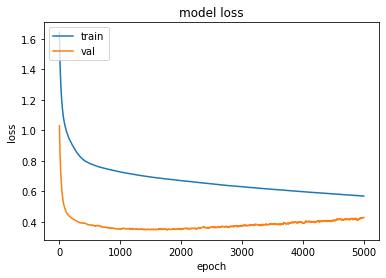

In [148]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

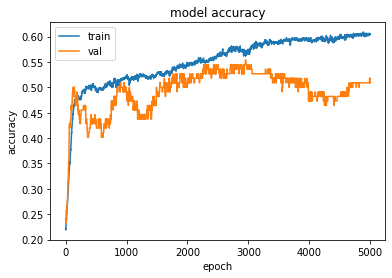

In [149]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Lower learning rate </span>

<span style="color:green"> This was not a good idea ... you were underfitting to begin with. Look at using LR scheduling with fit one cycle </span>

In [151]:
l1_norm = 1e-4

model4 = Sequential()
model4.add(Dense(13, activation='relu', activity_regularizer=l1(l1_norm)))
model4.add(Dense(11, activation='relu', activity_regularizer=l1(l1_norm)))
model4.add(Dense(3, activation='linear'))

In [153]:
# set learning rate

lr = 1e-5
model4.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history4 = model4.fit(X_train3, y_train3,
          batch_size=100, epochs=5000,
          validation_data=(X_test3, y_test3))


Train on 1004 samples, validate on 112 samples
Epoch 1/5000
1004/1004 [==============================] - 1s 1ms/sample - loss: 1.0632 - accuracy: 0.4243 - val_loss: 0.5507 - val_accuracy: 0.3214
Epoch 2/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 1.0625 - accuracy: 0.4253 - val_loss: 0.5502 - val_accuracy: 0.3214
Epoch 3/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 1.0619 - accuracy: 0.4253 - val_loss: 0.5496 - val_accuracy: 0.3214
Epoch 4/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 1.0612 - accuracy: 0.4253 - val_loss: 0.5491 - val_accuracy: 0.3214
Epoch 5/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 1.0606 - accuracy: 0.4253 - val_loss: 0.5486 - val_accuracy: 0.3214
Epoch 6/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 1.0599 - accuracy: 0.4253 - val_loss: 0.5481 - val_accuracy: 0.3214
Epoch 7/5000
1004/1004 [==============================] - 0s

1004/1004 [==============================] - 0s 60us/sample - loss: 1.0135 - accuracy: 0.4283 - val_loss: 0.5105 - val_accuracy: 0.3482
Epoch 110/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 1.0132 - accuracy: 0.4283 - val_loss: 0.5102 - val_accuracy: 0.3482
Epoch 111/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 1.0129 - accuracy: 0.4283 - val_loss: 0.5099 - val_accuracy: 0.3482
Epoch 112/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 1.0126 - accuracy: 0.4283 - val_loss: 0.5097 - val_accuracy: 0.3482
Epoch 113/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 1.0122 - accuracy: 0.4283 - val_loss: 0.5095 - val_accuracy: 0.3393
Epoch 114/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 1.0119 - accuracy: 0.4283 - val_loss: 0.5093 - val_accuracy: 0.3393
Epoch 115/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 1.0116 - accuracy: 0.4283 

1004/1004 [==============================] - 0s 57us/sample - loss: 0.9829 - accuracy: 0.4363 - val_loss: 0.4861 - val_accuracy: 0.3571
Epoch 218/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.9827 - accuracy: 0.4363 - val_loss: 0.4859 - val_accuracy: 0.3571
Epoch 219/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.9825 - accuracy: 0.4363 - val_loss: 0.4857 - val_accuracy: 0.3571
Epoch 220/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.9823 - accuracy: 0.4353 - val_loss: 0.4855 - val_accuracy: 0.3571
Epoch 221/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.9820 - accuracy: 0.4353 - val_loss: 0.4854 - val_accuracy: 0.3482
Epoch 222/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.9818 - accuracy: 0.4363 - val_loss: 0.4852 - val_accuracy: 0.3482
Epoch 223/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.9816 - accuracy: 0.4373 

1004/1004 [==============================] - 0s 50us/sample - loss: 0.9708 - accuracy: 0.4452 - val_loss: 0.4760 - val_accuracy: 0.3661
Epoch 272/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.9706 - accuracy: 0.4452 - val_loss: 0.4758 - val_accuracy: 0.3661
Epoch 273/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.9704 - accuracy: 0.4462 - val_loss: 0.4757 - val_accuracy: 0.3661
Epoch 274/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.9702 - accuracy: 0.4462 - val_loss: 0.4755 - val_accuracy: 0.3661
Epoch 275/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.9700 - accuracy: 0.4462 - val_loss: 0.4753 - val_accuracy: 0.3661
Epoch 276/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.9698 - accuracy: 0.4462 - val_loss: 0.4751 - val_accuracy: 0.3661
Epoch 277/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.9696 - accuracy: 0.4472 

1004/1004 [==============================] - 0s 42us/sample - loss: 0.9520 - accuracy: 0.4472 - val_loss: 0.4622 - val_accuracy: 0.3929
Epoch 380/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.9518 - accuracy: 0.4472 - val_loss: 0.4621 - val_accuracy: 0.3929
Epoch 381/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.9517 - accuracy: 0.4472 - val_loss: 0.4620 - val_accuracy: 0.3929
Epoch 382/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.9515 - accuracy: 0.4472 - val_loss: 0.4618 - val_accuracy: 0.3929
Epoch 383/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.9514 - accuracy: 0.4472 - val_loss: 0.4617 - val_accuracy: 0.3929
Epoch 384/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.9512 - accuracy: 0.4472 - val_loss: 0.4616 - val_accuracy: 0.3929
Epoch 385/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.9511 - accuracy: 0.4472 

1004/1004 [==============================] - 0s 76us/sample - loss: 0.9366 - accuracy: 0.4552 - val_loss: 0.4511 - val_accuracy: 0.4018
Epoch 488/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.9365 - accuracy: 0.4552 - val_loss: 0.4510 - val_accuracy: 0.4018
Epoch 489/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.9364 - accuracy: 0.4552 - val_loss: 0.4509 - val_accuracy: 0.4018
Epoch 490/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.9363 - accuracy: 0.4542 - val_loss: 0.4508 - val_accuracy: 0.4018
Epoch 491/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.9361 - accuracy: 0.4542 - val_loss: 0.4507 - val_accuracy: 0.4018
Epoch 492/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.9360 - accuracy: 0.4542 - val_loss: 0.4506 - val_accuracy: 0.4018
Epoch 493/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.9359 - accuracy: 0.4552 

1004/1004 [==============================] - 0s 72us/sample - loss: 0.9235 - accuracy: 0.4631 - val_loss: 0.4423 - val_accuracy: 0.4018
Epoch 596/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.9234 - accuracy: 0.4641 - val_loss: 0.4422 - val_accuracy: 0.4018
Epoch 597/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.9233 - accuracy: 0.4641 - val_loss: 0.4421 - val_accuracy: 0.4018
Epoch 598/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.9232 - accuracy: 0.4631 - val_loss: 0.4420 - val_accuracy: 0.4018
Epoch 599/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.9231 - accuracy: 0.4631 - val_loss: 0.4420 - val_accuracy: 0.4018
Epoch 600/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.9230 - accuracy: 0.4622 - val_loss: 0.4420 - val_accuracy: 0.4018
Epoch 601/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.9228 - accuracy: 0.4641 

1004/1004 [==============================] - 0s 77us/sample - loss: 0.9125 - accuracy: 0.4811 - val_loss: 0.4355 - val_accuracy: 0.4196
Epoch 704/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.9124 - accuracy: 0.4811 - val_loss: 0.4354 - val_accuracy: 0.4196
Epoch 705/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.9123 - accuracy: 0.4811 - val_loss: 0.4353 - val_accuracy: 0.4196
Epoch 706/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.9122 - accuracy: 0.4811 - val_loss: 0.4352 - val_accuracy: 0.4196
Epoch 707/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.9121 - accuracy: 0.4811 - val_loss: 0.4352 - val_accuracy: 0.4196
Epoch 708/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.9120 - accuracy: 0.4811 - val_loss: 0.4351 - val_accuracy: 0.4196
Epoch 709/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.9119 - accuracy: 0.4821 

1004/1004 [==============================] - 0s 76us/sample - loss: 0.9023 - accuracy: 0.4771 - val_loss: 0.4295 - val_accuracy: 0.4107
Epoch 812/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.9022 - accuracy: 0.4761 - val_loss: 0.4294 - val_accuracy: 0.4107
Epoch 813/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.9021 - accuracy: 0.4771 - val_loss: 0.4294 - val_accuracy: 0.4107
Epoch 814/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.9020 - accuracy: 0.4771 - val_loss: 0.4293 - val_accuracy: 0.4107
Epoch 815/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.9019 - accuracy: 0.4771 - val_loss: 0.4292 - val_accuracy: 0.4107
Epoch 816/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.9018 - accuracy: 0.4781 - val_loss: 0.4292 - val_accuracy: 0.4107
Epoch 817/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.9017 - accuracy: 0.4781 

1004/1004 [==============================] - 0s 80us/sample - loss: 0.8924 - accuracy: 0.4801 - val_loss: 0.4236 - val_accuracy: 0.4018
Epoch 920/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8923 - accuracy: 0.4801 - val_loss: 0.4236 - val_accuracy: 0.4018
Epoch 921/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8922 - accuracy: 0.4801 - val_loss: 0.4236 - val_accuracy: 0.4018
Epoch 922/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8921 - accuracy: 0.4811 - val_loss: 0.4235 - val_accuracy: 0.4018
Epoch 923/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.8921 - accuracy: 0.4811 - val_loss: 0.4234 - val_accuracy: 0.4018
Epoch 924/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8920 - accuracy: 0.4811 - val_loss: 0.4233 - val_accuracy: 0.4018
Epoch 925/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.8919 - accuracy: 0.4811 

1004/1004 [==============================] - 0s 82us/sample - loss: 0.8832 - accuracy: 0.4781 - val_loss: 0.4181 - val_accuracy: 0.4018
Epoch 1028/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8831 - accuracy: 0.4781 - val_loss: 0.4181 - val_accuracy: 0.4018
Epoch 1029/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8830 - accuracy: 0.4781 - val_loss: 0.4181 - val_accuracy: 0.4018
Epoch 1030/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.8829 - accuracy: 0.4781 - val_loss: 0.4182 - val_accuracy: 0.4018
Epoch 1031/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8828 - accuracy: 0.4791 - val_loss: 0.4181 - val_accuracy: 0.4018
Epoch 1032/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.8828 - accuracy: 0.4801 - val_loss: 0.4181 - val_accuracy: 0.4018
Epoch 1033/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8827 - accuracy: 0

1004/1004 [==============================] - 0s 73us/sample - loss: 0.8788 - accuracy: 0.4761 - val_loss: 0.4159 - val_accuracy: 0.4018
Epoch 1082/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8787 - accuracy: 0.4761 - val_loss: 0.4158 - val_accuracy: 0.4018
Epoch 1083/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8786 - accuracy: 0.4761 - val_loss: 0.4158 - val_accuracy: 0.4018
Epoch 1084/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8785 - accuracy: 0.4761 - val_loss: 0.4157 - val_accuracy: 0.4018
Epoch 1085/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8785 - accuracy: 0.4761 - val_loss: 0.4157 - val_accuracy: 0.4018
Epoch 1086/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8784 - accuracy: 0.4761 - val_loss: 0.4157 - val_accuracy: 0.4018
Epoch 1087/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8783 - accuracy: 0

1004/1004 [==============================] - 0s 77us/sample - loss: 0.8748 - accuracy: 0.4791 - val_loss: 0.4134 - val_accuracy: 0.4196
Epoch 1136/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8748 - accuracy: 0.4791 - val_loss: 0.4132 - val_accuracy: 0.4286
Epoch 1137/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.8747 - accuracy: 0.4791 - val_loss: 0.4132 - val_accuracy: 0.4286
Epoch 1138/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.8746 - accuracy: 0.4791 - val_loss: 0.4131 - val_accuracy: 0.4286
Epoch 1139/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.8745 - accuracy: 0.4791 - val_loss: 0.4131 - val_accuracy: 0.4286
Epoch 1140/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8744 - accuracy: 0.4791 - val_loss: 0.4131 - val_accuracy: 0.4286
Epoch 1141/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8744 - accuracy: 0

1004/1004 [==============================] - 0s 75us/sample - loss: 0.8709 - accuracy: 0.4781 - val_loss: 0.4114 - val_accuracy: 0.4196
Epoch 1190/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8709 - accuracy: 0.4781 - val_loss: 0.4113 - val_accuracy: 0.4196
Epoch 1191/5000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.8708 - accuracy: 0.4781 - val_loss: 0.4112 - val_accuracy: 0.4196
Epoch 1192/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8707 - accuracy: 0.4781 - val_loss: 0.4112 - val_accuracy: 0.4196
Epoch 1193/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8707 - accuracy: 0.4781 - val_loss: 0.4111 - val_accuracy: 0.4196
Epoch 1194/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8706 - accuracy: 0.4781 - val_loss: 0.4111 - val_accuracy: 0.4196
Epoch 1195/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8705 - accuracy: 0

Epoch 1243/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8674 - accuracy: 0.4801 - val_loss: 0.4092 - val_accuracy: 0.4286
Epoch 1244/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8673 - accuracy: 0.4801 - val_loss: 0.4092 - val_accuracy: 0.4286
Epoch 1245/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8672 - accuracy: 0.4791 - val_loss: 0.4092 - val_accuracy: 0.4375
Epoch 1246/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8672 - accuracy: 0.4781 - val_loss: 0.4092 - val_accuracy: 0.4375
Epoch 1247/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8671 - accuracy: 0.4791 - val_loss: 0.4091 - val_accuracy: 0.4375
Epoch 1248/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8670 - accuracy: 0.4801 - val_loss: 0.4092 - val_accuracy: 0.4375
Epoch 1249/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.86

Epoch 1297/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8638 - accuracy: 0.4801 - val_loss: 0.4074 - val_accuracy: 0.4375
Epoch 1298/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8637 - accuracy: 0.4801 - val_loss: 0.4073 - val_accuracy: 0.4375
Epoch 1299/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8637 - accuracy: 0.4801 - val_loss: 0.4073 - val_accuracy: 0.4375
Epoch 1300/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8636 - accuracy: 0.4801 - val_loss: 0.4072 - val_accuracy: 0.4375
Epoch 1301/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8635 - accuracy: 0.4801 - val_loss: 0.4072 - val_accuracy: 0.4375
Epoch 1302/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.8635 - accuracy: 0.4801 - val_loss: 0.4072 - val_accuracy: 0.4375
Epoch 1303/5000
1004/1004 [==============================] - 0s 147us/sample - loss: 0.8

Epoch 1351/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8603 - accuracy: 0.4821 - val_loss: 0.4055 - val_accuracy: 0.4464
Epoch 1352/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.8602 - accuracy: 0.4821 - val_loss: 0.4055 - val_accuracy: 0.4464
Epoch 1353/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.8602 - accuracy: 0.4811 - val_loss: 0.4055 - val_accuracy: 0.4464
Epoch 1354/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.8601 - accuracy: 0.4821 - val_loss: 0.4054 - val_accuracy: 0.4464
Epoch 1355/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8601 - accuracy: 0.4821 - val_loss: 0.4054 - val_accuracy: 0.4464
Epoch 1356/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.8600 - accuracy: 0.4821 - val_loss: 0.4054 - val_accuracy: 0.4464
Epoch 1357/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.85

Epoch 1405/5000
1004/1004 [==============================] - 0s 106us/sample - loss: 0.8569 - accuracy: 0.4821 - val_loss: 0.4032 - val_accuracy: 0.4464
Epoch 1406/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.8568 - accuracy: 0.4821 - val_loss: 0.4031 - val_accuracy: 0.4464
Epoch 1407/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.8567 - accuracy: 0.4831 - val_loss: 0.4031 - val_accuracy: 0.4464
Epoch 1408/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.8567 - accuracy: 0.4831 - val_loss: 0.4031 - val_accuracy: 0.4464
Epoch 1409/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.8566 - accuracy: 0.4831 - val_loss: 0.4030 - val_accuracy: 0.4464
Epoch 1410/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.8566 - accuracy: 0.4831 - val_loss: 0.4029 - val_accuracy: 0.4464
Epoch 1411/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8

Epoch 1459/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8535 - accuracy: 0.4831 - val_loss: 0.4010 - val_accuracy: 0.4464
Epoch 1460/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8535 - accuracy: 0.4831 - val_loss: 0.4010 - val_accuracy: 0.4464
Epoch 1461/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8534 - accuracy: 0.4831 - val_loss: 0.4010 - val_accuracy: 0.4464
Epoch 1462/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8533 - accuracy: 0.4831 - val_loss: 0.4009 - val_accuracy: 0.4464
Epoch 1463/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8532 - accuracy: 0.4831 - val_loss: 0.4009 - val_accuracy: 0.4464
Epoch 1464/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8532 - accuracy: 0.4831 - val_loss: 0.4009 - val_accuracy: 0.4464
Epoch 1465/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.85

Epoch 1513/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8500 - accuracy: 0.4811 - val_loss: 0.3994 - val_accuracy: 0.4375
Epoch 1514/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8500 - accuracy: 0.4811 - val_loss: 0.3994 - val_accuracy: 0.4375
Epoch 1515/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8499 - accuracy: 0.4811 - val_loss: 0.3993 - val_accuracy: 0.4375
Epoch 1516/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8498 - accuracy: 0.4811 - val_loss: 0.3992 - val_accuracy: 0.4375
Epoch 1517/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8498 - accuracy: 0.4811 - val_loss: 0.3992 - val_accuracy: 0.4375
Epoch 1518/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8497 - accuracy: 0.4811 - val_loss: 0.3991 - val_accuracy: 0.4375
Epoch 1519/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.84

Epoch 1567/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.8465 - accuracy: 0.4841 - val_loss: 0.3975 - val_accuracy: 0.4375
Epoch 1568/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.8464 - accuracy: 0.4841 - val_loss: 0.3975 - val_accuracy: 0.4375
Epoch 1569/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.8464 - accuracy: 0.4841 - val_loss: 0.3974 - val_accuracy: 0.4375
Epoch 1570/5000
1004/1004 [==============================] - 0s 116us/sample - loss: 0.8463 - accuracy: 0.4841 - val_loss: 0.3974 - val_accuracy: 0.4375
Epoch 1571/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.8463 - accuracy: 0.4841 - val_loss: 0.3973 - val_accuracy: 0.4375
Epoch 1572/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.8462 - accuracy: 0.4831 - val_loss: 0.3973 - val_accuracy: 0.4375
Epoch 1573/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.8

Epoch 1621/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8432 - accuracy: 0.4871 - val_loss: 0.3957 - val_accuracy: 0.4464
Epoch 1622/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8431 - accuracy: 0.4880 - val_loss: 0.3956 - val_accuracy: 0.4464
Epoch 1623/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8431 - accuracy: 0.4880 - val_loss: 0.3956 - val_accuracy: 0.4464
Epoch 1624/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8430 - accuracy: 0.4880 - val_loss: 0.3956 - val_accuracy: 0.4464
Epoch 1625/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8430 - accuracy: 0.4880 - val_loss: 0.3955 - val_accuracy: 0.4464
Epoch 1626/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8429 - accuracy: 0.4880 - val_loss: 0.3955 - val_accuracy: 0.4464
Epoch 1627/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.84

Epoch 1675/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8400 - accuracy: 0.4910 - val_loss: 0.3943 - val_accuracy: 0.4643
Epoch 1676/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.8400 - accuracy: 0.4910 - val_loss: 0.3943 - val_accuracy: 0.4643
Epoch 1677/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8399 - accuracy: 0.4910 - val_loss: 0.3943 - val_accuracy: 0.4643
Epoch 1678/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.8399 - accuracy: 0.4920 - val_loss: 0.3943 - val_accuracy: 0.4643
Epoch 1679/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8398 - accuracy: 0.4920 - val_loss: 0.3942 - val_accuracy: 0.4643
Epoch 1680/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8398 - accuracy: 0.4920 - val_loss: 0.3942 - val_accuracy: 0.4643
Epoch 1681/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.83

Epoch 1729/5000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.8371 - accuracy: 0.4980 - val_loss: 0.3924 - val_accuracy: 0.4554
Epoch 1730/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.8370 - accuracy: 0.4990 - val_loss: 0.3924 - val_accuracy: 0.4554
Epoch 1731/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.8370 - accuracy: 0.4990 - val_loss: 0.3924 - val_accuracy: 0.4554
Epoch 1732/5000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.8369 - accuracy: 0.4990 - val_loss: 0.3924 - val_accuracy: 0.4554
Epoch 1733/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.8369 - accuracy: 0.4990 - val_loss: 0.3923 - val_accuracy: 0.4554
Epoch 1734/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.8368 - accuracy: 0.5000 - val_loss: 0.3922 - val_accuracy: 0.4554
Epoch 1735/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.83

Epoch 1783/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8342 - accuracy: 0.5010 - val_loss: 0.3913 - val_accuracy: 0.4554
Epoch 1784/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8342 - accuracy: 0.5000 - val_loss: 0.3913 - val_accuracy: 0.4554
Epoch 1785/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8341 - accuracy: 0.4990 - val_loss: 0.3913 - val_accuracy: 0.4554
Epoch 1786/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8341 - accuracy: 0.4990 - val_loss: 0.3913 - val_accuracy: 0.4554
Epoch 1787/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8340 - accuracy: 0.5000 - val_loss: 0.3913 - val_accuracy: 0.4554
Epoch 1788/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8340 - accuracy: 0.5010 - val_loss: 0.3912 - val_accuracy: 0.4554
Epoch 1789/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.83

Epoch 1837/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8315 - accuracy: 0.5030 - val_loss: 0.3899 - val_accuracy: 0.4732
Epoch 1838/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8314 - accuracy: 0.5030 - val_loss: 0.3898 - val_accuracy: 0.4732
Epoch 1839/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8314 - accuracy: 0.5030 - val_loss: 0.3898 - val_accuracy: 0.4732
Epoch 1840/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.8313 - accuracy: 0.5030 - val_loss: 0.3897 - val_accuracy: 0.4732
Epoch 1841/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8313 - accuracy: 0.5030 - val_loss: 0.3897 - val_accuracy: 0.4732
Epoch 1842/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8312 - accuracy: 0.5020 - val_loss: 0.3895 - val_accuracy: 0.4732
Epoch 1843/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.83

Epoch 1891/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8288 - accuracy: 0.5010 - val_loss: 0.3876 - val_accuracy: 0.4732
Epoch 1892/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8288 - accuracy: 0.5010 - val_loss: 0.3875 - val_accuracy: 0.4732
Epoch 1893/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8287 - accuracy: 0.5010 - val_loss: 0.3874 - val_accuracy: 0.4732
Epoch 1894/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8287 - accuracy: 0.5010 - val_loss: 0.3874 - val_accuracy: 0.4732
Epoch 1895/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8286 - accuracy: 0.5010 - val_loss: 0.3873 - val_accuracy: 0.4732
Epoch 1896/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.8286 - accuracy: 0.5010 - val_loss: 0.3873 - val_accuracy: 0.4732
Epoch 1897/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.82

Epoch 1945/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.8264 - accuracy: 0.5030 - val_loss: 0.3863 - val_accuracy: 0.4643
Epoch 1946/5000
1004/1004 [==============================] - 0s 105us/sample - loss: 0.8264 - accuracy: 0.5030 - val_loss: 0.3862 - val_accuracy: 0.4643
Epoch 1947/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.8263 - accuracy: 0.5030 - val_loss: 0.3861 - val_accuracy: 0.4643
Epoch 1948/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.8263 - accuracy: 0.5030 - val_loss: 0.3861 - val_accuracy: 0.4643
Epoch 1949/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.8262 - accuracy: 0.5030 - val_loss: 0.3860 - val_accuracy: 0.4643
Epoch 1950/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8262 - accuracy: 0.5030 - val_loss: 0.3860 - val_accuracy: 0.4643
Epoch 1951/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.

Epoch 1999/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8241 - accuracy: 0.5030 - val_loss: 0.3847 - val_accuracy: 0.4643
Epoch 2000/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.8240 - accuracy: 0.5030 - val_loss: 0.3847 - val_accuracy: 0.4643
Epoch 2001/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8240 - accuracy: 0.5030 - val_loss: 0.3847 - val_accuracy: 0.4643
Epoch 2002/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8239 - accuracy: 0.5030 - val_loss: 0.3847 - val_accuracy: 0.4643
Epoch 2003/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8239 - accuracy: 0.5040 - val_loss: 0.3847 - val_accuracy: 0.4643
Epoch 2004/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8238 - accuracy: 0.5040 - val_loss: 0.3847 - val_accuracy: 0.4643
Epoch 2005/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.82

Epoch 2053/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.8217 - accuracy: 0.5020 - val_loss: 0.3843 - val_accuracy: 0.4643
Epoch 2054/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.8216 - accuracy: 0.5020 - val_loss: 0.3842 - val_accuracy: 0.4643
Epoch 2055/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.8216 - accuracy: 0.5020 - val_loss: 0.3842 - val_accuracy: 0.4643
Epoch 2056/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.8216 - accuracy: 0.5020 - val_loss: 0.3842 - val_accuracy: 0.4643
Epoch 2057/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.8215 - accuracy: 0.5020 - val_loss: 0.3842 - val_accuracy: 0.4643
Epoch 2058/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.8215 - accuracy: 0.5030 - val_loss: 0.3842 - val_accuracy: 0.4643
Epoch 2059/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.82

Epoch 2107/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8196 - accuracy: 0.5020 - val_loss: 0.3834 - val_accuracy: 0.4732
Epoch 2108/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8196 - accuracy: 0.5020 - val_loss: 0.3834 - val_accuracy: 0.4732
Epoch 2109/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8195 - accuracy: 0.5020 - val_loss: 0.3833 - val_accuracy: 0.4732
Epoch 2110/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8195 - accuracy: 0.5030 - val_loss: 0.3833 - val_accuracy: 0.4732
Epoch 2111/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8194 - accuracy: 0.5030 - val_loss: 0.3832 - val_accuracy: 0.4732
Epoch 2112/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.8194 - accuracy: 0.5030 - val_loss: 0.3832 - val_accuracy: 0.4732
Epoch 2113/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.81

Epoch 2161/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.8175 - accuracy: 0.5020 - val_loss: 0.3821 - val_accuracy: 0.4643
Epoch 2162/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.8175 - accuracy: 0.5020 - val_loss: 0.3821 - val_accuracy: 0.4643
Epoch 2163/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.8174 - accuracy: 0.5020 - val_loss: 0.3821 - val_accuracy: 0.4643
Epoch 2164/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.8174 - accuracy: 0.5020 - val_loss: 0.3821 - val_accuracy: 0.4643
Epoch 2165/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.8173 - accuracy: 0.5020 - val_loss: 0.3821 - val_accuracy: 0.4643
Epoch 2166/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.8173 - accuracy: 0.5010 - val_loss: 0.3820 - val_accuracy: 0.4643
Epoch 2167/5000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.81

Epoch 2215/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.8155 - accuracy: 0.5000 - val_loss: 0.3811 - val_accuracy: 0.4732
Epoch 2216/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8154 - accuracy: 0.5000 - val_loss: 0.3811 - val_accuracy: 0.4732
Epoch 2217/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.8154 - accuracy: 0.4990 - val_loss: 0.3810 - val_accuracy: 0.4732
Epoch 2218/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8154 - accuracy: 0.4990 - val_loss: 0.3810 - val_accuracy: 0.4732
Epoch 2219/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.8154 - accuracy: 0.4990 - val_loss: 0.3811 - val_accuracy: 0.4732
Epoch 2220/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0.8153 - accuracy: 0.4990 - val_loss: 0.3811 - val_accuracy: 0.4732
Epoch 2221/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.

Epoch 2269/5000
1004/1004 [==============================] - 0s 102us/sample - loss: 0.8134 - accuracy: 0.4980 - val_loss: 0.3809 - val_accuracy: 0.4732
Epoch 2270/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8134 - accuracy: 0.4980 - val_loss: 0.3808 - val_accuracy: 0.4732
Epoch 2271/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.8134 - accuracy: 0.4980 - val_loss: 0.3808 - val_accuracy: 0.4732
Epoch 2272/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8133 - accuracy: 0.4980 - val_loss: 0.3808 - val_accuracy: 0.4732
Epoch 2273/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.8133 - accuracy: 0.4980 - val_loss: 0.3808 - val_accuracy: 0.4732
Epoch 2274/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.8132 - accuracy: 0.4980 - val_loss: 0.3808 - val_accuracy: 0.4732
Epoch 2275/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.8

Epoch 2323/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.8114 - accuracy: 0.5020 - val_loss: 0.3800 - val_accuracy: 0.4732
Epoch 2324/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.8113 - accuracy: 0.5020 - val_loss: 0.3799 - val_accuracy: 0.4732
Epoch 2325/5000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.8113 - accuracy: 0.5020 - val_loss: 0.3799 - val_accuracy: 0.4732
Epoch 2326/5000
1004/1004 [==============================] - 0s 133us/sample - loss: 0.8113 - accuracy: 0.5020 - val_loss: 0.3799 - val_accuracy: 0.4732
Epoch 2327/5000
1004/1004 [==============================] - 0s 109us/sample - loss: 0.8112 - accuracy: 0.5020 - val_loss: 0.3799 - val_accuracy: 0.4732
Epoch 2328/5000
1004/1004 [==============================] - 0s 125us/sample - loss: 0.8112 - accuracy: 0.5020 - val_loss: 0.3799 - val_accuracy: 0.4732
Epoch 2329/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0

Epoch 2430/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8076 - accuracy: 0.5060 - val_loss: 0.3777 - val_accuracy: 0.4643
Epoch 2431/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.8076 - accuracy: 0.5060 - val_loss: 0.3776 - val_accuracy: 0.4643
Epoch 2432/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8076 - accuracy: 0.5060 - val_loss: 0.3776 - val_accuracy: 0.4643
Epoch 2433/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8075 - accuracy: 0.5060 - val_loss: 0.3776 - val_accuracy: 0.4643
Epoch 2434/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8075 - accuracy: 0.5060 - val_loss: 0.3777 - val_accuracy: 0.4643
Epoch 2435/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8075 - accuracy: 0.5050 - val_loss: 0.3777 - val_accuracy: 0.4643
Epoch 2436/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.80

Epoch 2484/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.8058 - accuracy: 0.5070 - val_loss: 0.3771 - val_accuracy: 0.4643
Epoch 2485/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.8057 - accuracy: 0.5070 - val_loss: 0.3771 - val_accuracy: 0.4643
Epoch 2486/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.8057 - accuracy: 0.5070 - val_loss: 0.3771 - val_accuracy: 0.4643
Epoch 2487/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8057 - accuracy: 0.5070 - val_loss: 0.3771 - val_accuracy: 0.4643
Epoch 2488/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8056 - accuracy: 0.5070 - val_loss: 0.3770 - val_accuracy: 0.4643
Epoch 2489/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.8056 - accuracy: 0.5060 - val_loss: 0.3770 - val_accuracy: 0.4643
Epoch 2490/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.80

Epoch 2538/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.8041 - accuracy: 0.5090 - val_loss: 0.3766 - val_accuracy: 0.4643
Epoch 2539/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.8041 - accuracy: 0.5090 - val_loss: 0.3768 - val_accuracy: 0.4643
Epoch 2540/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.8040 - accuracy: 0.5080 - val_loss: 0.3768 - val_accuracy: 0.4643
Epoch 2541/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.8040 - accuracy: 0.5080 - val_loss: 0.3769 - val_accuracy: 0.4643
Epoch 2542/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.8039 - accuracy: 0.5070 - val_loss: 0.3768 - val_accuracy: 0.4643
Epoch 2543/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.8039 - accuracy: 0.5080 - val_loss: 0.3768 - val_accuracy: 0.4643
Epoch 2544/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.80

Epoch 2592/5000
1004/1004 [==============================] - 0s 122us/sample - loss: 0.8024 - accuracy: 0.5100 - val_loss: 0.3758 - val_accuracy: 0.4732
Epoch 2593/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.8024 - accuracy: 0.5100 - val_loss: 0.3758 - val_accuracy: 0.4732
Epoch 2594/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.8023 - accuracy: 0.5100 - val_loss: 0.3758 - val_accuracy: 0.4732
Epoch 2595/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.8023 - accuracy: 0.5090 - val_loss: 0.3758 - val_accuracy: 0.4732
Epoch 2596/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.8023 - accuracy: 0.5110 - val_loss: 0.3758 - val_accuracy: 0.4732
Epoch 2597/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.8022 - accuracy: 0.5100 - val_loss: 0.3758 - val_accuracy: 0.4732
Epoch 2598/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.

Epoch 2646/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.8008 - accuracy: 0.5110 - val_loss: 0.3748 - val_accuracy: 0.4732
Epoch 2647/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.8008 - accuracy: 0.5110 - val_loss: 0.3748 - val_accuracy: 0.4732
Epoch 2648/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.8007 - accuracy: 0.5110 - val_loss: 0.3748 - val_accuracy: 0.4732
Epoch 2649/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.8007 - accuracy: 0.5110 - val_loss: 0.3748 - val_accuracy: 0.4732
Epoch 2650/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.8007 - accuracy: 0.5100 - val_loss: 0.3749 - val_accuracy: 0.4732
Epoch 2651/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.8006 - accuracy: 0.5100 - val_loss: 0.3749 - val_accuracy: 0.4732
Epoch 2652/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.80

Epoch 2700/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7992 - accuracy: 0.5100 - val_loss: 0.3744 - val_accuracy: 0.4732
Epoch 2701/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7992 - accuracy: 0.5100 - val_loss: 0.3745 - val_accuracy: 0.4732
Epoch 2702/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7991 - accuracy: 0.5100 - val_loss: 0.3745 - val_accuracy: 0.4732
Epoch 2703/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7991 - accuracy: 0.5100 - val_loss: 0.3745 - val_accuracy: 0.4732
Epoch 2704/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7991 - accuracy: 0.5100 - val_loss: 0.3745 - val_accuracy: 0.4732
Epoch 2705/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7990 - accuracy: 0.5100 - val_loss: 0.3744 - val_accuracy: 0.4732
Epoch 2706/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.79

Epoch 2754/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7976 - accuracy: 0.5110 - val_loss: 0.3731 - val_accuracy: 0.4732
Epoch 2755/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7976 - accuracy: 0.5110 - val_loss: 0.3731 - val_accuracy: 0.4732
Epoch 2756/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7976 - accuracy: 0.5110 - val_loss: 0.3731 - val_accuracy: 0.4732
Epoch 2757/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7976 - accuracy: 0.5110 - val_loss: 0.3731 - val_accuracy: 0.4732
Epoch 2758/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7975 - accuracy: 0.5110 - val_loss: 0.3731 - val_accuracy: 0.4732
Epoch 2759/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7975 - accuracy: 0.5110 - val_loss: 0.3732 - val_accuracy: 0.4732
Epoch 2760/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.79

Epoch 2808/5000
1004/1004 [==============================] - 0s 114us/sample - loss: 0.7961 - accuracy: 0.5100 - val_loss: 0.3727 - val_accuracy: 0.4732
Epoch 2809/5000
1004/1004 [==============================] - 0s 101us/sample - loss: 0.7961 - accuracy: 0.5100 - val_loss: 0.3726 - val_accuracy: 0.4732
Epoch 2810/5000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.7960 - accuracy: 0.5100 - val_loss: 0.3726 - val_accuracy: 0.4732
Epoch 2811/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7960 - accuracy: 0.5100 - val_loss: 0.3726 - val_accuracy: 0.4732
Epoch 2812/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7960 - accuracy: 0.5100 - val_loss: 0.3726 - val_accuracy: 0.4732
Epoch 2813/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7959 - accuracy: 0.5100 - val_loss: 0.3726 - val_accuracy: 0.4732
Epoch 2814/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.

Epoch 2862/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7946 - accuracy: 0.5120 - val_loss: 0.3716 - val_accuracy: 0.4732
Epoch 2863/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7946 - accuracy: 0.5120 - val_loss: 0.3715 - val_accuracy: 0.4732
Epoch 2864/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7945 - accuracy: 0.5120 - val_loss: 0.3715 - val_accuracy: 0.4732
Epoch 2865/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7945 - accuracy: 0.5120 - val_loss: 0.3715 - val_accuracy: 0.4732
Epoch 2866/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7945 - accuracy: 0.5120 - val_loss: 0.3714 - val_accuracy: 0.4732
Epoch 2867/5000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.7945 - accuracy: 0.5120 - val_loss: 0.3714 - val_accuracy: 0.4732
Epoch 2868/5000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.79

Epoch 2916/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7930 - accuracy: 0.5129 - val_loss: 0.3711 - val_accuracy: 0.4732
Epoch 2917/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7930 - accuracy: 0.5129 - val_loss: 0.3711 - val_accuracy: 0.4732
Epoch 2918/5000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7930 - accuracy: 0.5129 - val_loss: 0.3710 - val_accuracy: 0.4732
Epoch 2919/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7930 - accuracy: 0.5129 - val_loss: 0.3710 - val_accuracy: 0.4732
Epoch 2920/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7929 - accuracy: 0.5129 - val_loss: 0.3709 - val_accuracy: 0.4732
Epoch 2921/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7929 - accuracy: 0.5129 - val_loss: 0.3709 - val_accuracy: 0.4732
Epoch 2922/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.79

Epoch 2970/5000
1004/1004 [==============================] - 0s 103us/sample - loss: 0.7916 - accuracy: 0.5129 - val_loss: 0.3706 - val_accuracy: 0.4732
Epoch 2971/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7916 - accuracy: 0.5129 - val_loss: 0.3706 - val_accuracy: 0.4732
Epoch 2972/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7915 - accuracy: 0.5129 - val_loss: 0.3706 - val_accuracy: 0.4732
Epoch 2973/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7915 - accuracy: 0.5129 - val_loss: 0.3705 - val_accuracy: 0.4732
Epoch 2974/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7915 - accuracy: 0.5129 - val_loss: 0.3705 - val_accuracy: 0.4732
Epoch 2975/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7915 - accuracy: 0.5129 - val_loss: 0.3705 - val_accuracy: 0.4732
Epoch 2976/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7

Epoch 3024/5000
1004/1004 [==============================] - 0s 117us/sample - loss: 0.7902 - accuracy: 0.5149 - val_loss: 0.3694 - val_accuracy: 0.4821
Epoch 3025/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7902 - accuracy: 0.5149 - val_loss: 0.3694 - val_accuracy: 0.4821
Epoch 3026/5000
1004/1004 [==============================] - 0s 106us/sample - loss: 0.7902 - accuracy: 0.5149 - val_loss: 0.3694 - val_accuracy: 0.4821
Epoch 3027/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7902 - accuracy: 0.5149 - val_loss: 0.3695 - val_accuracy: 0.4821
Epoch 3028/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7901 - accuracy: 0.5149 - val_loss: 0.3695 - val_accuracy: 0.4821
Epoch 3029/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7901 - accuracy: 0.5149 - val_loss: 0.3695 - val_accuracy: 0.4821
Epoch 3030/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.

Epoch 3078/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7889 - accuracy: 0.5139 - val_loss: 0.3692 - val_accuracy: 0.4821
Epoch 3079/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7889 - accuracy: 0.5149 - val_loss: 0.3691 - val_accuracy: 0.4821
Epoch 3080/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.7889 - accuracy: 0.5149 - val_loss: 0.3690 - val_accuracy: 0.4821
Epoch 3081/5000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7888 - accuracy: 0.5149 - val_loss: 0.3690 - val_accuracy: 0.4821
Epoch 3082/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7888 - accuracy: 0.5149 - val_loss: 0.3690 - val_accuracy: 0.4821
Epoch 3083/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7888 - accuracy: 0.5149 - val_loss: 0.3690 - val_accuracy: 0.4821
Epoch 3084/5000
1004/1004 [==============================] - 0s 82us/sample - loss: 0.78

Epoch 3132/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7876 - accuracy: 0.5129 - val_loss: 0.3685 - val_accuracy: 0.4821
Epoch 3133/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7875 - accuracy: 0.5129 - val_loss: 0.3685 - val_accuracy: 0.4821
Epoch 3134/5000
1004/1004 [==============================] - 0s 85us/sample - loss: 0.7875 - accuracy: 0.5129 - val_loss: 0.3685 - val_accuracy: 0.4821
Epoch 3135/5000
1004/1004 [==============================] - 0s 84us/sample - loss: 0.7875 - accuracy: 0.5129 - val_loss: 0.3685 - val_accuracy: 0.4821
Epoch 3136/5000
1004/1004 [==============================] - 0s 87us/sample - loss: 0.7875 - accuracy: 0.5129 - val_loss: 0.3685 - val_accuracy: 0.4821
Epoch 3137/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.7874 - accuracy: 0.5139 - val_loss: 0.3686 - val_accuracy: 0.4821
Epoch 3138/5000
1004/1004 [==============================] - 0s 88us/sample - loss: 0.78

Epoch 3186/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7863 - accuracy: 0.5139 - val_loss: 0.3684 - val_accuracy: 0.4821
Epoch 3187/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7862 - accuracy: 0.5139 - val_loss: 0.3684 - val_accuracy: 0.4821
Epoch 3188/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7862 - accuracy: 0.5139 - val_loss: 0.3684 - val_accuracy: 0.4821
Epoch 3189/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7862 - accuracy: 0.5139 - val_loss: 0.3683 - val_accuracy: 0.4821
Epoch 3190/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7862 - accuracy: 0.5139 - val_loss: 0.3683 - val_accuracy: 0.4821
Epoch 3191/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7862 - accuracy: 0.5139 - val_loss: 0.3683 - val_accuracy: 0.4821
Epoch 3192/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.78

Epoch 3240/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7850 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.4821
Epoch 3241/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7850 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.4821
Epoch 3242/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7849 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.4821
Epoch 3243/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7849 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.4821
Epoch 3244/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7849 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.4821
Epoch 3245/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7849 - accuracy: 0.5139 - val_loss: 0.3679 - val_accuracy: 0.4821
Epoch 3246/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.78

Epoch 3294/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7838 - accuracy: 0.5169 - val_loss: 0.3672 - val_accuracy: 0.4911
Epoch 3295/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7837 - accuracy: 0.5169 - val_loss: 0.3672 - val_accuracy: 0.4911
Epoch 3296/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7837 - accuracy: 0.5169 - val_loss: 0.3672 - val_accuracy: 0.4911
Epoch 3297/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7837 - accuracy: 0.5169 - val_loss: 0.3672 - val_accuracy: 0.4911
Epoch 3298/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7837 - accuracy: 0.5169 - val_loss: 0.3672 - val_accuracy: 0.4911
Epoch 3299/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7836 - accuracy: 0.5169 - val_loss: 0.3672 - val_accuracy: 0.4911
Epoch 3300/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.78

Epoch 3348/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7825 - accuracy: 0.5209 - val_loss: 0.3668 - val_accuracy: 0.4911
Epoch 3349/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7825 - accuracy: 0.5209 - val_loss: 0.3668 - val_accuracy: 0.4911
Epoch 3350/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7824 - accuracy: 0.5209 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3351/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7824 - accuracy: 0.5209 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3352/5000
1004/1004 [==============================] - 0s 86us/sample - loss: 0.7824 - accuracy: 0.5209 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3353/5000
1004/1004 [==============================] - 0s 110us/sample - loss: 0.7824 - accuracy: 0.5209 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3354/5000
1004/1004 [==============================] - 0s 96us/sample - loss: 0.7

Epoch 3402/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7813 - accuracy: 0.5199 - val_loss: 0.3670 - val_accuracy: 0.4911
Epoch 3403/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7813 - accuracy: 0.5209 - val_loss: 0.3670 - val_accuracy: 0.4911
Epoch 3404/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7812 - accuracy: 0.5199 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3405/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7812 - accuracy: 0.5199 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3406/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7812 - accuracy: 0.5199 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3407/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7812 - accuracy: 0.5209 - val_loss: 0.3669 - val_accuracy: 0.4911
Epoch 3408/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.78

Epoch 3456/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7801 - accuracy: 0.5199 - val_loss: 0.3666 - val_accuracy: 0.4911
Epoch 3457/5000
1004/1004 [==============================] - 0s 78us/sample - loss: 0.7801 - accuracy: 0.5189 - val_loss: 0.3666 - val_accuracy: 0.4911
Epoch 3458/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7801 - accuracy: 0.5189 - val_loss: 0.3666 - val_accuracy: 0.4911
Epoch 3459/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7801 - accuracy: 0.5199 - val_loss: 0.3666 - val_accuracy: 0.4911
Epoch 3460/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7800 - accuracy: 0.5209 - val_loss: 0.3665 - val_accuracy: 0.4911
Epoch 3461/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7800 - accuracy: 0.5209 - val_loss: 0.3665 - val_accuracy: 0.4911
Epoch 3462/5000
1004/1004 [==============================] - 0s 95us/sample - loss: 0.78

Epoch 3510/5000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7790 - accuracy: 0.5219 - val_loss: 0.3660 - val_accuracy: 0.4911
Epoch 3511/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7790 - accuracy: 0.5219 - val_loss: 0.3660 - val_accuracy: 0.4911
Epoch 3512/5000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7790 - accuracy: 0.5209 - val_loss: 0.3660 - val_accuracy: 0.4911
Epoch 3513/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7790 - accuracy: 0.5209 - val_loss: 0.3660 - val_accuracy: 0.4911
Epoch 3514/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7789 - accuracy: 0.5209 - val_loss: 0.3660 - val_accuracy: 0.4911
Epoch 3515/5000
1004/1004 [==============================] - 0s 80us/sample - loss: 0.7789 - accuracy: 0.5199 - val_loss: 0.3661 - val_accuracy: 0.4911
Epoch 3516/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.77

Epoch 3564/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7779 - accuracy: 0.5229 - val_loss: 0.3654 - val_accuracy: 0.5000
Epoch 3565/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7779 - accuracy: 0.5229 - val_loss: 0.3653 - val_accuracy: 0.5000
Epoch 3566/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7779 - accuracy: 0.5229 - val_loss: 0.3654 - val_accuracy: 0.5000
Epoch 3567/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7778 - accuracy: 0.5229 - val_loss: 0.3654 - val_accuracy: 0.5000
Epoch 3568/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7778 - accuracy: 0.5229 - val_loss: 0.3653 - val_accuracy: 0.5000
Epoch 3569/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7778 - accuracy: 0.5239 - val_loss: 0.3653 - val_accuracy: 0.5000
Epoch 3570/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.77

Epoch 3618/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7769 - accuracy: 0.5199 - val_loss: 0.3653 - val_accuracy: 0.5000
Epoch 3619/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7768 - accuracy: 0.5199 - val_loss: 0.3653 - val_accuracy: 0.5000
Epoch 3620/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7768 - accuracy: 0.5199 - val_loss: 0.3653 - val_accuracy: 0.5000
Epoch 3621/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7768 - accuracy: 0.5209 - val_loss: 0.3652 - val_accuracy: 0.5000
Epoch 3622/5000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7768 - accuracy: 0.5219 - val_loss: 0.3652 - val_accuracy: 0.5000
Epoch 3623/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7768 - accuracy: 0.5219 - val_loss: 0.3652 - val_accuracy: 0.5000
Epoch 3624/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.77

Epoch 3672/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7758 - accuracy: 0.5229 - val_loss: 0.3646 - val_accuracy: 0.5089
Epoch 3673/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7758 - accuracy: 0.5229 - val_loss: 0.3646 - val_accuracy: 0.5089
Epoch 3674/5000
1004/1004 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.48 - 0s 72us/sample - loss: 0.7758 - accuracy: 0.5229 - val_loss: 0.3646 - val_accuracy: 0.5000
Epoch 3675/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7758 - accuracy: 0.5229 - val_loss: 0.3645 - val_accuracy: 0.5000
Epoch 3676/5000
1004/1004 [==============================] - 0s 75us/sample - loss: 0.7758 - accuracy: 0.5229 - val_loss: 0.3645 - val_accuracy: 0.5000
Epoch 3677/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7757 - accuracy: 0.5229 - val_loss: 0.3644 - val_accuracy: 0.5000
Epoch 3678/5000
1004/1004 [===================

Epoch 3779/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7738 - accuracy: 0.5209 - val_loss: 0.3635 - val_accuracy: 0.5089
Epoch 3780/5000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7738 - accuracy: 0.5209 - val_loss: 0.3635 - val_accuracy: 0.5089
Epoch 3781/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7738 - accuracy: 0.5209 - val_loss: 0.3634 - val_accuracy: 0.5089
Epoch 3782/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7738 - accuracy: 0.5199 - val_loss: 0.3634 - val_accuracy: 0.5089
Epoch 3783/5000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7738 - accuracy: 0.5199 - val_loss: 0.3633 - val_accuracy: 0.5089
Epoch 3784/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7737 - accuracy: 0.5199 - val_loss: 0.3633 - val_accuracy: 0.5089
Epoch 3785/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.77

Epoch 3833/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7728 - accuracy: 0.5219 - val_loss: 0.3628 - val_accuracy: 0.5089
Epoch 3834/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7728 - accuracy: 0.5229 - val_loss: 0.3628 - val_accuracy: 0.5089
Epoch 3835/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7728 - accuracy: 0.5219 - val_loss: 0.3628 - val_accuracy: 0.5089
Epoch 3836/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7728 - accuracy: 0.5209 - val_loss: 0.3629 - val_accuracy: 0.5089
Epoch 3837/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7727 - accuracy: 0.5229 - val_loss: 0.3628 - val_accuracy: 0.5000
Epoch 3838/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7727 - accuracy: 0.5229 - val_loss: 0.3627 - val_accuracy: 0.5000
Epoch 3839/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.77

Epoch 3887/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7719 - accuracy: 0.5229 - val_loss: 0.3626 - val_accuracy: 0.5000
Epoch 3888/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7719 - accuracy: 0.5229 - val_loss: 0.3626 - val_accuracy: 0.5000
Epoch 3889/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7718 - accuracy: 0.5229 - val_loss: 0.3626 - val_accuracy: 0.5000
Epoch 3890/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7718 - accuracy: 0.5229 - val_loss: 0.3626 - val_accuracy: 0.5000
Epoch 3891/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7718 - accuracy: 0.5229 - val_loss: 0.3626 - val_accuracy: 0.5000
Epoch 3892/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7718 - accuracy: 0.5229 - val_loss: 0.3627 - val_accuracy: 0.5000
Epoch 3893/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.77

Epoch 3941/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7710 - accuracy: 0.5229 - val_loss: 0.3625 - val_accuracy: 0.5000
Epoch 3942/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7710 - accuracy: 0.5229 - val_loss: 0.3625 - val_accuracy: 0.5000
Epoch 3943/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7709 - accuracy: 0.5229 - val_loss: 0.3625 - val_accuracy: 0.5000
Epoch 3944/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7709 - accuracy: 0.5229 - val_loss: 0.3625 - val_accuracy: 0.5000
Epoch 3945/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7709 - accuracy: 0.5229 - val_loss: 0.3626 - val_accuracy: 0.5000
Epoch 3946/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7709 - accuracy: 0.5229 - val_loss: 0.3627 - val_accuracy: 0.5000
Epoch 3947/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.77

Epoch 3995/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7701 - accuracy: 0.5219 - val_loss: 0.3623 - val_accuracy: 0.5000
Epoch 3996/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7701 - accuracy: 0.5219 - val_loss: 0.3623 - val_accuracy: 0.5000
Epoch 3997/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7701 - accuracy: 0.5219 - val_loss: 0.3623 - val_accuracy: 0.5000
Epoch 3998/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7701 - accuracy: 0.5239 - val_loss: 0.3623 - val_accuracy: 0.5000
Epoch 3999/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7701 - accuracy: 0.5239 - val_loss: 0.3622 - val_accuracy: 0.5000
Epoch 4000/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7701 - accuracy: 0.5239 - val_loss: 0.3622 - val_accuracy: 0.5000
Epoch 4001/5000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.77

1004/1004 [==============================] - 0s 57us/sample - loss: 0.7685 - accuracy: 0.5229 - val_loss: 0.3617 - val_accuracy: 0.5000
Epoch 4103/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7685 - accuracy: 0.5239 - val_loss: 0.3617 - val_accuracy: 0.5000
Epoch 4104/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7685 - accuracy: 0.5239 - val_loss: 0.3617 - val_accuracy: 0.5000
Epoch 4105/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7684 - accuracy: 0.5239 - val_loss: 0.3617 - val_accuracy: 0.5000
Epoch 4106/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7684 - accuracy: 0.5239 - val_loss: 0.3617 - val_accuracy: 0.5000
Epoch 4107/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7684 - accuracy: 0.5239 - val_loss: 0.3617 - val_accuracy: 0.5000
Epoch 4108/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7684 - accuracy: 0

1004/1004 [==============================] - 0s 53us/sample - loss: 0.7676 - accuracy: 0.5229 - val_loss: 0.3609 - val_accuracy: 0.5000
Epoch 4157/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7676 - accuracy: 0.5229 - val_loss: 0.3609 - val_accuracy: 0.5000
Epoch 4158/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7676 - accuracy: 0.5229 - val_loss: 0.3609 - val_accuracy: 0.5000
Epoch 4159/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7676 - accuracy: 0.5229 - val_loss: 0.3609 - val_accuracy: 0.5000
Epoch 4160/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7676 - accuracy: 0.5229 - val_loss: 0.3609 - val_accuracy: 0.5000
Epoch 4161/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7675 - accuracy: 0.5229 - val_loss: 0.3609 - val_accuracy: 0.5000
Epoch 4162/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7675 - accuracy: 0

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7667 - accuracy: 0.5219 - val_loss: 0.3611 - val_accuracy: 0.5000
Epoch 4211/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7667 - accuracy: 0.5209 - val_loss: 0.3611 - val_accuracy: 0.5000
Epoch 4212/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7667 - accuracy: 0.5209 - val_loss: 0.3610 - val_accuracy: 0.5000
Epoch 4213/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7667 - accuracy: 0.5209 - val_loss: 0.3610 - val_accuracy: 0.5000
Epoch 4214/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7667 - accuracy: 0.5209 - val_loss: 0.3610 - val_accuracy: 0.5000
Epoch 4215/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7666 - accuracy: 0.5219 - val_loss: 0.3610 - val_accuracy: 0.5000
Epoch 4216/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7666 - accuracy: 0

1004/1004 [==============================] - 0s 59us/sample - loss: 0.7658 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4265/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7658 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4266/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7658 - accuracy: 0.5219 - val_loss: 0.3604 - val_accuracy: 0.5000
Epoch 4267/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7658 - accuracy: 0.5209 - val_loss: 0.3604 - val_accuracy: 0.5000
Epoch 4268/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7657 - accuracy: 0.5209 - val_loss: 0.3604 - val_accuracy: 0.5000
Epoch 4269/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7657 - accuracy: 0.5209 - val_loss: 0.3604 - val_accuracy: 0.5000
Epoch 4270/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7657 - accuracy: 0

1004/1004 [==============================] - 0s 59us/sample - loss: 0.7649 - accuracy: 0.5199 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 4319/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7649 - accuracy: 0.5199 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 4320/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7649 - accuracy: 0.5199 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 4321/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7648 - accuracy: 0.5199 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 4322/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7648 - accuracy: 0.5199 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 4323/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7648 - accuracy: 0.5199 - val_loss: 0.3599 - val_accuracy: 0.5000
Epoch 4324/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7648 - accuracy: 0

1004/1004 [==============================] - 0s 65us/sample - loss: 0.7640 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4373/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7640 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4374/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7640 - accuracy: 0.5219 - val_loss: 0.3606 - val_accuracy: 0.5000
Epoch 4375/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7639 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4376/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7639 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4377/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7639 - accuracy: 0.5219 - val_loss: 0.3605 - val_accuracy: 0.5000
Epoch 4378/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7639 - accuracy: 0

1004/1004 [==============================] - 0s 55us/sample - loss: 0.7632 - accuracy: 0.5209 - val_loss: 0.3593 - val_accuracy: 0.5000
Epoch 4427/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7632 - accuracy: 0.5209 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 4428/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7631 - accuracy: 0.5209 - val_loss: 0.3592 - val_accuracy: 0.5000
Epoch 4429/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7631 - accuracy: 0.5209 - val_loss: 0.3591 - val_accuracy: 0.5000
Epoch 4430/5000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7631 - accuracy: 0.5219 - val_loss: 0.3591 - val_accuracy: 0.5000
Epoch 4431/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7631 - accuracy: 0.5219 - val_loss: 0.3591 - val_accuracy: 0.5000
Epoch 4432/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7631 - accuracy: 0

Epoch 4480/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7624 - accuracy: 0.5199 - val_loss: 0.3581 - val_accuracy: 0.5089
Epoch 4481/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7624 - accuracy: 0.5199 - val_loss: 0.3581 - val_accuracy: 0.5089
Epoch 4482/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7624 - accuracy: 0.5199 - val_loss: 0.3581 - val_accuracy: 0.5089
Epoch 4483/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7624 - accuracy: 0.5199 - val_loss: 0.3581 - val_accuracy: 0.5089
Epoch 4484/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7624 - accuracy: 0.5199 - val_loss: 0.3581 - val_accuracy: 0.5089
Epoch 4485/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7624 - accuracy: 0.5199 - val_loss: 0.3581 - val_accuracy: 0.5089
Epoch 4486/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.76

Epoch 4534/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7616 - accuracy: 0.5219 - val_loss: 0.3575 - val_accuracy: 0.5089
Epoch 4535/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7616 - accuracy: 0.5219 - val_loss: 0.3575 - val_accuracy: 0.5089
Epoch 4536/5000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7616 - accuracy: 0.5219 - val_loss: 0.3575 - val_accuracy: 0.5089
Epoch 4537/5000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7616 - accuracy: 0.5219 - val_loss: 0.3575 - val_accuracy: 0.5089
Epoch 4538/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7616 - accuracy: 0.5219 - val_loss: 0.3574 - val_accuracy: 0.5089
Epoch 4539/5000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7616 - accuracy: 0.5219 - val_loss: 0.3574 - val_accuracy: 0.5089
Epoch 4540/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.76

Epoch 4588/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7608 - accuracy: 0.5219 - val_loss: 0.3572 - val_accuracy: 0.5179
Epoch 4589/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7608 - accuracy: 0.5219 - val_loss: 0.3572 - val_accuracy: 0.5179
Epoch 4590/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7608 - accuracy: 0.5219 - val_loss: 0.3572 - val_accuracy: 0.5179
Epoch 4591/5000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7607 - accuracy: 0.5219 - val_loss: 0.3571 - val_accuracy: 0.5179
Epoch 4592/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7607 - accuracy: 0.5209 - val_loss: 0.3572 - val_accuracy: 0.5179
Epoch 4593/5000
1004/1004 [==============================] - 0s 76us/sample - loss: 0.7607 - accuracy: 0.5219 - val_loss: 0.3571 - val_accuracy: 0.5179
Epoch 4594/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.76

Epoch 4642/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7599 - accuracy: 0.5209 - val_loss: 0.3574 - val_accuracy: 0.5000
Epoch 4643/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7599 - accuracy: 0.5209 - val_loss: 0.3574 - val_accuracy: 0.5000
Epoch 4644/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7599 - accuracy: 0.5209 - val_loss: 0.3573 - val_accuracy: 0.5000
Epoch 4645/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7599 - accuracy: 0.5219 - val_loss: 0.3573 - val_accuracy: 0.5179
Epoch 4646/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7599 - accuracy: 0.5219 - val_loss: 0.3573 - val_accuracy: 0.5179
Epoch 4647/5000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7599 - accuracy: 0.5219 - val_loss: 0.3573 - val_accuracy: 0.5179
Epoch 4648/5000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.75

Epoch 4696/5000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7592 - accuracy: 0.5239 - val_loss: 0.3567 - val_accuracy: 0.5179
Epoch 4697/5000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7592 - accuracy: 0.5239 - val_loss: 0.3567 - val_accuracy: 0.5179
Epoch 4698/5000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7591 - accuracy: 0.5239 - val_loss: 0.3567 - val_accuracy: 0.5179
Epoch 4699/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7591 - accuracy: 0.5239 - val_loss: 0.3567 - val_accuracy: 0.5179
Epoch 4700/5000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7591 - accuracy: 0.5239 - val_loss: 0.3567 - val_accuracy: 0.5089
Epoch 4701/5000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7591 - accuracy: 0.5239 - val_loss: 0.3567 - val_accuracy: 0.5089
Epoch 4702/5000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.75

Epoch 4750/5000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7583 - accuracy: 0.5239 - val_loss: 0.3570 - val_accuracy: 0.5089
Epoch 4751/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7583 - accuracy: 0.5239 - val_loss: 0.3570 - val_accuracy: 0.5089
Epoch 4752/5000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7583 - accuracy: 0.5229 - val_loss: 0.3570 - val_accuracy: 0.5089
Epoch 4753/5000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.7583 - accuracy: 0.5219 - val_loss: 0.3570 - val_accuracy: 0.5089
Epoch 4754/5000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7583 - accuracy: 0.5219 - val_loss: 0.3569 - val_accuracy: 0.5089
Epoch 4755/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7583 - accuracy: 0.5219 - val_loss: 0.3569 - val_accuracy: 0.5089
Epoch 4756/5000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.75

Epoch 4804/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7576 - accuracy: 0.5219 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 4805/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7576 - accuracy: 0.5219 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 4806/5000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7575 - accuracy: 0.5219 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 4807/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7575 - accuracy: 0.5219 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 4808/5000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7575 - accuracy: 0.5219 - val_loss: 0.3566 - val_accuracy: 0.5089
Epoch 4809/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7575 - accuracy: 0.5219 - val_loss: 0.3567 - val_accuracy: 0.5089
Epoch 4810/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.75

Epoch 4858/5000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7568 - accuracy: 0.5209 - val_loss: 0.3563 - val_accuracy: 0.5179
Epoch 4859/5000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7568 - accuracy: 0.5219 - val_loss: 0.3563 - val_accuracy: 0.5179
Epoch 4860/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7568 - accuracy: 0.5219 - val_loss: 0.3563 - val_accuracy: 0.5179
Epoch 4861/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7567 - accuracy: 0.5219 - val_loss: 0.3564 - val_accuracy: 0.5179
Epoch 4862/5000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7567 - accuracy: 0.5219 - val_loss: 0.3564 - val_accuracy: 0.5000
Epoch 4863/5000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7567 - accuracy: 0.5209 - val_loss: 0.3564 - val_accuracy: 0.5000
Epoch 4864/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.75

Epoch 4912/5000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7560 - accuracy: 0.5219 - val_loss: 0.3560 - val_accuracy: 0.5000
Epoch 4913/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7560 - accuracy: 0.5219 - val_loss: 0.3561 - val_accuracy: 0.5000
Epoch 4914/5000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7560 - accuracy: 0.5219 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4915/5000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7559 - accuracy: 0.5219 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4916/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7559 - accuracy: 0.5219 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4917/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7559 - accuracy: 0.5209 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4918/5000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.75

Epoch 4966/5000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7553 - accuracy: 0.5209 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4967/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7553 - accuracy: 0.5209 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4968/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7552 - accuracy: 0.5199 - val_loss: 0.3561 - val_accuracy: 0.5089
Epoch 4969/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7552 - accuracy: 0.5199 - val_loss: 0.3561 - val_accuracy: 0.5000
Epoch 4970/5000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7552 - accuracy: 0.5199 - val_loss: 0.3561 - val_accuracy: 0.5000
Epoch 4971/5000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7552 - accuracy: 0.5199 - val_loss: 0.3560 - val_accuracy: 0.5000
Epoch 4972/5000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.75

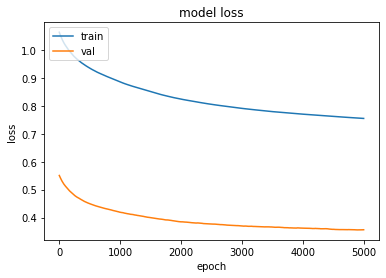

In [154]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

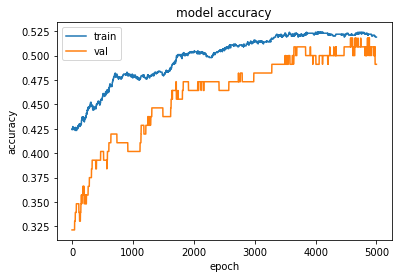

In [155]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Continue training. ... . 

In [156]:
# set learning rate

lr = 1e-5
model4.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history4 = model4.fit(X_train3, y_train3,
          batch_size=100, epochs=25000,
          validation_data=(X_test3, y_test3))


Train on 1004 samples, validate on 112 samples
Epoch 1/25000
1004/1004 [==============================] - 1s 978us/sample - loss: 0.7549 - accuracy: 0.5189 - val_loss: 0.3564 - val_accuracy: 0.4911
Epoch 2/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7548 - accuracy: 0.5189 - val_loss: 0.3563 - val_accuracy: 0.4911
Epoch 3/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7548 - accuracy: 0.5189 - val_loss: 0.3563 - val_accuracy: 0.5000
Epoch 4/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7548 - accuracy: 0.5189 - val_loss: 0.3563 - val_accuracy: 0.5000
Epoch 5/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7548 - accuracy: 0.5189 - val_loss: 0.3563 - val_accuracy: 0.5000
Epoch 6/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7547 - accuracy: 0.5199 - val_loss: 0.3563 - val_accuracy: 0.5000
Epoch 7/25000
1004/1004 [===========================

Epoch 55/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7540 - accuracy: 0.5199 - val_loss: 0.3560 - val_accuracy: 0.5000
Epoch 56/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7540 - accuracy: 0.5189 - val_loss: 0.3560 - val_accuracy: 0.5000
Epoch 57/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7540 - accuracy: 0.5199 - val_loss: 0.3559 - val_accuracy: 0.5000
Epoch 58/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7540 - accuracy: 0.5199 - val_loss: 0.3559 - val_accuracy: 0.5000
Epoch 59/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7540 - accuracy: 0.5199 - val_loss: 0.3559 - val_accuracy: 0.5000
Epoch 60/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7540 - accuracy: 0.5199 - val_loss: 0.3558 - val_accuracy: 0.5000
Epoch 61/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7540 - ac

1004/1004 [==============================] - 0s 70us/sample - loss: 0.7526 - accuracy: 0.5259 - val_loss: 0.3553 - val_accuracy: 0.5000
Epoch 164/25000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7526 - accuracy: 0.5259 - val_loss: 0.3553 - val_accuracy: 0.5000
Epoch 165/25000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.7526 - accuracy: 0.5259 - val_loss: 0.3553 - val_accuracy: 0.5000
Epoch 166/25000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7526 - accuracy: 0.5259 - val_loss: 0.3553 - val_accuracy: 0.5000
Epoch 167/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7525 - accuracy: 0.5259 - val_loss: 0.3553 - val_accuracy: 0.5000
Epoch 168/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7525 - accuracy: 0.5259 - val_loss: 0.3553 - val_accuracy: 0.5000
Epoch 169/25000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7525 - accuracy: 0

1004/1004 [==============================] - 0s 58us/sample - loss: 0.7519 - accuracy: 0.5259 - val_loss: 0.3550 - val_accuracy: 0.4911
Epoch 218/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7519 - accuracy: 0.5259 - val_loss: 0.3550 - val_accuracy: 0.4911
Epoch 219/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7519 - accuracy: 0.5259 - val_loss: 0.3550 - val_accuracy: 0.4911
Epoch 220/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7519 - accuracy: 0.5259 - val_loss: 0.3550 - val_accuracy: 0.4911
Epoch 221/25000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7519 - accuracy: 0.5259 - val_loss: 0.3550 - val_accuracy: 0.4911
Epoch 222/25000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7519 - accuracy: 0.5259 - val_loss: 0.3550 - val_accuracy: 0.4911
Epoch 223/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7518 - accuracy: 0

1004/1004 [==============================] - 0s 51us/sample - loss: 0.7512 - accuracy: 0.5279 - val_loss: 0.3543 - val_accuracy: 0.4911
Epoch 272/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7512 - accuracy: 0.5279 - val_loss: 0.3543 - val_accuracy: 0.4911
Epoch 273/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7512 - accuracy: 0.5279 - val_loss: 0.3544 - val_accuracy: 0.4911
Epoch 274/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7512 - accuracy: 0.5279 - val_loss: 0.3544 - val_accuracy: 0.4911
Epoch 275/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7512 - accuracy: 0.5279 - val_loss: 0.3544 - val_accuracy: 0.4911
Epoch 276/25000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7512 - accuracy: 0.5279 - val_loss: 0.3543 - val_accuracy: 0.4911
Epoch 277/25000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7512 - accuracy: 0

1004/1004 [==============================] - 0s 63us/sample - loss: 0.7506 - accuracy: 0.5259 - val_loss: 0.3542 - val_accuracy: 0.4732
Epoch 326/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7506 - accuracy: 0.5269 - val_loss: 0.3542 - val_accuracy: 0.4821
Epoch 327/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7505 - accuracy: 0.5269 - val_loss: 0.3542 - val_accuracy: 0.4821
Epoch 328/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7505 - accuracy: 0.5269 - val_loss: 0.3542 - val_accuracy: 0.4821
Epoch 329/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7505 - accuracy: 0.5269 - val_loss: 0.3542 - val_accuracy: 0.4821
Epoch 330/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7505 - accuracy: 0.5269 - val_loss: 0.3542 - val_accuracy: 0.4821
Epoch 331/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7505 - accuracy: 0

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7500 - accuracy: 0.5289 - val_loss: 0.3537 - val_accuracy: 0.4821
Epoch 380/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7500 - accuracy: 0.5289 - val_loss: 0.3536 - val_accuracy: 0.4821
Epoch 381/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7499 - accuracy: 0.5289 - val_loss: 0.3536 - val_accuracy: 0.4821
Epoch 382/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7499 - accuracy: 0.5289 - val_loss: 0.3536 - val_accuracy: 0.4821
Epoch 383/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7499 - accuracy: 0.5289 - val_loss: 0.3536 - val_accuracy: 0.4821
Epoch 384/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7499 - accuracy: 0.5279 - val_loss: 0.3536 - val_accuracy: 0.4821
Epoch 385/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7499 - accuracy: 0

1004/1004 [==============================] - 0s 97us/sample - loss: 0.7493 - accuracy: 0.5299 - val_loss: 0.3537 - val_accuracy: 0.4911
Epoch 434/25000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7493 - accuracy: 0.5299 - val_loss: 0.3538 - val_accuracy: 0.4911
Epoch 435/25000
1004/1004 [==============================] - 0s 90us/sample - loss: 0.7493 - accuracy: 0.5299 - val_loss: 0.3538 - val_accuracy: 0.4911
Epoch 436/25000
1004/1004 [==============================] - 0s 103us/sample - loss: 0.7493 - accuracy: 0.5299 - val_loss: 0.3538 - val_accuracy: 0.4911
Epoch 437/25000
1004/1004 [==============================] - 0s 94us/sample - loss: 0.7493 - accuracy: 0.5299 - val_loss: 0.3537 - val_accuracy: 0.4911
Epoch 438/25000
1004/1004 [==============================] - 0s 91us/sample - loss: 0.7493 - accuracy: 0.5299 - val_loss: 0.3537 - val_accuracy: 0.4911
Epoch 439/25000
1004/1004 [==============================] - 0s 98us/sample - loss: 0.7493 - accuracy: 

Epoch 487/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7487 - accuracy: 0.5289 - val_loss: 0.3535 - val_accuracy: 0.4911
Epoch 488/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7487 - accuracy: 0.5289 - val_loss: 0.3535 - val_accuracy: 0.4911
Epoch 489/25000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7487 - accuracy: 0.5289 - val_loss: 0.3535 - val_accuracy: 0.4911
Epoch 490/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7487 - accuracy: 0.5279 - val_loss: 0.3535 - val_accuracy: 0.4911
Epoch 491/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7487 - accuracy: 0.5279 - val_loss: 0.3535 - val_accuracy: 0.4911
Epoch 492/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7486 - accuracy: 0.5279 - val_loss: 0.3535 - val_accuracy: 0.4911
Epoch 493/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.74

Epoch 541/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7481 - accuracy: 0.5279 - val_loss: 0.3531 - val_accuracy: 0.4821
Epoch 542/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7481 - accuracy: 0.5289 - val_loss: 0.3531 - val_accuracy: 0.4821
Epoch 543/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7481 - accuracy: 0.5289 - val_loss: 0.3531 - val_accuracy: 0.4821
Epoch 544/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7480 - accuracy: 0.5289 - val_loss: 0.3531 - val_accuracy: 0.4821
Epoch 545/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7480 - accuracy: 0.5289 - val_loss: 0.3530 - val_accuracy: 0.4821
Epoch 546/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7480 - accuracy: 0.5289 - val_loss: 0.3530 - val_accuracy: 0.4821
Epoch 547/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.74

Epoch 595/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7475 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 596/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7475 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 597/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7474 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 598/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7474 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 599/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7474 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 600/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7474 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 601/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.74

Epoch 649/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7469 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4732
Epoch 650/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7468 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4732
Epoch 651/25000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7468 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4732
Epoch 652/25000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7468 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4732
Epoch 653/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7468 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4732
Epoch 654/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7468 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4732
Epoch 655/25000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.74

Epoch 703/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7462 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 704/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7462 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 705/25000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7462 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 706/25000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7462 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 707/25000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7462 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 708/25000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7462 - accuracy: 0.5289 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 709/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.74

Epoch 757/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7457 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 758/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7457 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 759/25000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7456 - accuracy: 0.5309 - val_loss: 0.3521 - val_accuracy: 0.4821
Epoch 760/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7456 - accuracy: 0.5309 - val_loss: 0.3521 - val_accuracy: 0.4821
Epoch 761/25000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7456 - accuracy: 0.5309 - val_loss: 0.3521 - val_accuracy: 0.4821
Epoch 762/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7456 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 763/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.74

Epoch 811/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7451 - accuracy: 0.5299 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 812/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7451 - accuracy: 0.5299 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 813/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7451 - accuracy: 0.5299 - val_loss: 0.3523 - val_accuracy: 0.4821
Epoch 814/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7451 - accuracy: 0.5299 - val_loss: 0.3524 - val_accuracy: 0.4821
Epoch 815/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7451 - accuracy: 0.5299 - val_loss: 0.3524 - val_accuracy: 0.4821
Epoch 816/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7451 - accuracy: 0.5289 - val_loss: 0.3525 - val_accuracy: 0.4821
Epoch 817/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.74

Epoch 865/25000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7446 - accuracy: 0.5289 - val_loss: 0.3528 - val_accuracy: 0.4821
Epoch 866/25000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7446 - accuracy: 0.5289 - val_loss: 0.3529 - val_accuracy: 0.4821
Epoch 867/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7446 - accuracy: 0.5289 - val_loss: 0.3529 - val_accuracy: 0.4821
Epoch 868/25000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.7446 - accuracy: 0.5289 - val_loss: 0.3528 - val_accuracy: 0.4821
Epoch 869/25000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7446 - accuracy: 0.5289 - val_loss: 0.3528 - val_accuracy: 0.4821
Epoch 870/25000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7445 - accuracy: 0.5289 - val_loss: 0.3527 - val_accuracy: 0.4821
Epoch 871/25000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.74

Epoch 919/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7440 - accuracy: 0.5289 - val_loss: 0.3526 - val_accuracy: 0.4821
Epoch 920/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7440 - accuracy: 0.5289 - val_loss: 0.3526 - val_accuracy: 0.4821
Epoch 921/25000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7440 - accuracy: 0.5289 - val_loss: 0.3526 - val_accuracy: 0.4821
Epoch 922/25000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7440 - accuracy: 0.5289 - val_loss: 0.3526 - val_accuracy: 0.4821
Epoch 923/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7440 - accuracy: 0.5289 - val_loss: 0.3526 - val_accuracy: 0.4821
Epoch 924/25000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7440 - accuracy: 0.5289 - val_loss: 0.3526 - val_accuracy: 0.4821
Epoch 925/25000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.74

Epoch 1026/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7430 - accuracy: 0.5319 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 1027/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7429 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 1028/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7429 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 1029/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7429 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 1030/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7429 - accuracy: 0.5309 - val_loss: 0.3520 - val_accuracy: 0.4821
Epoch 1031/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7429 - accuracy: 0.5309 - val_loss: 0.3519 - val_accuracy: 0.4821
Epoch 1032/25000
1004/1004 [==============================] - 0s 55us/sample - los

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7419 - accuracy: 0.5319 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1133/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7419 - accuracy: 0.5319 - val_loss: 0.3510 - val_accuracy: 0.4821
Epoch 1134/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7419 - accuracy: 0.5319 - val_loss: 0.3510 - val_accuracy: 0.4821
Epoch 1135/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7419 - accuracy: 0.5319 - val_loss: 0.3510 - val_accuracy: 0.4821
Epoch 1136/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7419 - accuracy: 0.5319 - val_loss: 0.3509 - val_accuracy: 0.4821
Epoch 1137/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7419 - accuracy: 0.5329 - val_loss: 0.3509 - val_accuracy: 0.4821
Epoch 1138/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7419 - accur

1004/1004 [==============================] - 0s 55us/sample - loss: 0.7409 - accuracy: 0.5339 - val_loss: 0.3515 - val_accuracy: 0.4821
Epoch 1239/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7409 - accuracy: 0.5349 - val_loss: 0.3515 - val_accuracy: 0.4821
Epoch 1240/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7409 - accuracy: 0.5339 - val_loss: 0.3515 - val_accuracy: 0.4821
Epoch 1241/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7409 - accuracy: 0.5339 - val_loss: 0.3515 - val_accuracy: 0.4821
Epoch 1242/25000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7409 - accuracy: 0.5329 - val_loss: 0.3515 - val_accuracy: 0.4821
Epoch 1243/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7408 - accuracy: 0.5329 - val_loss: 0.3514 - val_accuracy: 0.4821
Epoch 1244/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7408 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7398 - accuracy: 0.5339 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1345/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7398 - accuracy: 0.5329 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1346/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7398 - accuracy: 0.5329 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1347/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7398 - accuracy: 0.5329 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1348/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7398 - accuracy: 0.5329 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1349/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7398 - accuracy: 0.5329 - val_loss: 0.3511 - val_accuracy: 0.4821
Epoch 1350/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7398 - accur

1004/1004 [==============================] - 0s 62us/sample - loss: 0.7389 - accuracy: 0.5329 - val_loss: 0.3500 - val_accuracy: 0.5000
Epoch 1451/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7389 - accuracy: 0.5329 - val_loss: 0.3500 - val_accuracy: 0.5000
Epoch 1452/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7389 - accuracy: 0.5319 - val_loss: 0.3499 - val_accuracy: 0.5000
Epoch 1453/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7388 - accuracy: 0.5319 - val_loss: 0.3499 - val_accuracy: 0.5000
Epoch 1454/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7388 - accuracy: 0.5319 - val_loss: 0.3500 - val_accuracy: 0.5000
Epoch 1455/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7388 - accuracy: 0.5329 - val_loss: 0.3501 - val_accuracy: 0.5000
Epoch 1456/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7388 - accur

1004/1004 [==============================] - 0s 46us/sample - loss: 0.7379 - accuracy: 0.5359 - val_loss: 0.3501 - val_accuracy: 0.5089
Epoch 1557/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7379 - accuracy: 0.5359 - val_loss: 0.3500 - val_accuracy: 0.5089
Epoch 1558/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7379 - accuracy: 0.5349 - val_loss: 0.3500 - val_accuracy: 0.5089
Epoch 1559/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7379 - accuracy: 0.5349 - val_loss: 0.3500 - val_accuracy: 0.5089
Epoch 1560/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7379 - accuracy: 0.5349 - val_loss: 0.3501 - val_accuracy: 0.5089
Epoch 1561/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7379 - accuracy: 0.5349 - val_loss: 0.3501 - val_accuracy: 0.5089
Epoch 1562/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7379 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7370 - accuracy: 0.5309 - val_loss: 0.3500 - val_accuracy: 0.5179
Epoch 1663/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7370 - accuracy: 0.5309 - val_loss: 0.3500 - val_accuracy: 0.5179
Epoch 1664/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7370 - accuracy: 0.5309 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 1665/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7370 - accuracy: 0.5309 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 1666/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7370 - accuracy: 0.5309 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 1667/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7370 - accuracy: 0.5309 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 1668/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7370 - accur

1004/1004 [==============================] - 0s 51us/sample - loss: 0.7361 - accuracy: 0.5369 - val_loss: 0.3494 - val_accuracy: 0.5179
Epoch 1769/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7361 - accuracy: 0.5369 - val_loss: 0.3493 - val_accuracy: 0.5179
Epoch 1770/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7361 - accuracy: 0.5378 - val_loss: 0.3492 - val_accuracy: 0.5179
Epoch 1771/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7361 - accuracy: 0.5378 - val_loss: 0.3492 - val_accuracy: 0.5179
Epoch 1772/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7361 - accuracy: 0.5378 - val_loss: 0.3491 - val_accuracy: 0.5179
Epoch 1773/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7361 - accuracy: 0.5378 - val_loss: 0.3491 - val_accuracy: 0.5179
Epoch 1774/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7361 - accur

1004/1004 [==============================] - 0s 49us/sample - loss: 0.7353 - accuracy: 0.5428 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 1875/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7352 - accuracy: 0.5428 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 1876/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7352 - accuracy: 0.5428 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 1877/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7352 - accuracy: 0.5418 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 1878/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7352 - accuracy: 0.5428 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 1879/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7352 - accuracy: 0.5428 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 1880/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7352 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7344 - accuracy: 0.5448 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 1981/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7344 - accuracy: 0.5448 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 1982/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7344 - accuracy: 0.5448 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 1983/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7344 - accuracy: 0.5448 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 1984/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7344 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5179
Epoch 1985/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7344 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5179
Epoch 1986/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7344 - accur

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7336 - accuracy: 0.5428 - val_loss: 0.3482 - val_accuracy: 0.5179
Epoch 2087/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7336 - accuracy: 0.5428 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 2088/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7336 - accuracy: 0.5418 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 2089/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7336 - accuracy: 0.5418 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 2090/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7335 - accuracy: 0.5418 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 2091/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7335 - accuracy: 0.5418 - val_loss: 0.3481 - val_accuracy: 0.5179
Epoch 2092/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7335 - accur

1004/1004 [==============================] - 0s 53us/sample - loss: 0.7327 - accuracy: 0.5448 - val_loss: 0.3467 - val_accuracy: 0.5357
Epoch 2193/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7327 - accuracy: 0.5448 - val_loss: 0.3467 - val_accuracy: 0.5357
Epoch 2194/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7327 - accuracy: 0.5448 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2195/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7327 - accuracy: 0.5448 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2196/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7327 - accuracy: 0.5458 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2197/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7326 - accuracy: 0.5458 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2198/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7326 - accur

1004/1004 [==============================] - 0s 53us/sample - loss: 0.7318 - accuracy: 0.5448 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2299/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7318 - accuracy: 0.5448 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2300/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7318 - accuracy: 0.5438 - val_loss: 0.3468 - val_accuracy: 0.5268
Epoch 2301/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7317 - accuracy: 0.5438 - val_loss: 0.3467 - val_accuracy: 0.5268
Epoch 2302/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7317 - accuracy: 0.5438 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 2303/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7317 - accuracy: 0.5438 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 2304/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7317 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7309 - accuracy: 0.5428 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 2405/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7309 - accuracy: 0.5428 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 2406/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7308 - accuracy: 0.5408 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 2407/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7308 - accuracy: 0.5428 - val_loss: 0.3466 - val_accuracy: 0.5179
Epoch 2408/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7308 - accuracy: 0.5428 - val_loss: 0.3466 - val_accuracy: 0.5179
Epoch 2409/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7308 - accuracy: 0.5428 - val_loss: 0.3466 - val_accuracy: 0.5179
Epoch 2410/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7308 - accur

1004/1004 [==============================] - 0s 48us/sample - loss: 0.7300 - accuracy: 0.5438 - val_loss: 0.3462 - val_accuracy: 0.5179
Epoch 2511/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7300 - accuracy: 0.5438 - val_loss: 0.3463 - val_accuracy: 0.5179
Epoch 2512/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7300 - accuracy: 0.5438 - val_loss: 0.3463 - val_accuracy: 0.5179
Epoch 2513/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7300 - accuracy: 0.5438 - val_loss: 0.3463 - val_accuracy: 0.5179
Epoch 2514/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7300 - accuracy: 0.5438 - val_loss: 0.3463 - val_accuracy: 0.5179
Epoch 2515/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7300 - accuracy: 0.5438 - val_loss: 0.3463 - val_accuracy: 0.5179
Epoch 2516/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7300 - accur

1004/1004 [==============================] - 0s 55us/sample - loss: 0.7291 - accuracy: 0.5408 - val_loss: 0.3462 - val_accuracy: 0.5179
Epoch 2617/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7291 - accuracy: 0.5408 - val_loss: 0.3462 - val_accuracy: 0.5179
Epoch 2618/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7291 - accuracy: 0.5408 - val_loss: 0.3461 - val_accuracy: 0.5179
Epoch 2619/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7291 - accuracy: 0.5418 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 2620/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7291 - accuracy: 0.5418 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 2621/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7291 - accuracy: 0.5418 - val_loss: 0.3461 - val_accuracy: 0.5179
Epoch 2622/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7291 - accur

1004/1004 [==============================] - 0s 64us/sample - loss: 0.7283 - accuracy: 0.5408 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 2723/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7282 - accuracy: 0.5398 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 2724/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7282 - accuracy: 0.5408 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 2725/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7282 - accuracy: 0.5408 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 2726/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7282 - accuracy: 0.5408 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 2727/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7282 - accuracy: 0.5408 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 2728/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7282 - accur

1004/1004 [==============================] - 0s 55us/sample - loss: 0.7274 - accuracy: 0.5408 - val_loss: 0.3464 - val_accuracy: 0.5089
Epoch 2829/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7274 - accuracy: 0.5408 - val_loss: 0.3464 - val_accuracy: 0.5089
Epoch 2830/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7274 - accuracy: 0.5408 - val_loss: 0.3465 - val_accuracy: 0.5089
Epoch 2831/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7274 - accuracy: 0.5408 - val_loss: 0.3465 - val_accuracy: 0.5089
Epoch 2832/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7274 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5089
Epoch 2833/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7274 - accuracy: 0.5418 - val_loss: 0.3466 - val_accuracy: 0.5089
Epoch 2834/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7274 - accur

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7266 - accuracy: 0.5428 - val_loss: 0.3462 - val_accuracy: 0.5089
Epoch 2935/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7266 - accuracy: 0.5428 - val_loss: 0.3463 - val_accuracy: 0.5089
Epoch 2936/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7266 - accuracy: 0.5428 - val_loss: 0.3463 - val_accuracy: 0.5089
Epoch 2937/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7266 - accuracy: 0.5428 - val_loss: 0.3463 - val_accuracy: 0.5089
Epoch 2938/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7265 - accuracy: 0.5428 - val_loss: 0.3463 - val_accuracy: 0.5089
Epoch 2939/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7265 - accuracy: 0.5428 - val_loss: 0.3463 - val_accuracy: 0.5089
Epoch 2940/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7265 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7258 - accuracy: 0.5428 - val_loss: 0.3456 - val_accuracy: 0.5089
Epoch 3041/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7258 - accuracy: 0.5428 - val_loss: 0.3456 - val_accuracy: 0.5089
Epoch 3042/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7257 - accuracy: 0.5428 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 3043/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7257 - accuracy: 0.5428 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 3044/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7257 - accuracy: 0.5428 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 3045/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7257 - accuracy: 0.5428 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 3046/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7257 - accur

1004/1004 [==============================] - 0s 49us/sample - loss: 0.7250 - accuracy: 0.5388 - val_loss: 0.3448 - val_accuracy: 0.5179
Epoch 3147/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7250 - accuracy: 0.5388 - val_loss: 0.3448 - val_accuracy: 0.5179
Epoch 3148/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7250 - accuracy: 0.5408 - val_loss: 0.3448 - val_accuracy: 0.5179
Epoch 3149/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7250 - accuracy: 0.5408 - val_loss: 0.3448 - val_accuracy: 0.5179
Epoch 3150/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7250 - accuracy: 0.5408 - val_loss: 0.3448 - val_accuracy: 0.5179
Epoch 3151/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7250 - accuracy: 0.5418 - val_loss: 0.3448 - val_accuracy: 0.5179
Epoch 3152/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7250 - accur

1004/1004 [==============================] - 0s 63us/sample - loss: 0.7242 - accuracy: 0.5408 - val_loss: 0.3457 - val_accuracy: 0.5089
Epoch 3253/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7242 - accuracy: 0.5418 - val_loss: 0.3456 - val_accuracy: 0.5089
Epoch 3254/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7242 - accuracy: 0.5418 - val_loss: 0.3456 - val_accuracy: 0.5089
Epoch 3255/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7242 - accuracy: 0.5418 - val_loss: 0.3455 - val_accuracy: 0.5089
Epoch 3256/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7242 - accuracy: 0.5418 - val_loss: 0.3456 - val_accuracy: 0.5089
Epoch 3257/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7242 - accuracy: 0.5418 - val_loss: 0.3456 - val_accuracy: 0.5089
Epoch 3258/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7242 - accur

1004/1004 [==============================] - 0s 72us/sample - loss: 0.7235 - accuracy: 0.5428 - val_loss: 0.3466 - val_accuracy: 0.5179
Epoch 3359/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7234 - accuracy: 0.5428 - val_loss: 0.3466 - val_accuracy: 0.5179
Epoch 3360/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7234 - accuracy: 0.5418 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 3361/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7235 - accuracy: 0.5418 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 3362/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7234 - accuracy: 0.5418 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 3363/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7234 - accuracy: 0.5418 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 3364/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7234 - accur

1004/1004 [==============================] - 0s 51us/sample - loss: 0.7227 - accuracy: 0.5418 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 3465/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7227 - accuracy: 0.5408 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 3466/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7227 - accuracy: 0.5408 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 3467/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7226 - accuracy: 0.5408 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 3468/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7226 - accuracy: 0.5408 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 3469/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7226 - accuracy: 0.5408 - val_loss: 0.3466 - val_accuracy: 0.5268
Epoch 3470/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7226 - accur

1004/1004 [==============================] - 0s 56us/sample - loss: 0.7219 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5179
Epoch 3571/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7219 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5179
Epoch 3572/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7219 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5179
Epoch 3573/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7219 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5179
Epoch 3574/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7219 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5179
Epoch 3575/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7219 - accuracy: 0.5418 - val_loss: 0.3465 - val_accuracy: 0.5179
Epoch 3576/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7218 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7211 - accuracy: 0.5388 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 3677/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7211 - accuracy: 0.5388 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 3678/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7211 - accuracy: 0.5388 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 3679/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7211 - accuracy: 0.5388 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 3680/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7211 - accuracy: 0.5388 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 3681/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7211 - accuracy: 0.5388 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 3682/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7211 - accur

1004/1004 [==============================] - 0s 49us/sample - loss: 0.7203 - accuracy: 0.5369 - val_loss: 0.3458 - val_accuracy: 0.5268
Epoch 3783/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7203 - accuracy: 0.5369 - val_loss: 0.3458 - val_accuracy: 0.5268
Epoch 3784/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7203 - accuracy: 0.5369 - val_loss: 0.3457 - val_accuracy: 0.5268
Epoch 3785/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7203 - accuracy: 0.5369 - val_loss: 0.3457 - val_accuracy: 0.5268
Epoch 3786/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7203 - accuracy: 0.5369 - val_loss: 0.3457 - val_accuracy: 0.5268
Epoch 3787/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7203 - accuracy: 0.5369 - val_loss: 0.3457 - val_accuracy: 0.5268
Epoch 3788/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7203 - accur

1004/1004 [==============================] - 0s 51us/sample - loss: 0.7195 - accuracy: 0.5359 - val_loss: 0.3457 - val_accuracy: 0.5179
Epoch 3889/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7195 - accuracy: 0.5359 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 3890/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7195 - accuracy: 0.5359 - val_loss: 0.3457 - val_accuracy: 0.5179
Epoch 3891/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7195 - accuracy: 0.5359 - val_loss: 0.3457 - val_accuracy: 0.5179
Epoch 3892/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7195 - accuracy: 0.5359 - val_loss: 0.3457 - val_accuracy: 0.5179
Epoch 3893/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7195 - accuracy: 0.5359 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 3894/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7195 - accur

1004/1004 [==============================] - 0s 59us/sample - loss: 0.7188 - accuracy: 0.5359 - val_loss: 0.3455 - val_accuracy: 0.5179
Epoch 3995/25000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7188 - accuracy: 0.5369 - val_loss: 0.3455 - val_accuracy: 0.5179
Epoch 3996/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7187 - accuracy: 0.5369 - val_loss: 0.3455 - val_accuracy: 0.5179
Epoch 3997/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7188 - accuracy: 0.5369 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 3998/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7187 - accuracy: 0.5369 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 3999/25000
1004/1004 [==============================] - 0s 59us/sample - loss: 0.7187 - accuracy: 0.5369 - val_loss: 0.3456 - val_accuracy: 0.5179
Epoch 4000/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7187 - accur

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7180 - accuracy: 0.5388 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 4101/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7180 - accuracy: 0.5388 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 4102/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7180 - accuracy: 0.5378 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 4103/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.7179 - accuracy: 0.5378 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 4104/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7179 - accuracy: 0.5369 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 4105/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7179 - accuracy: 0.5369 - val_loss: 0.3457 - val_accuracy: 0.5179
Epoch 4106/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7179 - accur

1004/1004 [==============================] - 0s 44us/sample - loss: 0.7173 - accuracy: 0.5329 - val_loss: 0.3457 - val_accuracy: 0.5179
Epoch 4207/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7173 - accuracy: 0.5329 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 4208/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7172 - accuracy: 0.5339 - val_loss: 0.3458 - val_accuracy: 0.5179
Epoch 4209/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7172 - accuracy: 0.5339 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 4210/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7172 - accuracy: 0.5339 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 4211/25000
1004/1004 [==============================] - 0s 81us/sample - loss: 0.7172 - accuracy: 0.5339 - val_loss: 0.3459 - val_accuracy: 0.5179
Epoch 4212/25000
1004/1004 [==============================] - 0s 112us/sample - loss: 0.7172 - accu

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7165 - accuracy: 0.5339 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 4313/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7165 - accuracy: 0.5329 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 4314/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7165 - accuracy: 0.5329 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 4315/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7165 - accuracy: 0.5329 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 4316/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7165 - accuracy: 0.5339 - val_loss: 0.3460 - val_accuracy: 0.5179
Epoch 4317/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7165 - accuracy: 0.5349 - val_loss: 0.3461 - val_accuracy: 0.5179
Epoch 4318/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7165 - accur

1004/1004 [==============================] - 0s 59us/sample - loss: 0.7158 - accuracy: 0.5349 - val_loss: 0.3468 - val_accuracy: 0.5179
Epoch 4419/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7158 - accuracy: 0.5349 - val_loss: 0.3468 - val_accuracy: 0.5179
Epoch 4420/25000
1004/1004 [==============================] - 0s 63us/sample - loss: 0.7157 - accuracy: 0.5349 - val_loss: 0.3468 - val_accuracy: 0.5179
Epoch 4421/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7157 - accuracy: 0.5349 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 4422/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7157 - accuracy: 0.5349 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 4423/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7157 - accuracy: 0.5349 - val_loss: 0.3467 - val_accuracy: 0.5179
Epoch 4424/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7157 - accur

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7151 - accuracy: 0.5388 - val_loss: 0.3475 - val_accuracy: 0.5179
Epoch 4525/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7151 - accuracy: 0.5388 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 4526/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7151 - accuracy: 0.5388 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 4527/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7151 - accuracy: 0.5378 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 4528/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7150 - accuracy: 0.5378 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 4529/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7150 - accuracy: 0.5378 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 4530/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7150 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7143 - accuracy: 0.5369 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4631/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7143 - accuracy: 0.5369 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4632/25000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7143 - accuracy: 0.5369 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4633/25000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7143 - accuracy: 0.5369 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4634/25000
1004/1004 [==============================] - 0s 97us/sample - loss: 0.7143 - accuracy: 0.5369 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4635/25000
1004/1004 [==============================] - 0s 111us/sample - loss: 0.7143 - accuracy: 0.5369 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4636/25000
1004/1004 [==============================] - 0s 123us/sample - loss: 0.7143 - acc

1004/1004 [==============================] - 0s 58us/sample - loss: 0.7137 - accuracy: 0.5408 - val_loss: 0.3470 - val_accuracy: 0.5089
Epoch 4737/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7137 - accuracy: 0.5408 - val_loss: 0.3471 - val_accuracy: 0.5089
Epoch 4738/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7137 - accuracy: 0.5398 - val_loss: 0.3472 - val_accuracy: 0.5089
Epoch 4739/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7137 - accuracy: 0.5398 - val_loss: 0.3472 - val_accuracy: 0.5089
Epoch 4740/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7136 - accuracy: 0.5408 - val_loss: 0.3472 - val_accuracy: 0.5089
Epoch 4741/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.7136 - accuracy: 0.5398 - val_loss: 0.3472 - val_accuracy: 0.5089
Epoch 4742/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7136 - accur

1004/1004 [==============================] - 0s 71us/sample - loss: 0.7130 - accuracy: 0.5418 - val_loss: 0.3471 - val_accuracy: 0.5089
Epoch 4843/25000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7130 - accuracy: 0.5418 - val_loss: 0.3471 - val_accuracy: 0.5089
Epoch 4844/25000
1004/1004 [==============================] - 0s 73us/sample - loss: 0.7130 - accuracy: 0.5418 - val_loss: 0.3471 - val_accuracy: 0.5089
Epoch 4845/25000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7129 - accuracy: 0.5418 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 4846/25000
1004/1004 [==============================] - 0s 68us/sample - loss: 0.7129 - accuracy: 0.5418 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 4847/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7129 - accuracy: 0.5418 - val_loss: 0.3469 - val_accuracy: 0.5179
Epoch 4848/25000
1004/1004 [==============================] - 0s 69us/sample - loss: 0.7129 - accur

1004/1004 [==============================] - 0s 52us/sample - loss: 0.7123 - accuracy: 0.5418 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4949/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7123 - accuracy: 0.5418 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4950/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7123 - accuracy: 0.5418 - val_loss: 0.3472 - val_accuracy: 0.5179
Epoch 4951/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7123 - accuracy: 0.5418 - val_loss: 0.3472 - val_accuracy: 0.5268
Epoch 4952/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7123 - accuracy: 0.5418 - val_loss: 0.3472 - val_accuracy: 0.5268
Epoch 4953/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7123 - accuracy: 0.5418 - val_loss: 0.3472 - val_accuracy: 0.5268
Epoch 4954/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7123 - accur

1004/1004 [==============================] - 0s 51us/sample - loss: 0.7116 - accuracy: 0.5428 - val_loss: 0.3473 - val_accuracy: 0.5179
Epoch 5055/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7116 - accuracy: 0.5428 - val_loss: 0.3473 - val_accuracy: 0.5179
Epoch 5056/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7116 - accuracy: 0.5428 - val_loss: 0.3473 - val_accuracy: 0.5179
Epoch 5057/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7116 - accuracy: 0.5428 - val_loss: 0.3473 - val_accuracy: 0.5179
Epoch 5058/25000
1004/1004 [==============================] - 0s 55us/sample - loss: 0.7115 - accuracy: 0.5428 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 5059/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7115 - accuracy: 0.5428 - val_loss: 0.3474 - val_accuracy: 0.5179
Epoch 5060/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7115 - accur

1004/1004 [==============================] - 0s 49us/sample - loss: 0.7109 - accuracy: 0.5448 - val_loss: 0.3471 - val_accuracy: 0.5179
Epoch 5161/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7109 - accuracy: 0.5438 - val_loss: 0.3471 - val_accuracy: 0.5179
Epoch 5162/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7109 - accuracy: 0.5438 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 5163/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7109 - accuracy: 0.5438 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 5164/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7109 - accuracy: 0.5438 - val_loss: 0.3471 - val_accuracy: 0.5179
Epoch 5165/25000
1004/1004 [==============================] - 0s 56us/sample - loss: 0.7109 - accuracy: 0.5448 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 5166/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7108 - accur

1004/1004 [==============================] - 0s 48us/sample - loss: 0.7102 - accuracy: 0.5438 - val_loss: 0.3476 - val_accuracy: 0.5089
Epoch 5267/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7102 - accuracy: 0.5438 - val_loss: 0.3476 - val_accuracy: 0.5089
Epoch 5268/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7102 - accuracy: 0.5438 - val_loss: 0.3476 - val_accuracy: 0.5089
Epoch 5269/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.7102 - accuracy: 0.5438 - val_loss: 0.3476 - val_accuracy: 0.5089
Epoch 5270/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7102 - accuracy: 0.5438 - val_loss: 0.3476 - val_accuracy: 0.5089
Epoch 5271/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7102 - accuracy: 0.5438 - val_loss: 0.3475 - val_accuracy: 0.5089
Epoch 5272/25000
1004/1004 [==============================] - 0s 58us/sample - loss: 0.7102 - accur

1004/1004 [==============================] - 0s 50us/sample - loss: 0.7095 - accuracy: 0.5448 - val_loss: 0.3478 - val_accuracy: 0.5179
Epoch 5373/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7095 - accuracy: 0.5448 - val_loss: 0.3478 - val_accuracy: 0.5179
Epoch 5374/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7095 - accuracy: 0.5448 - val_loss: 0.3478 - val_accuracy: 0.5179
Epoch 5375/25000
1004/1004 [==============================] - 0s 54us/sample - loss: 0.7095 - accuracy: 0.5448 - val_loss: 0.3479 - val_accuracy: 0.5179
Epoch 5376/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.7095 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5179
Epoch 5377/25000
1004/1004 [==============================] - 0s 61us/sample - loss: 0.7095 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5179
Epoch 5378/25000
1004/1004 [==============================] - 0s 57us/sample - loss: 0.7095 - accur

1004/1004 [==============================] - 0s 67us/sample - loss: 0.7088 - accuracy: 0.5428 - val_loss: 0.3470 - val_accuracy: 0.5268
Epoch 5479/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7088 - accuracy: 0.5428 - val_loss: 0.3471 - val_accuracy: 0.5179
Epoch 5480/25000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7088 - accuracy: 0.5438 - val_loss: 0.3471 - val_accuracy: 0.5179
Epoch 5481/25000
1004/1004 [==============================] - 0s 60us/sample - loss: 0.7088 - accuracy: 0.5438 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 5482/25000
1004/1004 [==============================] - 0s 66us/sample - loss: 0.7088 - accuracy: 0.5438 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 5483/25000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7088 - accuracy: 0.5428 - val_loss: 0.3470 - val_accuracy: 0.5179
Epoch 5484/25000
1004/1004 [==============================] - 0s 67us/sample - loss: 0.7088 - accur

1004/1004 [==============================] - 0s 54us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5585/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5586/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3473 - val_accuracy: 0.5268
Epoch 5587/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7081 - accuracy: 0.5458 - val_loss: 0.3473 - val_accuracy: 0.5268
Epoch 5588/25000
1004/1004 [==============================] - 0s 62us/sample - loss: 0.7081 - accuracy: 0.5458 - val_loss: 0.3473 - val_accuracy: 0.5268
Epoch 5589/25000
1004/1004 [==============================] - 0s 65us/sample - loss: 0.7081 - accuracy: 0.5448 - val_loss: 0.3473 - val_accuracy: 0.5268
Epoch 5590/25000
1004/1004 [==============================] - 0s 64us/sample - loss: 0.7081 - accur

1004/1004 [==============================] - 0s 69us/sample - loss: 0.7075 - accuracy: 0.5458 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 5691/25000
1004/1004 [==============================] - 0s 77us/sample - loss: 0.7075 - accuracy: 0.5458 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 5692/25000
1004/1004 [==============================] - 0s 79us/sample - loss: 0.7075 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 5693/25000
1004/1004 [==============================] - 0s 71us/sample - loss: 0.7075 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 5694/25000
1004/1004 [==============================] - 0s 70us/sample - loss: 0.7075 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 5695/25000
1004/1004 [==============================] - 0s 74us/sample - loss: 0.7075 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 5696/25000
1004/1004 [==============================] - 0s 72us/sample - loss: 0.7075 - accur

1004/1004 [==============================] - 0s 84us/sample - loss: 0.7068 - accuracy: 0.5458 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5797/25000
1004/1004 [==============================] - 0s 89us/sample - loss: 0.7068 - accuracy: 0.5458 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5798/25000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7068 - accuracy: 0.5458 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5799/25000
1004/1004 [==============================] - 0s 92us/sample - loss: 0.7068 - accuracy: 0.5458 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5800/25000
1004/1004 [==============================] - 0s 93us/sample - loss: 0.7068 - accuracy: 0.5458 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5801/25000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7068 - accuracy: 0.5458 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5802/25000
1004/1004 [==============================] - 0s 83us/sample - loss: 0.7068 - accur

1004/1004 [==============================] - 0s 153us/sample - loss: 0.7062 - accuracy: 0.5478 - val_loss: 0.3472 - val_accuracy: 0.5268
Epoch 5903/25000
1004/1004 [==============================] - 0s 113us/sample - loss: 0.7062 - accuracy: 0.5478 - val_loss: 0.3473 - val_accuracy: 0.5268
Epoch 5904/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7062 - accuracy: 0.5478 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5905/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7062 - accuracy: 0.5488 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5906/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7061 - accuracy: 0.5488 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5907/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7061 - accuracy: 0.5478 - val_loss: 0.3474 - val_accuracy: 0.5268
Epoch 5908/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7061 - acc

1004/1004 [==============================] - 0s 40us/sample - loss: 0.7055 - accuracy: 0.5458 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 6009/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7054 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 6010/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.7054 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 6011/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7054 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 6012/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7054 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 6013/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7054 - accuracy: 0.5458 - val_loss: 0.3479 - val_accuracy: 0.5268
Epoch 6014/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.7054 - accur

1004/1004 [==============================] - 0s 35us/sample - loss: 0.7048 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5268
Epoch 6115/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.7048 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5268
Epoch 6116/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.7048 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5268
Epoch 6117/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.7048 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5268
Epoch 6118/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.7048 - accuracy: 0.5448 - val_loss: 0.3480 - val_accuracy: 0.5268
Epoch 6119/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.7048 - accuracy: 0.5448 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6120/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.7048 - accur

1004/1004 [==============================] - 0s 44us/sample - loss: 0.7042 - accuracy: 0.5438 - val_loss: 0.3484 - val_accuracy: 0.5268
Epoch 6221/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7042 - accuracy: 0.5438 - val_loss: 0.3484 - val_accuracy: 0.5268
Epoch 6222/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7042 - accuracy: 0.5438 - val_loss: 0.3484 - val_accuracy: 0.5268
Epoch 6223/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7042 - accuracy: 0.5438 - val_loss: 0.3484 - val_accuracy: 0.5268
Epoch 6224/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7042 - accuracy: 0.5438 - val_loss: 0.3484 - val_accuracy: 0.5268
Epoch 6225/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7041 - accuracy: 0.5438 - val_loss: 0.3484 - val_accuracy: 0.5268
Epoch 6226/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7041 - accur

1004/1004 [==============================] - 0s 49us/sample - loss: 0.7035 - accuracy: 0.5438 - val_loss: 0.3487 - val_accuracy: 0.5268
Epoch 6327/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7035 - accuracy: 0.5438 - val_loss: 0.3487 - val_accuracy: 0.5268
Epoch 6328/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7035 - accuracy: 0.5438 - val_loss: 0.3487 - val_accuracy: 0.5268
Epoch 6329/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7035 - accuracy: 0.5438 - val_loss: 0.3487 - val_accuracy: 0.5268
Epoch 6330/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7035 - accuracy: 0.5458 - val_loss: 0.3486 - val_accuracy: 0.5268
Epoch 6331/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7035 - accuracy: 0.5458 - val_loss: 0.3486 - val_accuracy: 0.5268
Epoch 6332/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7035 - accur

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7029 - accuracy: 0.5518 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6433/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7028 - accuracy: 0.5518 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6434/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7028 - accuracy: 0.5518 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6435/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.7028 - accuracy: 0.5518 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6436/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7028 - accuracy: 0.5518 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6437/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7028 - accuracy: 0.5518 - val_loss: 0.3480 - val_accuracy: 0.5268
Epoch 6438/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7028 - accur

1004/1004 [==============================] - 0s 47us/sample - loss: 0.7022 - accuracy: 0.5538 - val_loss: 0.3476 - val_accuracy: 0.5268
Epoch 6539/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7022 - accuracy: 0.5538 - val_loss: 0.3477 - val_accuracy: 0.5268
Epoch 6540/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7022 - accuracy: 0.5548 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 6541/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7021 - accuracy: 0.5548 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 6542/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7021 - accuracy: 0.5548 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 6543/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7021 - accuracy: 0.5538 - val_loss: 0.3478 - val_accuracy: 0.5268
Epoch 6544/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.7021 - accur

1004/1004 [==============================] - 0s 45us/sample - loss: 0.7015 - accuracy: 0.5548 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6645/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7015 - accuracy: 0.5548 - val_loss: 0.3481 - val_accuracy: 0.5268
Epoch 6646/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7015 - accuracy: 0.5548 - val_loss: 0.3483 - val_accuracy: 0.5268
Epoch 6647/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.7015 - accuracy: 0.5548 - val_loss: 0.3483 - val_accuracy: 0.5268
Epoch 6648/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7015 - accuracy: 0.5548 - val_loss: 0.3483 - val_accuracy: 0.5268
Epoch 6649/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7015 - accuracy: 0.5548 - val_loss: 0.3483 - val_accuracy: 0.5268
Epoch 6650/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.7015 - accur

1004/1004 [==============================] - 0s 44us/sample - loss: 0.7008 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 6751/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7008 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 6752/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7008 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 6753/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7008 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 6754/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7008 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 6755/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7008 - accuracy: 0.5498 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 6756/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7008 - accur

1004/1004 [==============================] - 0s 44us/sample - loss: 0.7002 - accuracy: 0.5478 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 6857/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7002 - accuracy: 0.5478 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 6858/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.7002 - accuracy: 0.5478 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 6859/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.7001 - accuracy: 0.5478 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 6860/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.7001 - accuracy: 0.5478 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 6861/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7001 - accuracy: 0.5478 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 6862/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.7001 - accur

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6996 - accuracy: 0.5488 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 6963/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6995 - accuracy: 0.5488 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 6964/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6995 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 6965/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6995 - accuracy: 0.5478 - val_loss: 0.3500 - val_accuracy: 0.5179
Epoch 6966/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6995 - accuracy: 0.5488 - val_loss: 0.3500 - val_accuracy: 0.5179
Epoch 6967/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6995 - accuracy: 0.5488 - val_loss: 0.3499 - val_accuracy: 0.5179
Epoch 6968/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6995 - accur

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6989 - accuracy: 0.5498 - val_loss: 0.3500 - val_accuracy: 0.5179
Epoch 7069/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6989 - accuracy: 0.5488 - val_loss: 0.3501 - val_accuracy: 0.5179
Epoch 7070/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6989 - accuracy: 0.5488 - val_loss: 0.3501 - val_accuracy: 0.5179
Epoch 7071/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6989 - accuracy: 0.5488 - val_loss: 0.3502 - val_accuracy: 0.5179
Epoch 7072/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6989 - accuracy: 0.5488 - val_loss: 0.3503 - val_accuracy: 0.5179
Epoch 7073/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6989 - accuracy: 0.5498 - val_loss: 0.3503 - val_accuracy: 0.5179
Epoch 7074/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6989 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6983 - accuracy: 0.5518 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7175/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6983 - accuracy: 0.5518 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7176/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6983 - accuracy: 0.5518 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7177/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6983 - accuracy: 0.5518 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7178/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6983 - accuracy: 0.5538 - val_loss: 0.3498 - val_accuracy: 0.5179
Epoch 7179/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6983 - accuracy: 0.5538 - val_loss: 0.3498 - val_accuracy: 0.5179
Epoch 7180/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6983 - accur

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6978 - accuracy: 0.5508 - val_loss: 0.3489 - val_accuracy: 0.5268
Epoch 7281/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6978 - accuracy: 0.5508 - val_loss: 0.3488 - val_accuracy: 0.5268
Epoch 7282/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6978 - accuracy: 0.5508 - val_loss: 0.3488 - val_accuracy: 0.5268
Epoch 7283/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6978 - accuracy: 0.5508 - val_loss: 0.3489 - val_accuracy: 0.5268
Epoch 7284/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6978 - accuracy: 0.5508 - val_loss: 0.3488 - val_accuracy: 0.5268
Epoch 7285/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6978 - accuracy: 0.5508 - val_loss: 0.3488 - val_accuracy: 0.5268
Epoch 7286/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6977 - accur

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6972 - accuracy: 0.5498 - val_loss: 0.3497 - val_accuracy: 0.5268
Epoch 7387/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6972 - accuracy: 0.5498 - val_loss: 0.3496 - val_accuracy: 0.5268
Epoch 7388/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6972 - accuracy: 0.5498 - val_loss: 0.3495 - val_accuracy: 0.5268
Epoch 7389/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6972 - accuracy: 0.5498 - val_loss: 0.3494 - val_accuracy: 0.5268
Epoch 7390/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6972 - accuracy: 0.5498 - val_loss: 0.3495 - val_accuracy: 0.5268
Epoch 7391/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6972 - accuracy: 0.5498 - val_loss: 0.3495 - val_accuracy: 0.5268
Epoch 7392/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6972 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6967 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7493/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6967 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7494/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6967 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7495/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6967 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7496/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6967 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7497/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6967 - accuracy: 0.5478 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7498/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6967 - accur

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6961 - accuracy: 0.5508 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7599/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6961 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7600/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6961 - accuracy: 0.5508 - val_loss: 0.3499 - val_accuracy: 0.5268
Epoch 7601/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6961 - accuracy: 0.5508 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7602/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6961 - accuracy: 0.5508 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7603/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6961 - accuracy: 0.5508 - val_loss: 0.3498 - val_accuracy: 0.5268
Epoch 7604/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6961 - accur

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6956 - accuracy: 0.5498 - val_loss: 0.3508 - val_accuracy: 0.5268
Epoch 7705/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6956 - accuracy: 0.5508 - val_loss: 0.3508 - val_accuracy: 0.5268
Epoch 7706/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6956 - accuracy: 0.5508 - val_loss: 0.3508 - val_accuracy: 0.5268
Epoch 7707/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6956 - accuracy: 0.5508 - val_loss: 0.3508 - val_accuracy: 0.5268
Epoch 7708/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6956 - accuracy: 0.5508 - val_loss: 0.3508 - val_accuracy: 0.5268
Epoch 7709/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6956 - accuracy: 0.5508 - val_loss: 0.3508 - val_accuracy: 0.5268
Epoch 7710/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6955 - accur

1004/1004 [==============================] - 0s 45us/sample - loss: 0.6950 - accuracy: 0.5488 - val_loss: 0.3512 - val_accuracy: 0.5268
Epoch 7811/25000
1004/1004 [==============================] - 0s 53us/sample - loss: 0.6950 - accuracy: 0.5488 - val_loss: 0.3512 - val_accuracy: 0.5268
Epoch 7812/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6950 - accuracy: 0.5488 - val_loss: 0.3512 - val_accuracy: 0.5268
Epoch 7813/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6950 - accuracy: 0.5488 - val_loss: 0.3511 - val_accuracy: 0.5268
Epoch 7814/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6950 - accuracy: 0.5488 - val_loss: 0.3511 - val_accuracy: 0.5268
Epoch 7815/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6949 - accuracy: 0.5488 - val_loss: 0.3511 - val_accuracy: 0.5268
Epoch 7816/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6950 - accur

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6944 - accuracy: 0.5478 - val_loss: 0.3506 - val_accuracy: 0.5268
Epoch 7917/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6944 - accuracy: 0.5488 - val_loss: 0.3507 - val_accuracy: 0.5268
Epoch 7918/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6943 - accuracy: 0.5498 - val_loss: 0.3507 - val_accuracy: 0.5268
Epoch 7919/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6943 - accuracy: 0.5498 - val_loss: 0.3506 - val_accuracy: 0.5268
Epoch 7920/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6943 - accuracy: 0.5498 - val_loss: 0.3506 - val_accuracy: 0.5268
Epoch 7921/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6943 - accuracy: 0.5498 - val_loss: 0.3506 - val_accuracy: 0.5268
Epoch 7922/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6943 - accur

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6938 - accuracy: 0.5488 - val_loss: 0.3506 - val_accuracy: 0.5268
Epoch 8023/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6938 - accuracy: 0.5488 - val_loss: 0.3505 - val_accuracy: 0.5268
Epoch 8024/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6938 - accuracy: 0.5488 - val_loss: 0.3505 - val_accuracy: 0.5268
Epoch 8025/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6937 - accuracy: 0.5478 - val_loss: 0.3505 - val_accuracy: 0.5268
Epoch 8026/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6937 - accuracy: 0.5468 - val_loss: 0.3505 - val_accuracy: 0.5268
Epoch 8027/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6937 - accuracy: 0.5468 - val_loss: 0.3506 - val_accuracy: 0.5268
Epoch 8028/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6937 - accur

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6932 - accuracy: 0.5448 - val_loss: 0.3516 - val_accuracy: 0.5357
Epoch 8129/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6932 - accuracy: 0.5458 - val_loss: 0.3516 - val_accuracy: 0.5357
Epoch 8130/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6932 - accuracy: 0.5458 - val_loss: 0.3516 - val_accuracy: 0.5357
Epoch 8131/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6932 - accuracy: 0.5458 - val_loss: 0.3516 - val_accuracy: 0.5357
Epoch 8132/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6932 - accuracy: 0.5458 - val_loss: 0.3516 - val_accuracy: 0.5357
Epoch 8133/25000
1004/1004 [==============================] - ETA: 0s - loss: 3.2682 - accuracy: 0.54 - 0s 42us/sample - loss: 0.6932 - accuracy: 0.5458 - val_loss: 0.3516 - val_accuracy: 0.5357
Epoch 8134/25000
1004/1004 [=============================

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6927 - accuracy: 0.5448 - val_loss: 0.3512 - val_accuracy: 0.5357
Epoch 8235/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6927 - accuracy: 0.5448 - val_loss: 0.3512 - val_accuracy: 0.5357
Epoch 8236/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6927 - accuracy: 0.5448 - val_loss: 0.3512 - val_accuracy: 0.5357
Epoch 8237/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6927 - accuracy: 0.5448 - val_loss: 0.3513 - val_accuracy: 0.5357
Epoch 8238/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6927 - accuracy: 0.5448 - val_loss: 0.3513 - val_accuracy: 0.5357
Epoch 8239/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6927 - accuracy: 0.5448 - val_loss: 0.3514 - val_accuracy: 0.5357
Epoch 8240/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6927 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6922 - accuracy: 0.5458 - val_loss: 0.3513 - val_accuracy: 0.5357
Epoch 8341/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6922 - accuracy: 0.5448 - val_loss: 0.3513 - val_accuracy: 0.5357
Epoch 8342/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6922 - accuracy: 0.5448 - val_loss: 0.3514 - val_accuracy: 0.5357
Epoch 8343/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6922 - accuracy: 0.5448 - val_loss: 0.3514 - val_accuracy: 0.5357
Epoch 8344/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6922 - accuracy: 0.5448 - val_loss: 0.3514 - val_accuracy: 0.5357
Epoch 8345/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6922 - accuracy: 0.5448 - val_loss: 0.3514 - val_accuracy: 0.5357
Epoch 8346/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6922 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6917 - accuracy: 0.5458 - val_loss: 0.3523 - val_accuracy: 0.5357
Epoch 8447/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6917 - accuracy: 0.5448 - val_loss: 0.3523 - val_accuracy: 0.5357
Epoch 8448/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6916 - accuracy: 0.5448 - val_loss: 0.3523 - val_accuracy: 0.5268
Epoch 8449/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6917 - accuracy: 0.5448 - val_loss: 0.3522 - val_accuracy: 0.5268
Epoch 8450/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6916 - accuracy: 0.5448 - val_loss: 0.3522 - val_accuracy: 0.5268
Epoch 8451/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6916 - accuracy: 0.5448 - val_loss: 0.3522 - val_accuracy: 0.5268
Epoch 8452/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6916 - accur

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6912 - accuracy: 0.5468 - val_loss: 0.3536 - val_accuracy: 0.5357
Epoch 8553/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6912 - accuracy: 0.5468 - val_loss: 0.3536 - val_accuracy: 0.5357
Epoch 8554/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6911 - accuracy: 0.5468 - val_loss: 0.3536 - val_accuracy: 0.5357
Epoch 8555/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6911 - accuracy: 0.5468 - val_loss: 0.3535 - val_accuracy: 0.5357
Epoch 8556/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6911 - accuracy: 0.5468 - val_loss: 0.3536 - val_accuracy: 0.5357
Epoch 8557/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6911 - accuracy: 0.5468 - val_loss: 0.3536 - val_accuracy: 0.5357
Epoch 8558/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6911 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6906 - accuracy: 0.5458 - val_loss: 0.3535 - val_accuracy: 0.5268
Epoch 8659/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6906 - accuracy: 0.5458 - val_loss: 0.3535 - val_accuracy: 0.5268
Epoch 8660/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6906 - accuracy: 0.5458 - val_loss: 0.3535 - val_accuracy: 0.5357
Epoch 8661/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6906 - accuracy: 0.5458 - val_loss: 0.3535 - val_accuracy: 0.5357
Epoch 8662/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6906 - accuracy: 0.5448 - val_loss: 0.3535 - val_accuracy: 0.5357
Epoch 8663/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6906 - accuracy: 0.5448 - val_loss: 0.3536 - val_accuracy: 0.5357
Epoch 8664/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6906 - accur

1004/1004 [==============================] - 0s 33us/sample - loss: 0.6901 - accuracy: 0.5418 - val_loss: 0.3533 - val_accuracy: 0.5268
Epoch 8765/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6901 - accuracy: 0.5418 - val_loss: 0.3533 - val_accuracy: 0.5268
Epoch 8766/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6901 - accuracy: 0.5418 - val_loss: 0.3532 - val_accuracy: 0.5268
Epoch 8767/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6901 - accuracy: 0.5428 - val_loss: 0.3532 - val_accuracy: 0.5357
Epoch 8768/25000
1004/1004 [==============================] - 0s 32us/sample - loss: 0.6900 - accuracy: 0.5428 - val_loss: 0.3532 - val_accuracy: 0.5357
Epoch 8769/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6900 - accuracy: 0.5428 - val_loss: 0.3532 - val_accuracy: 0.5357
Epoch 8770/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6900 - accur

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6895 - accuracy: 0.5448 - val_loss: 0.3543 - val_accuracy: 0.5357
Epoch 8871/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6895 - accuracy: 0.5438 - val_loss: 0.3544 - val_accuracy: 0.5357
Epoch 8872/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6895 - accuracy: 0.5438 - val_loss: 0.3544 - val_accuracy: 0.5357
Epoch 8873/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6895 - accuracy: 0.5438 - val_loss: 0.3544 - val_accuracy: 0.5357
Epoch 8874/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6895 - accuracy: 0.5438 - val_loss: 0.3545 - val_accuracy: 0.5357
Epoch 8875/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6895 - accuracy: 0.5438 - val_loss: 0.3546 - val_accuracy: 0.5357
Epoch 8876/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6895 - accur

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6890 - accuracy: 0.5428 - val_loss: 0.3552 - val_accuracy: 0.5268
Epoch 8977/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6890 - accuracy: 0.5448 - val_loss: 0.3551 - val_accuracy: 0.5268
Epoch 8978/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6890 - accuracy: 0.5438 - val_loss: 0.3551 - val_accuracy: 0.5268
Epoch 8979/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6889 - accuracy: 0.5428 - val_loss: 0.3551 - val_accuracy: 0.5268
Epoch 8980/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6889 - accuracy: 0.5428 - val_loss: 0.3551 - val_accuracy: 0.5357
Epoch 8981/25000
1004/1004 [==============================] - ETA: 0s - loss: 0.3579 - accuracy: 0.58 - 0s 40us/sample - loss: 0.6889 - accuracy: 0.5428 - val_loss: 0.3551 - val_accuracy: 0.5357
Epoch 8982/25000
1004/1004 [=============================

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6887 - accuracy: 0.5418 - val_loss: 0.3552 - val_accuracy: 0.5357
Epoch 9030/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6887 - accuracy: 0.5418 - val_loss: 0.3552 - val_accuracy: 0.5357
Epoch 9031/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6887 - accuracy: 0.5428 - val_loss: 0.3552 - val_accuracy: 0.5357
Epoch 9032/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6887 - accuracy: 0.5428 - val_loss: 0.3552 - val_accuracy: 0.5268
Epoch 9033/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6887 - accuracy: 0.5428 - val_loss: 0.3552 - val_accuracy: 0.5268
Epoch 9034/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6887 - accuracy: 0.5438 - val_loss: 0.3551 - val_accuracy: 0.5268
Epoch 9035/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6886 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6881 - accuracy: 0.5428 - val_loss: 0.3551 - val_accuracy: 0.5357
Epoch 9136/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6881 - accuracy: 0.5428 - val_loss: 0.3551 - val_accuracy: 0.5357
Epoch 9137/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6881 - accuracy: 0.5438 - val_loss: 0.3550 - val_accuracy: 0.5268
Epoch 9138/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6881 - accuracy: 0.5448 - val_loss: 0.3550 - val_accuracy: 0.5268
Epoch 9139/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6881 - accuracy: 0.5458 - val_loss: 0.3550 - val_accuracy: 0.5268
Epoch 9140/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6881 - accuracy: 0.5458 - val_loss: 0.3550 - val_accuracy: 0.5268
Epoch 9141/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6881 - accur

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6876 - accuracy: 0.5468 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 9242/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6876 - accuracy: 0.5468 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 9243/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6876 - accuracy: 0.5468 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 9244/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6876 - accuracy: 0.5468 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 9245/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6876 - accuracy: 0.5468 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 9246/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6876 - accuracy: 0.5468 - val_loss: 0.3546 - val_accuracy: 0.5268
Epoch 9247/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6876 - accur

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6871 - accuracy: 0.5428 - val_loss: 0.3556 - val_accuracy: 0.5268
Epoch 9348/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6871 - accuracy: 0.5428 - val_loss: 0.3557 - val_accuracy: 0.5268
Epoch 9349/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6871 - accuracy: 0.5428 - val_loss: 0.3558 - val_accuracy: 0.5268
Epoch 9350/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6871 - accuracy: 0.5428 - val_loss: 0.3558 - val_accuracy: 0.5268
Epoch 9351/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6871 - accuracy: 0.5428 - val_loss: 0.3559 - val_accuracy: 0.5268
Epoch 9352/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6870 - accuracy: 0.5428 - val_loss: 0.3558 - val_accuracy: 0.5268
Epoch 9353/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6870 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6865 - accuracy: 0.5448 - val_loss: 0.3559 - val_accuracy: 0.5268
Epoch 9454/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6865 - accuracy: 0.5448 - val_loss: 0.3559 - val_accuracy: 0.5268
Epoch 9455/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6865 - accuracy: 0.5458 - val_loss: 0.3558 - val_accuracy: 0.5268
Epoch 9456/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6865 - accuracy: 0.5458 - val_loss: 0.3559 - val_accuracy: 0.5268
Epoch 9457/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6865 - accuracy: 0.5458 - val_loss: 0.3559 - val_accuracy: 0.5268
Epoch 9458/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6865 - accuracy: 0.5448 - val_loss: 0.3559 - val_accuracy: 0.5268
Epoch 9459/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6865 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.3568 - val_accuracy: 0.5268
Epoch 9560/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.3568 - val_accuracy: 0.5268
Epoch 9561/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.3568 - val_accuracy: 0.5268
Epoch 9562/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9563/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6860 - accuracy: 0.5458 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9564/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6860 - accuracy: 0.5448 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9565/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6860 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6855 - accuracy: 0.5448 - val_loss: 0.3564 - val_accuracy: 0.5268
Epoch 9666/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6855 - accuracy: 0.5448 - val_loss: 0.3565 - val_accuracy: 0.5268
Epoch 9667/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6855 - accuracy: 0.5448 - val_loss: 0.3565 - val_accuracy: 0.5268
Epoch 9668/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6855 - accuracy: 0.5448 - val_loss: 0.3565 - val_accuracy: 0.5268
Epoch 9669/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6855 - accuracy: 0.5448 - val_loss: 0.3565 - val_accuracy: 0.5268
Epoch 9670/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6855 - accuracy: 0.5448 - val_loss: 0.3565 - val_accuracy: 0.5268
Epoch 9671/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6855 - accur

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6850 - accuracy: 0.5458 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9772/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6849 - accuracy: 0.5468 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9773/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6849 - accuracy: 0.5468 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9774/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6849 - accuracy: 0.5468 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9775/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6849 - accuracy: 0.5468 - val_loss: 0.3568 - val_accuracy: 0.5268
Epoch 9776/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6849 - accuracy: 0.5468 - val_loss: 0.3568 - val_accuracy: 0.5268
Epoch 9777/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6849 - accur

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6844 - accuracy: 0.5448 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9878/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6844 - accuracy: 0.5458 - val_loss: 0.3567 - val_accuracy: 0.5268
Epoch 9879/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6844 - accuracy: 0.5458 - val_loss: 0.3566 - val_accuracy: 0.5268
Epoch 9880/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6844 - accuracy: 0.5458 - val_loss: 0.3566 - val_accuracy: 0.5268
Epoch 9881/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6844 - accuracy: 0.5458 - val_loss: 0.3566 - val_accuracy: 0.5268
Epoch 9882/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6844 - accuracy: 0.5458 - val_loss: 0.3566 - val_accuracy: 0.5268
Epoch 9883/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6844 - accur

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6839 - accuracy: 0.5438 - val_loss: 0.3572 - val_accuracy: 0.5268
Epoch 9984/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6839 - accuracy: 0.5438 - val_loss: 0.3572 - val_accuracy: 0.5268
Epoch 9985/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6839 - accuracy: 0.5438 - val_loss: 0.3573 - val_accuracy: 0.5268
Epoch 9986/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6839 - accuracy: 0.5438 - val_loss: 0.3573 - val_accuracy: 0.5268
Epoch 9987/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6839 - accuracy: 0.5438 - val_loss: 0.3574 - val_accuracy: 0.5268
Epoch 9988/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6839 - accuracy: 0.5438 - val_loss: 0.3575 - val_accuracy: 0.5268
Epoch 9989/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6839 - accur

Epoch 10089/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6834 - accuracy: 0.5458 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 10090/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6834 - accuracy: 0.5448 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 10091/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6834 - accuracy: 0.5418 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 10092/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6834 - accuracy: 0.5418 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10093/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6834 - accuracy: 0.5408 - val_loss: 0.3582 - val_accuracy: 0.5268
Epoch 10094/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6834 - accuracy: 0.5408 - val_loss: 0.3582 - val_accuracy: 0.5268
Epoch 10095/25000
1004/1004 [==============================] - 0s 45us/sampl

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6829 - accuracy: 0.5458 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10196/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6829 - accuracy: 0.5458 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10197/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6829 - accuracy: 0.5458 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10198/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6829 - accuracy: 0.5458 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10199/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6829 - accuracy: 0.5458 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10200/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6828 - accuracy: 0.5458 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10201/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6828 -

1004/1004 [==============================] - 0s 48us/sample - loss: 0.6823 - accuracy: 0.5478 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10302/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6823 - accuracy: 0.5478 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10303/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6823 - accuracy: 0.5488 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10304/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6823 - accuracy: 0.5478 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10305/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6823 - accuracy: 0.5478 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10306/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6823 - accuracy: 0.5478 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10307/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6823 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6818 - accuracy: 0.5448 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10408/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6818 - accuracy: 0.5448 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10409/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6818 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10410/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6818 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10411/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6818 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10412/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6818 - accuracy: 0.5458 - val_loss: 0.3584 - val_accuracy: 0.5268
Epoch 10413/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6818 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6813 - accuracy: 0.5468 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10514/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6813 - accuracy: 0.5468 - val_loss: 0.3582 - val_accuracy: 0.5268
Epoch 10515/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6813 - accuracy: 0.5468 - val_loss: 0.3582 - val_accuracy: 0.5268
Epoch 10516/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6813 - accuracy: 0.5468 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10517/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6813 - accuracy: 0.5458 - val_loss: 0.3584 - val_accuracy: 0.5268
Epoch 10518/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6813 - accuracy: 0.5458 - val_loss: 0.3584 - val_accuracy: 0.5268
Epoch 10519/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6813 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6808 - accuracy: 0.5448 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10620/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6808 - accuracy: 0.5448 - val_loss: 0.3582 - val_accuracy: 0.5268
Epoch 10621/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6808 - accuracy: 0.5448 - val_loss: 0.3581 - val_accuracy: 0.5268
Epoch 10622/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6808 - accuracy: 0.5448 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10623/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6808 - accuracy: 0.5448 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10624/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6808 - accuracy: 0.5448 - val_loss: 0.3580 - val_accuracy: 0.5268
Epoch 10625/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6808 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6803 - accuracy: 0.5468 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10726/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6803 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10727/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6803 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10728/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6803 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10729/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6803 - accuracy: 0.5458 - val_loss: 0.3583 - val_accuracy: 0.5268
Epoch 10730/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6803 - accuracy: 0.5458 - val_loss: 0.3584 - val_accuracy: 0.5268
Epoch 10731/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6803 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6798 - accuracy: 0.5448 - val_loss: 0.3594 - val_accuracy: 0.5268
Epoch 10831/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6798 - accuracy: 0.5438 - val_loss: 0.3592 - val_accuracy: 0.5268
Epoch 10832/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6798 - accuracy: 0.5438 - val_loss: 0.3592 - val_accuracy: 0.5268
Epoch 10833/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6798 - accuracy: 0.5438 - val_loss: 0.3592 - val_accuracy: 0.5268
Epoch 10834/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6798 - accuracy: 0.5428 - val_loss: 0.3591 - val_accuracy: 0.5268
Epoch 10835/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6798 - accuracy: 0.5428 - val_loss: 0.3592 - val_accuracy: 0.5268
Epoch 10836/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6798 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6794 - accuracy: 0.5468 - val_loss: 0.3587 - val_accuracy: 0.5268
Epoch 10937/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6794 - accuracy: 0.5468 - val_loss: 0.3586 - val_accuracy: 0.5268
Epoch 10938/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6794 - accuracy: 0.5478 - val_loss: 0.3587 - val_accuracy: 0.5268
Epoch 10939/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6794 - accuracy: 0.5468 - val_loss: 0.3587 - val_accuracy: 0.5268
Epoch 10940/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6794 - accuracy: 0.5468 - val_loss: 0.3587 - val_accuracy: 0.5268
Epoch 10941/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6794 - accuracy: 0.5468 - val_loss: 0.3587 - val_accuracy: 0.5268
Epoch 10942/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6794 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6791 - accuracy: 0.5438 - val_loss: 0.3586 - val_accuracy: 0.5268
Epoch 10990/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6791 - accuracy: 0.5438 - val_loss: 0.3585 - val_accuracy: 0.5268
Epoch 10991/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6791 - accuracy: 0.5438 - val_loss: 0.3585 - val_accuracy: 0.5268
Epoch 10992/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6791 - accuracy: 0.5438 - val_loss: 0.3585 - val_accuracy: 0.5268
Epoch 10993/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6791 - accuracy: 0.5438 - val_loss: 0.3585 - val_accuracy: 0.5268
Epoch 10994/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6791 - accuracy: 0.5438 - val_loss: 0.3585 - val_accuracy: 0.5268
Epoch 10995/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6791 -

Epoch 11042/25000
1004/1004 [==============================] - 0s 50us/sample - loss: 0.6789 - accuracy: 0.5428 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 11043/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6789 - accuracy: 0.5438 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 11044/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6789 - accuracy: 0.5438 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 11045/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6789 - accuracy: 0.5438 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 11046/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6789 - accuracy: 0.5438 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 11047/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6789 - accuracy: 0.5438 - val_loss: 0.3579 - val_accuracy: 0.5268
Epoch 11048/25000
1004/1004 [==============================] - 0s 44us/sampl

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6784 - accuracy: 0.5428 - val_loss: 0.3594 - val_accuracy: 0.5268
Epoch 11149/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6784 - accuracy: 0.5418 - val_loss: 0.3594 - val_accuracy: 0.5268
Epoch 11150/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6784 - accuracy: 0.5418 - val_loss: 0.3595 - val_accuracy: 0.5268
Epoch 11151/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6784 - accuracy: 0.5418 - val_loss: 0.3594 - val_accuracy: 0.5268
Epoch 11152/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6784 - accuracy: 0.5418 - val_loss: 0.3594 - val_accuracy: 0.5268
Epoch 11153/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6784 - accuracy: 0.5428 - val_loss: 0.3593 - val_accuracy: 0.5268
Epoch 11154/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6784 -

Epoch 11201/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6782 - accuracy: 0.5418 - val_loss: 0.3600 - val_accuracy: 0.5268
Epoch 11202/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6782 - accuracy: 0.5418 - val_loss: 0.3600 - val_accuracy: 0.5268
Epoch 11203/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6782 - accuracy: 0.5418 - val_loss: 0.3600 - val_accuracy: 0.5268
Epoch 11204/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6782 - accuracy: 0.5418 - val_loss: 0.3599 - val_accuracy: 0.5268
Epoch 11205/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6782 - accuracy: 0.5418 - val_loss: 0.3599 - val_accuracy: 0.5268
Epoch 11206/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6781 - accuracy: 0.5418 - val_loss: 0.3599 - val_accuracy: 0.5268
Epoch 11207/25000
1004/1004 [==============================] - 0s 44us/sampl

Epoch 11254/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6779 - accuracy: 0.5418 - val_loss: 0.3596 - val_accuracy: 0.5268
Epoch 11255/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6779 - accuracy: 0.5418 - val_loss: 0.3597 - val_accuracy: 0.5268
Epoch 11256/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6779 - accuracy: 0.5418 - val_loss: 0.3597 - val_accuracy: 0.5268
Epoch 11257/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6779 - accuracy: 0.5418 - val_loss: 0.3597 - val_accuracy: 0.5268
Epoch 11258/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6779 - accuracy: 0.5418 - val_loss: 0.3599 - val_accuracy: 0.5268
Epoch 11259/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6779 - accuracy: 0.5418 - val_loss: 0.3600 - val_accuracy: 0.5268
Epoch 11260/25000
1004/1004 [==============================] - 0s 39us/sampl

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6775 - accuracy: 0.5418 - val_loss: 0.3605 - val_accuracy: 0.5268
Epoch 11361/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6775 - accuracy: 0.5418 - val_loss: 0.3605 - val_accuracy: 0.5268
Epoch 11362/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6775 - accuracy: 0.5418 - val_loss: 0.3605 - val_accuracy: 0.5268
Epoch 11363/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6775 - accuracy: 0.5418 - val_loss: 0.3605 - val_accuracy: 0.5268
Epoch 11364/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6774 - accuracy: 0.5428 - val_loss: 0.3604 - val_accuracy: 0.5268
Epoch 11365/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6774 - accuracy: 0.5418 - val_loss: 0.3604 - val_accuracy: 0.5268
Epoch 11366/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6774 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6769 - accuracy: 0.5448 - val_loss: 0.3607 - val_accuracy: 0.5357
Epoch 11467/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6769 - accuracy: 0.5448 - val_loss: 0.3607 - val_accuracy: 0.5357
Epoch 11468/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6769 - accuracy: 0.5448 - val_loss: 0.3608 - val_accuracy: 0.5357
Epoch 11469/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6769 - accuracy: 0.5448 - val_loss: 0.3607 - val_accuracy: 0.5357
Epoch 11470/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6769 - accuracy: 0.5448 - val_loss: 0.3607 - val_accuracy: 0.5357
Epoch 11471/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6769 - accuracy: 0.5448 - val_loss: 0.3607 - val_accuracy: 0.5357
Epoch 11472/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6769 -

1004/1004 [==============================] - 0s 54us/sample - loss: 0.6767 - accuracy: 0.5468 - val_loss: 0.3610 - val_accuracy: 0.5357
Epoch 11520/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6767 - accuracy: 0.5468 - val_loss: 0.3610 - val_accuracy: 0.5357
Epoch 11521/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6767 - accuracy: 0.5468 - val_loss: 0.3610 - val_accuracy: 0.5357
Epoch 11522/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6767 - accuracy: 0.5468 - val_loss: 0.3610 - val_accuracy: 0.5357
Epoch 11523/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6766 - accuracy: 0.5468 - val_loss: 0.3610 - val_accuracy: 0.5357
Epoch 11524/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6767 - accuracy: 0.5448 - val_loss: 0.3611 - val_accuracy: 0.5357
Epoch 11525/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6767 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6761 - accuracy: 0.5438 - val_loss: 0.3620 - val_accuracy: 0.5357
Epoch 11626/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6761 - accuracy: 0.5438 - val_loss: 0.3620 - val_accuracy: 0.5357
Epoch 11627/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6761 - accuracy: 0.5438 - val_loss: 0.3620 - val_accuracy: 0.5357
Epoch 11628/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6761 - accuracy: 0.5438 - val_loss: 0.3620 - val_accuracy: 0.5357
Epoch 11629/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6761 - accuracy: 0.5438 - val_loss: 0.3620 - val_accuracy: 0.5357
Epoch 11630/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6761 - accuracy: 0.5448 - val_loss: 0.3620 - val_accuracy: 0.5357
Epoch 11631/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6761 -

1004/1004 [==============================] - 0s 44us/sample - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 11679/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 11680/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 11681/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 11682/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.3623 - val_accuracy: 0.5446
Epoch 11683/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6759 - accuracy: 0.5458 - val_loss: 0.3622 - val_accuracy: 0.5446
Epoch 11684/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6759 -

1004/1004 [==============================] - 0s 44us/sample - loss: 0.6754 - accuracy: 0.5468 - val_loss: 0.3625 - val_accuracy: 0.5446
Epoch 11785/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6754 - accuracy: 0.5468 - val_loss: 0.3624 - val_accuracy: 0.5446
Epoch 11786/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6754 - accuracy: 0.5468 - val_loss: 0.3624 - val_accuracy: 0.5446
Epoch 11787/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6754 - accuracy: 0.5468 - val_loss: 0.3625 - val_accuracy: 0.5446
Epoch 11788/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6754 - accuracy: 0.5468 - val_loss: 0.3626 - val_accuracy: 0.5446
Epoch 11789/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6754 - accuracy: 0.5468 - val_loss: 0.3626 - val_accuracy: 0.5446
Epoch 11790/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6754 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6749 - accuracy: 0.5458 - val_loss: 0.3626 - val_accuracy: 0.5446
Epoch 11891/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6749 - accuracy: 0.5458 - val_loss: 0.3626 - val_accuracy: 0.5446
Epoch 11892/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6749 - accuracy: 0.5458 - val_loss: 0.3626 - val_accuracy: 0.5446
Epoch 11893/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6749 - accuracy: 0.5458 - val_loss: 0.3627 - val_accuracy: 0.5446
Epoch 11894/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6749 - accuracy: 0.5458 - val_loss: 0.3628 - val_accuracy: 0.5446
Epoch 11895/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6749 - accuracy: 0.5458 - val_loss: 0.3628 - val_accuracy: 0.5446
Epoch 11896/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6749 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6745 - accuracy: 0.5468 - val_loss: 0.3631 - val_accuracy: 0.5446
Epoch 11997/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6745 - accuracy: 0.5478 - val_loss: 0.3631 - val_accuracy: 0.5446
Epoch 11998/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6745 - accuracy: 0.5478 - val_loss: 0.3631 - val_accuracy: 0.5446
Epoch 11999/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3632 - val_accuracy: 0.5446
Epoch 12000/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3632 - val_accuracy: 0.5446
Epoch 12001/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6745 - accuracy: 0.5488 - val_loss: 0.3633 - val_accuracy: 0.5446
Epoch 12002/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6745 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6741 - accuracy: 0.5498 - val_loss: 0.3646 - val_accuracy: 0.5357
Epoch 12103/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6741 - accuracy: 0.5488 - val_loss: 0.3646 - val_accuracy: 0.5357
Epoch 12104/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6741 - accuracy: 0.5488 - val_loss: 0.3646 - val_accuracy: 0.5357
Epoch 12105/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6741 - accuracy: 0.5488 - val_loss: 0.3646 - val_accuracy: 0.5357
Epoch 12106/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6741 - accuracy: 0.5488 - val_loss: 0.3645 - val_accuracy: 0.5446
Epoch 12107/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6741 - accuracy: 0.5488 - val_loss: 0.3644 - val_accuracy: 0.5446
Epoch 12108/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6741 -

Epoch 12155/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6739 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5446
Epoch 12156/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6739 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5446
Epoch 12157/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6739 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5446
Epoch 12158/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6739 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5446
Epoch 12159/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6738 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5446
Epoch 12160/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6738 - accuracy: 0.5498 - val_loss: 0.3642 - val_accuracy: 0.5446
Epoch 12161/25000
1004/1004 [==============================] - 0s 42us/sampl

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6734 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5536
Epoch 12262/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6734 - accuracy: 0.5498 - val_loss: 0.3640 - val_accuracy: 0.5536
Epoch 12263/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6734 - accuracy: 0.5498 - val_loss: 0.3641 - val_accuracy: 0.5446
Epoch 12264/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6734 - accuracy: 0.5498 - val_loss: 0.3642 - val_accuracy: 0.5446
Epoch 12265/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6734 - accuracy: 0.5498 - val_loss: 0.3642 - val_accuracy: 0.5446
Epoch 12266/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6734 - accuracy: 0.5498 - val_loss: 0.3642 - val_accuracy: 0.5446
Epoch 12267/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6734 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6730 - accuracy: 0.5518 - val_loss: 0.3643 - val_accuracy: 0.5536
Epoch 12368/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6730 - accuracy: 0.5518 - val_loss: 0.3643 - val_accuracy: 0.5536
Epoch 12369/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6730 - accuracy: 0.5518 - val_loss: 0.3643 - val_accuracy: 0.5536
Epoch 12370/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6730 - accuracy: 0.5518 - val_loss: 0.3643 - val_accuracy: 0.5536
Epoch 12371/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6730 - accuracy: 0.5508 - val_loss: 0.3644 - val_accuracy: 0.5446
Epoch 12372/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6730 - accuracy: 0.5498 - val_loss: 0.3644 - val_accuracy: 0.5446
Epoch 12373/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6730 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6726 - accuracy: 0.5528 - val_loss: 0.3651 - val_accuracy: 0.5446
Epoch 12474/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6726 - accuracy: 0.5538 - val_loss: 0.3651 - val_accuracy: 0.5446
Epoch 12475/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6726 - accuracy: 0.5538 - val_loss: 0.3651 - val_accuracy: 0.5446
Epoch 12476/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6726 - accuracy: 0.5538 - val_loss: 0.3651 - val_accuracy: 0.5446
Epoch 12477/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6726 - accuracy: 0.5538 - val_loss: 0.3651 - val_accuracy: 0.5446
Epoch 12478/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6726 - accuracy: 0.5538 - val_loss: 0.3651 - val_accuracy: 0.5446
Epoch 12479/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6726 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6722 - accuracy: 0.5518 - val_loss: 0.3660 - val_accuracy: 0.5446
Epoch 12580/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6722 - accuracy: 0.5518 - val_loss: 0.3660 - val_accuracy: 0.5446
Epoch 12581/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6722 - accuracy: 0.5518 - val_loss: 0.3660 - val_accuracy: 0.5446
Epoch 12582/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6722 - accuracy: 0.5528 - val_loss: 0.3660 - val_accuracy: 0.5446
Epoch 12583/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6722 - accuracy: 0.5528 - val_loss: 0.3662 - val_accuracy: 0.5446
Epoch 12584/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6722 - accuracy: 0.5528 - val_loss: 0.3662 - val_accuracy: 0.5446
Epoch 12585/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6722 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6718 - accuracy: 0.5528 - val_loss: 0.3667 - val_accuracy: 0.5446
Epoch 12686/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6718 - accuracy: 0.5528 - val_loss: 0.3668 - val_accuracy: 0.5446
Epoch 12687/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6718 - accuracy: 0.5528 - val_loss: 0.3669 - val_accuracy: 0.5446
Epoch 12688/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6718 - accuracy: 0.5528 - val_loss: 0.3670 - val_accuracy: 0.5446
Epoch 12689/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6718 - accuracy: 0.5518 - val_loss: 0.3670 - val_accuracy: 0.5446
Epoch 12690/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6718 - accuracy: 0.5518 - val_loss: 0.3671 - val_accuracy: 0.5446
Epoch 12691/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6718 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6714 - accuracy: 0.5538 - val_loss: 0.3669 - val_accuracy: 0.5536
Epoch 12792/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6714 - accuracy: 0.5538 - val_loss: 0.3669 - val_accuracy: 0.5536
Epoch 12793/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6714 - accuracy: 0.5538 - val_loss: 0.3669 - val_accuracy: 0.5446
Epoch 12794/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6714 - accuracy: 0.5538 - val_loss: 0.3669 - val_accuracy: 0.5446
Epoch 12795/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6714 - accuracy: 0.5538 - val_loss: 0.3669 - val_accuracy: 0.5446
Epoch 12796/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6714 - accuracy: 0.5538 - val_loss: 0.3669 - val_accuracy: 0.5536
Epoch 12797/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6714 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6710 - accuracy: 0.5518 - val_loss: 0.3672 - val_accuracy: 0.5536
Epoch 12898/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6710 - accuracy: 0.5508 - val_loss: 0.3671 - val_accuracy: 0.5536
Epoch 12899/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6710 - accuracy: 0.5528 - val_loss: 0.3670 - val_accuracy: 0.5536
Epoch 12900/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6710 - accuracy: 0.5518 - val_loss: 0.3670 - val_accuracy: 0.5536
Epoch 12901/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6710 - accuracy: 0.5518 - val_loss: 0.3671 - val_accuracy: 0.5536
Epoch 12902/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6710 - accuracy: 0.5518 - val_loss: 0.3672 - val_accuracy: 0.5536
Epoch 12903/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6710 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6706 - accuracy: 0.5528 - val_loss: 0.3671 - val_accuracy: 0.5536
Epoch 13004/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6706 - accuracy: 0.5528 - val_loss: 0.3671 - val_accuracy: 0.5536
Epoch 13005/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6706 - accuracy: 0.5528 - val_loss: 0.3670 - val_accuracy: 0.5536
Epoch 13006/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6706 - accuracy: 0.5528 - val_loss: 0.3670 - val_accuracy: 0.5536
Epoch 13007/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6706 - accuracy: 0.5528 - val_loss: 0.3670 - val_accuracy: 0.5536
Epoch 13008/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6706 - accuracy: 0.5528 - val_loss: 0.3672 - val_accuracy: 0.5536
Epoch 13009/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6706 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6702 - accuracy: 0.5508 - val_loss: 0.3680 - val_accuracy: 0.5714
Epoch 13110/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6702 - accuracy: 0.5508 - val_loss: 0.3680 - val_accuracy: 0.5714
Epoch 13111/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6702 - accuracy: 0.5508 - val_loss: 0.3680 - val_accuracy: 0.5714
Epoch 13112/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6702 - accuracy: 0.5518 - val_loss: 0.3679 - val_accuracy: 0.5714
Epoch 13113/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6702 - accuracy: 0.5518 - val_loss: 0.3679 - val_accuracy: 0.5714
Epoch 13114/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6702 - accuracy: 0.5518 - val_loss: 0.3679 - val_accuracy: 0.5714
Epoch 13115/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6702 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6698 - accuracy: 0.5508 - val_loss: 0.3680 - val_accuracy: 0.5625
Epoch 13216/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6698 - accuracy: 0.5508 - val_loss: 0.3680 - val_accuracy: 0.5625
Epoch 13217/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6698 - accuracy: 0.5508 - val_loss: 0.3680 - val_accuracy: 0.5625
Epoch 13218/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6698 - accuracy: 0.5508 - val_loss: 0.3678 - val_accuracy: 0.5625
Epoch 13219/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6698 - accuracy: 0.5508 - val_loss: 0.3678 - val_accuracy: 0.5625
Epoch 13220/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6698 - accuracy: 0.5508 - val_loss: 0.3677 - val_accuracy: 0.5625
Epoch 13221/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6698 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6694 - accuracy: 0.5508 - val_loss: 0.3687 - val_accuracy: 0.5625
Epoch 13322/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6694 - accuracy: 0.5508 - val_loss: 0.3687 - val_accuracy: 0.5625
Epoch 13323/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6694 - accuracy: 0.5508 - val_loss: 0.3689 - val_accuracy: 0.5625
Epoch 13324/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6694 - accuracy: 0.5498 - val_loss: 0.3689 - val_accuracy: 0.5625
Epoch 13325/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6694 - accuracy: 0.5498 - val_loss: 0.3690 - val_accuracy: 0.5625
Epoch 13326/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6694 - accuracy: 0.5498 - val_loss: 0.3689 - val_accuracy: 0.5625
Epoch 13327/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6694 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6693 - accuracy: 0.5508 - val_loss: 0.3682 - val_accuracy: 0.5625
Epoch 13375/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6693 - accuracy: 0.5508 - val_loss: 0.3682 - val_accuracy: 0.5625
Epoch 13376/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6693 - accuracy: 0.5508 - val_loss: 0.3682 - val_accuracy: 0.5625
Epoch 13377/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6693 - accuracy: 0.5508 - val_loss: 0.3683 - val_accuracy: 0.5625
Epoch 13378/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6693 - accuracy: 0.5508 - val_loss: 0.3682 - val_accuracy: 0.5625
Epoch 13379/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6692 - accuracy: 0.5508 - val_loss: 0.3682 - val_accuracy: 0.5625
Epoch 13380/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6692 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6689 - accuracy: 0.5518 - val_loss: 0.3681 - val_accuracy: 0.5625
Epoch 13481/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6689 - accuracy: 0.5518 - val_loss: 0.3682 - val_accuracy: 0.5625
Epoch 13482/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6689 - accuracy: 0.5508 - val_loss: 0.3683 - val_accuracy: 0.5625
Epoch 13483/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6688 - accuracy: 0.5508 - val_loss: 0.3683 - val_accuracy: 0.5625
Epoch 13484/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6688 - accuracy: 0.5508 - val_loss: 0.3683 - val_accuracy: 0.5625
Epoch 13485/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6688 - accuracy: 0.5508 - val_loss: 0.3683 - val_accuracy: 0.5625
Epoch 13486/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6688 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6685 - accuracy: 0.5518 - val_loss: 0.3696 - val_accuracy: 0.5714
Epoch 13587/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6685 - accuracy: 0.5518 - val_loss: 0.3695 - val_accuracy: 0.5714
Epoch 13588/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6685 - accuracy: 0.5508 - val_loss: 0.3695 - val_accuracy: 0.5714
Epoch 13589/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6684 - accuracy: 0.5518 - val_loss: 0.3694 - val_accuracy: 0.5714
Epoch 13590/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6685 - accuracy: 0.5518 - val_loss: 0.3695 - val_accuracy: 0.5714
Epoch 13591/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6685 - accuracy: 0.5528 - val_loss: 0.3696 - val_accuracy: 0.5714
Epoch 13592/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6685 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6681 - accuracy: 0.5538 - val_loss: 0.3704 - val_accuracy: 0.5625
Epoch 13693/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6681 - accuracy: 0.5538 - val_loss: 0.3705 - val_accuracy: 0.5625
Epoch 13694/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6681 - accuracy: 0.5538 - val_loss: 0.3705 - val_accuracy: 0.5625
Epoch 13695/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6681 - accuracy: 0.5538 - val_loss: 0.3706 - val_accuracy: 0.5625
Epoch 13696/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6681 - accuracy: 0.5538 - val_loss: 0.3706 - val_accuracy: 0.5625
Epoch 13697/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6680 - accuracy: 0.5528 - val_loss: 0.3706 - val_accuracy: 0.5625
Epoch 13698/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6681 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6679 - accuracy: 0.5518 - val_loss: 0.3715 - val_accuracy: 0.5625
Epoch 13746/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6679 - accuracy: 0.5518 - val_loss: 0.3715 - val_accuracy: 0.5625
Epoch 13747/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6679 - accuracy: 0.5518 - val_loss: 0.3715 - val_accuracy: 0.5625
Epoch 13748/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6679 - accuracy: 0.5518 - val_loss: 0.3715 - val_accuracy: 0.5625
Epoch 13749/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6678 - accuracy: 0.5518 - val_loss: 0.3715 - val_accuracy: 0.5625
Epoch 13750/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6678 - accuracy: 0.5518 - val_loss: 0.3715 - val_accuracy: 0.5625
Epoch 13751/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6678 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6675 - accuracy: 0.5548 - val_loss: 0.3717 - val_accuracy: 0.5625
Epoch 13852/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6675 - accuracy: 0.5548 - val_loss: 0.3717 - val_accuracy: 0.5625
Epoch 13853/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6675 - accuracy: 0.5548 - val_loss: 0.3717 - val_accuracy: 0.5625
Epoch 13854/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6675 - accuracy: 0.5548 - val_loss: 0.3717 - val_accuracy: 0.5625
Epoch 13855/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6675 - accuracy: 0.5548 - val_loss: 0.3718 - val_accuracy: 0.5625
Epoch 13856/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6675 - accuracy: 0.5548 - val_loss: 0.3719 - val_accuracy: 0.5625
Epoch 13857/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6675 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6671 - accuracy: 0.5568 - val_loss: 0.3721 - val_accuracy: 0.5625
Epoch 13958/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6671 - accuracy: 0.5568 - val_loss: 0.3719 - val_accuracy: 0.5625
Epoch 13959/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6671 - accuracy: 0.5558 - val_loss: 0.3719 - val_accuracy: 0.5625
Epoch 13960/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6671 - accuracy: 0.5558 - val_loss: 0.3719 - val_accuracy: 0.5625
Epoch 13961/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6671 - accuracy: 0.5558 - val_loss: 0.3718 - val_accuracy: 0.5625
Epoch 13962/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6671 - accuracy: 0.5568 - val_loss: 0.3718 - val_accuracy: 0.5625
Epoch 13963/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6671 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6667 - accuracy: 0.5558 - val_loss: 0.3724 - val_accuracy: 0.5625
Epoch 14064/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6667 - accuracy: 0.5558 - val_loss: 0.3725 - val_accuracy: 0.5625
Epoch 14065/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6667 - accuracy: 0.5558 - val_loss: 0.3726 - val_accuracy: 0.5625
Epoch 14066/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6667 - accuracy: 0.5548 - val_loss: 0.3727 - val_accuracy: 0.5625
Epoch 14067/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6667 - accuracy: 0.5548 - val_loss: 0.3727 - val_accuracy: 0.5625
Epoch 14068/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6666 - accuracy: 0.5548 - val_loss: 0.3728 - val_accuracy: 0.5625
Epoch 14069/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6666 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6664 - accuracy: 0.5568 - val_loss: 0.3727 - val_accuracy: 0.5625
Epoch 14117/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6664 - accuracy: 0.5568 - val_loss: 0.3726 - val_accuracy: 0.5625
Epoch 14118/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6664 - accuracy: 0.5568 - val_loss: 0.3726 - val_accuracy: 0.5625
Epoch 14119/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6664 - accuracy: 0.5578 - val_loss: 0.3726 - val_accuracy: 0.5625
Epoch 14120/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6664 - accuracy: 0.5578 - val_loss: 0.3725 - val_accuracy: 0.5625
Epoch 14121/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6664 - accuracy: 0.5568 - val_loss: 0.3725 - val_accuracy: 0.5625
Epoch 14122/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6664 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6660 - accuracy: 0.5568 - val_loss: 0.3733 - val_accuracy: 0.5625
Epoch 14223/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6660 - accuracy: 0.5568 - val_loss: 0.3734 - val_accuracy: 0.5625
Epoch 14224/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6660 - accuracy: 0.5558 - val_loss: 0.3734 - val_accuracy: 0.5625
Epoch 14225/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6660 - accuracy: 0.5558 - val_loss: 0.3736 - val_accuracy: 0.5625
Epoch 14226/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6660 - accuracy: 0.5548 - val_loss: 0.3737 - val_accuracy: 0.5625
Epoch 14227/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6660 - accuracy: 0.5548 - val_loss: 0.3737 - val_accuracy: 0.5625
Epoch 14228/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6660 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6656 - accuracy: 0.5568 - val_loss: 0.3740 - val_accuracy: 0.5536
Epoch 14329/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6656 - accuracy: 0.5568 - val_loss: 0.3741 - val_accuracy: 0.5536
Epoch 14330/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6656 - accuracy: 0.5568 - val_loss: 0.3742 - val_accuracy: 0.5536
Epoch 14331/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6656 - accuracy: 0.5558 - val_loss: 0.3741 - val_accuracy: 0.5536
Epoch 14332/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6656 - accuracy: 0.5558 - val_loss: 0.3740 - val_accuracy: 0.5536
Epoch 14333/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6656 - accuracy: 0.5568 - val_loss: 0.3739 - val_accuracy: 0.5536
Epoch 14334/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6656 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6652 - accuracy: 0.5568 - val_loss: 0.3745 - val_accuracy: 0.5536
Epoch 14435/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6652 - accuracy: 0.5578 - val_loss: 0.3745 - val_accuracy: 0.5536
Epoch 14436/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6652 - accuracy: 0.5578 - val_loss: 0.3745 - val_accuracy: 0.5536
Epoch 14437/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6652 - accuracy: 0.5578 - val_loss: 0.3744 - val_accuracy: 0.5536
Epoch 14438/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6652 - accuracy: 0.5578 - val_loss: 0.3744 - val_accuracy: 0.5536
Epoch 14439/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6652 - accuracy: 0.5578 - val_loss: 0.3744 - val_accuracy: 0.5536
Epoch 14440/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6652 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6650 - accuracy: 0.5568 - val_loss: 0.3751 - val_accuracy: 0.5536
Epoch 14488/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6650 - accuracy: 0.5568 - val_loss: 0.3751 - val_accuracy: 0.5536
Epoch 14489/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6650 - accuracy: 0.5568 - val_loss: 0.3751 - val_accuracy: 0.5536
Epoch 14490/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6649 - accuracy: 0.5558 - val_loss: 0.3750 - val_accuracy: 0.5536
Epoch 14491/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6650 - accuracy: 0.5558 - val_loss: 0.3749 - val_accuracy: 0.5536
Epoch 14492/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6649 - accuracy: 0.5558 - val_loss: 0.3749 - val_accuracy: 0.5536
Epoch 14493/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6649 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6648 - accuracy: 0.5578 - val_loss: 0.3750 - val_accuracy: 0.5536
Epoch 14541/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6648 - accuracy: 0.5578 - val_loss: 0.3750 - val_accuracy: 0.5536
Epoch 14542/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6647 - accuracy: 0.5578 - val_loss: 0.3750 - val_accuracy: 0.5536
Epoch 14543/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6647 - accuracy: 0.5578 - val_loss: 0.3750 - val_accuracy: 0.5536
Epoch 14544/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6647 - accuracy: 0.5578 - val_loss: 0.3749 - val_accuracy: 0.5536
Epoch 14545/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6647 - accuracy: 0.5578 - val_loss: 0.3750 - val_accuracy: 0.5536
Epoch 14546/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6647 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6644 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14647/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6644 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14648/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6644 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14649/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6644 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14650/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6644 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14651/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6644 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14652/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6644 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6640 - accuracy: 0.5568 - val_loss: 0.3761 - val_accuracy: 0.5446
Epoch 14753/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6640 - accuracy: 0.5568 - val_loss: 0.3761 - val_accuracy: 0.5446
Epoch 14754/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6639 - accuracy: 0.5568 - val_loss: 0.3762 - val_accuracy: 0.5446
Epoch 14755/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6639 - accuracy: 0.5568 - val_loss: 0.3762 - val_accuracy: 0.5446
Epoch 14756/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6640 - accuracy: 0.5568 - val_loss: 0.3762 - val_accuracy: 0.5446
Epoch 14757/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6639 - accuracy: 0.5568 - val_loss: 0.3762 - val_accuracy: 0.5446
Epoch 14758/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6639 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6636 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14859/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6636 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14860/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6635 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14861/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6635 - accuracy: 0.5568 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14862/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6635 - accuracy: 0.5568 - val_loss: 0.3763 - val_accuracy: 0.5446
Epoch 14863/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6635 - accuracy: 0.5568 - val_loss: 0.3763 - val_accuracy: 0.5446
Epoch 14864/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6635 -

1004/1004 [==============================] - 0s 45us/sample - loss: 0.6633 - accuracy: 0.5558 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14912/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6633 - accuracy: 0.5558 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14913/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6633 - accuracy: 0.5558 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14914/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6633 - accuracy: 0.5558 - val_loss: 0.3764 - val_accuracy: 0.5446
Epoch 14915/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6633 - accuracy: 0.5558 - val_loss: 0.3763 - val_accuracy: 0.5446
Epoch 14916/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6633 - accuracy: 0.5558 - val_loss: 0.3763 - val_accuracy: 0.5446
Epoch 14917/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6633 -

1004/1004 [==============================] - 0s 44us/sample - loss: 0.6631 - accuracy: 0.5548 - val_loss: 0.3768 - val_accuracy: 0.5446
Epoch 14965/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6631 - accuracy: 0.5548 - val_loss: 0.3769 - val_accuracy: 0.5446
Epoch 14966/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6631 - accuracy: 0.5548 - val_loss: 0.3770 - val_accuracy: 0.5446
Epoch 14967/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6631 - accuracy: 0.5548 - val_loss: 0.3770 - val_accuracy: 0.5446
Epoch 14968/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6631 - accuracy: 0.5558 - val_loss: 0.3770 - val_accuracy: 0.5446
Epoch 14969/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6631 - accuracy: 0.5558 - val_loss: 0.3770 - val_accuracy: 0.5446
Epoch 14970/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6631 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6627 - accuracy: 0.5558 - val_loss: 0.3785 - val_accuracy: 0.5446
Epoch 15071/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6627 - accuracy: 0.5548 - val_loss: 0.3785 - val_accuracy: 0.5446
Epoch 15072/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6627 - accuracy: 0.5548 - val_loss: 0.3784 - val_accuracy: 0.5357
Epoch 15073/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6627 - accuracy: 0.5548 - val_loss: 0.3784 - val_accuracy: 0.5446
Epoch 15074/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6627 - accuracy: 0.5558 - val_loss: 0.3784 - val_accuracy: 0.5357
Epoch 15075/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6627 - accuracy: 0.5558 - val_loss: 0.3783 - val_accuracy: 0.5357
Epoch 15076/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6627 -

1004/1004 [==============================] - 0s 44us/sample - loss: 0.6625 - accuracy: 0.5588 - val_loss: 0.3782 - val_accuracy: 0.5357
Epoch 15124/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6625 - accuracy: 0.5588 - val_loss: 0.3782 - val_accuracy: 0.5357
Epoch 15125/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6625 - accuracy: 0.5598 - val_loss: 0.3782 - val_accuracy: 0.5357
Epoch 15126/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6625 - accuracy: 0.5598 - val_loss: 0.3782 - val_accuracy: 0.5357
Epoch 15127/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6625 - accuracy: 0.5598 - val_loss: 0.3782 - val_accuracy: 0.5357
Epoch 15128/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6625 - accuracy: 0.5598 - val_loss: 0.3784 - val_accuracy: 0.5357
Epoch 15129/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6625 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6621 - accuracy: 0.5598 - val_loss: 0.3794 - val_accuracy: 0.5357
Epoch 15230/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6621 - accuracy: 0.5598 - val_loss: 0.3793 - val_accuracy: 0.5357
Epoch 15231/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6621 - accuracy: 0.5598 - val_loss: 0.3793 - val_accuracy: 0.5357
Epoch 15232/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6621 - accuracy: 0.5598 - val_loss: 0.3793 - val_accuracy: 0.5357
Epoch 15233/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6621 - accuracy: 0.5598 - val_loss: 0.3793 - val_accuracy: 0.5357
Epoch 15234/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6621 - accuracy: 0.5588 - val_loss: 0.3793 - val_accuracy: 0.5357
Epoch 15235/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6621 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6617 - accuracy: 0.5608 - val_loss: 0.3792 - val_accuracy: 0.5446
Epoch 15336/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6617 - accuracy: 0.5608 - val_loss: 0.3793 - val_accuracy: 0.5446
Epoch 15337/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6617 - accuracy: 0.5608 - val_loss: 0.3793 - val_accuracy: 0.5446
Epoch 15338/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6617 - accuracy: 0.5608 - val_loss: 0.3793 - val_accuracy: 0.5446
Epoch 15339/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6617 - accuracy: 0.5608 - val_loss: 0.3793 - val_accuracy: 0.5446
Epoch 15340/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6617 - accuracy: 0.5608 - val_loss: 0.3793 - val_accuracy: 0.5446
Epoch 15341/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6617 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6613 - accuracy: 0.5578 - val_loss: 0.3803 - val_accuracy: 0.5446
Epoch 15442/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6613 - accuracy: 0.5578 - val_loss: 0.3803 - val_accuracy: 0.5446
Epoch 15443/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6613 - accuracy: 0.5578 - val_loss: 0.3803 - val_accuracy: 0.5446
Epoch 15444/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6613 - accuracy: 0.5578 - val_loss: 0.3803 - val_accuracy: 0.5446
Epoch 15445/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6613 - accuracy: 0.5578 - val_loss: 0.3803 - val_accuracy: 0.5446
Epoch 15446/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6613 - accuracy: 0.5578 - val_loss: 0.3803 - val_accuracy: 0.5446
Epoch 15447/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6613 -

1004/1004 [==============================] - 0s 44us/sample - loss: 0.6609 - accuracy: 0.5568 - val_loss: 0.3806 - val_accuracy: 0.5357
Epoch 15548/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6609 - accuracy: 0.5568 - val_loss: 0.3806 - val_accuracy: 0.5446
Epoch 15549/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6609 - accuracy: 0.5558 - val_loss: 0.3807 - val_accuracy: 0.5446
Epoch 15550/25000
1004/1004 [==============================] - 0s 52us/sample - loss: 0.6609 - accuracy: 0.5558 - val_loss: 0.3807 - val_accuracy: 0.5446
Epoch 15551/25000
1004/1004 [==============================] - 0s 48us/sample - loss: 0.6609 - accuracy: 0.5558 - val_loss: 0.3805 - val_accuracy: 0.5446
Epoch 15552/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6609 - accuracy: 0.5568 - val_loss: 0.3805 - val_accuracy: 0.5446
Epoch 15553/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6609 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6605 - accuracy: 0.5578 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15654/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6605 - accuracy: 0.5578 - val_loss: 0.3814 - val_accuracy: 0.5446
Epoch 15655/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6605 - accuracy: 0.5578 - val_loss: 0.3814 - val_accuracy: 0.5446
Epoch 15656/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6605 - accuracy: 0.5578 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15657/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6605 - accuracy: 0.5588 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15658/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6605 - accuracy: 0.5578 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15659/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6605 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6603 - accuracy: 0.5588 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15707/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6603 - accuracy: 0.5588 - val_loss: 0.3814 - val_accuracy: 0.5446
Epoch 15708/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6603 - accuracy: 0.5588 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15709/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6603 - accuracy: 0.5568 - val_loss: 0.3813 - val_accuracy: 0.5446
Epoch 15710/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6603 - accuracy: 0.5578 - val_loss: 0.3814 - val_accuracy: 0.5446
Epoch 15711/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6603 - accuracy: 0.5588 - val_loss: 0.3814 - val_accuracy: 0.5446
Epoch 15712/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6603 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6599 - accuracy: 0.5588 - val_loss: 0.3819 - val_accuracy: 0.5268
Epoch 15813/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6599 - accuracy: 0.5588 - val_loss: 0.3819 - val_accuracy: 0.5268
Epoch 15814/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6599 - accuracy: 0.5588 - val_loss: 0.3819 - val_accuracy: 0.5268
Epoch 15815/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6599 - accuracy: 0.5588 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 15816/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6599 - accuracy: 0.5588 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 15817/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6599 - accuracy: 0.5588 - val_loss: 0.3820 - val_accuracy: 0.5268
Epoch 15818/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6599 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6595 - accuracy: 0.5568 - val_loss: 0.3833 - val_accuracy: 0.5268
Epoch 15919/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6595 - accuracy: 0.5568 - val_loss: 0.3834 - val_accuracy: 0.5268
Epoch 15920/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6595 - accuracy: 0.5578 - val_loss: 0.3835 - val_accuracy: 0.5268
Epoch 15921/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6595 - accuracy: 0.5578 - val_loss: 0.3836 - val_accuracy: 0.5268
Epoch 15922/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6595 - accuracy: 0.5588 - val_loss: 0.3836 - val_accuracy: 0.5268
Epoch 15923/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6595 - accuracy: 0.5588 - val_loss: 0.3835 - val_accuracy: 0.5268
Epoch 15924/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6595 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6591 - accuracy: 0.5558 - val_loss: 0.3845 - val_accuracy: 0.5268
Epoch 16025/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6591 - accuracy: 0.5558 - val_loss: 0.3844 - val_accuracy: 0.5268
Epoch 16026/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6591 - accuracy: 0.5558 - val_loss: 0.3844 - val_accuracy: 0.5268
Epoch 16027/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6591 - accuracy: 0.5568 - val_loss: 0.3843 - val_accuracy: 0.5268
Epoch 16028/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6591 - accuracy: 0.5568 - val_loss: 0.3843 - val_accuracy: 0.5268
Epoch 16029/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6591 - accuracy: 0.5568 - val_loss: 0.3842 - val_accuracy: 0.5268
Epoch 16030/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6591 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6588 - accuracy: 0.5558 - val_loss: 0.3847 - val_accuracy: 0.5357
Epoch 16131/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6588 - accuracy: 0.5548 - val_loss: 0.3848 - val_accuracy: 0.5357
Epoch 16132/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6588 - accuracy: 0.5548 - val_loss: 0.3849 - val_accuracy: 0.5357
Epoch 16133/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6588 - accuracy: 0.5548 - val_loss: 0.3849 - val_accuracy: 0.5357
Epoch 16134/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6588 - accuracy: 0.5548 - val_loss: 0.3849 - val_accuracy: 0.5357
Epoch 16135/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6588 - accuracy: 0.5548 - val_loss: 0.3849 - val_accuracy: 0.5357
Epoch 16136/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6588 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6584 - accuracy: 0.5578 - val_loss: 0.3845 - val_accuracy: 0.5357
Epoch 16237/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6584 - accuracy: 0.5578 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 16238/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6584 - accuracy: 0.5578 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 16239/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6584 - accuracy: 0.5578 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 16240/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6584 - accuracy: 0.5578 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 16241/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6584 - accuracy: 0.5578 - val_loss: 0.3846 - val_accuracy: 0.5357
Epoch 16242/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6584 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6580 - accuracy: 0.5568 - val_loss: 0.3849 - val_accuracy: 0.5179
Epoch 16343/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6580 - accuracy: 0.5568 - val_loss: 0.3849 - val_accuracy: 0.5179
Epoch 16344/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6580 - accuracy: 0.5568 - val_loss: 0.3849 - val_accuracy: 0.5179
Epoch 16345/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6580 - accuracy: 0.5558 - val_loss: 0.3851 - val_accuracy: 0.5179
Epoch 16346/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6580 - accuracy: 0.5558 - val_loss: 0.3852 - val_accuracy: 0.5179
Epoch 16347/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6580 - accuracy: 0.5568 - val_loss: 0.3852 - val_accuracy: 0.5268
Epoch 16348/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6580 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6578 - accuracy: 0.5588 - val_loss: 0.3842 - val_accuracy: 0.5179
Epoch 16396/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6578 - accuracy: 0.5588 - val_loss: 0.3842 - val_accuracy: 0.5179
Epoch 16397/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6578 - accuracy: 0.5588 - val_loss: 0.3844 - val_accuracy: 0.5179
Epoch 16398/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6578 - accuracy: 0.5588 - val_loss: 0.3844 - val_accuracy: 0.5179
Epoch 16399/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6578 - accuracy: 0.5578 - val_loss: 0.3844 - val_accuracy: 0.5179
Epoch 16400/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6578 - accuracy: 0.5578 - val_loss: 0.3843 - val_accuracy: 0.5179
Epoch 16401/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6578 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6574 - accuracy: 0.5578 - val_loss: 0.3849 - val_accuracy: 0.5089
Epoch 16502/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6574 - accuracy: 0.5578 - val_loss: 0.3848 - val_accuracy: 0.5089
Epoch 16503/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6574 - accuracy: 0.5578 - val_loss: 0.3846 - val_accuracy: 0.5089
Epoch 16504/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6574 - accuracy: 0.5578 - val_loss: 0.3845 - val_accuracy: 0.5089
Epoch 16505/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6574 - accuracy: 0.5578 - val_loss: 0.3845 - val_accuracy: 0.5089
Epoch 16506/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6574 - accuracy: 0.5578 - val_loss: 0.3845 - val_accuracy: 0.5089
Epoch 16507/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6574 -

1004/1004 [==============================] - 0s 44us/sample - loss: 0.6570 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5089
Epoch 16608/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6570 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5089
Epoch 16609/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6570 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5089
Epoch 16610/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6569 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5089
Epoch 16611/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6569 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5089
Epoch 16612/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6569 - accuracy: 0.5608 - val_loss: 0.3846 - val_accuracy: 0.5089
Epoch 16613/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6569 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6565 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5089
Epoch 16714/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6565 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5179
Epoch 16715/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6565 - accuracy: 0.5608 - val_loss: 0.3847 - val_accuracy: 0.5179
Epoch 16716/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6565 - accuracy: 0.5598 - val_loss: 0.3849 - val_accuracy: 0.5179
Epoch 16717/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6565 - accuracy: 0.5598 - val_loss: 0.3850 - val_accuracy: 0.5179
Epoch 16718/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6565 - accuracy: 0.5598 - val_loss: 0.3850 - val_accuracy: 0.5179
Epoch 16719/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6565 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6562 - accuracy: 0.5598 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 16820/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6562 - accuracy: 0.5608 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 16821/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6562 - accuracy: 0.5608 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 16822/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6562 - accuracy: 0.5608 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 16823/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6562 - accuracy: 0.5588 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 16824/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6562 - accuracy: 0.5598 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 16825/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6562 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6558 - accuracy: 0.5608 - val_loss: 0.3864 - val_accuracy: 0.5089
Epoch 16926/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6558 - accuracy: 0.5598 - val_loss: 0.3864 - val_accuracy: 0.5089
Epoch 16927/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6558 - accuracy: 0.5598 - val_loss: 0.3864 - val_accuracy: 0.5000
Epoch 16928/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6558 - accuracy: 0.5598 - val_loss: 0.3864 - val_accuracy: 0.5000
Epoch 16929/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6558 - accuracy: 0.5598 - val_loss: 0.3864 - val_accuracy: 0.5089
Epoch 16930/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6558 - accuracy: 0.5608 - val_loss: 0.3864 - val_accuracy: 0.5089
Epoch 16931/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6558 -

1004/1004 [==============================] - 0s 34us/sample - loss: 0.6554 - accuracy: 0.5637 - val_loss: 0.3862 - val_accuracy: 0.5000
Epoch 17032/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6554 - accuracy: 0.5637 - val_loss: 0.3862 - val_accuracy: 0.5000
Epoch 17033/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6554 - accuracy: 0.5627 - val_loss: 0.3862 - val_accuracy: 0.5000
Epoch 17034/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6554 - accuracy: 0.5627 - val_loss: 0.3862 - val_accuracy: 0.5000
Epoch 17035/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6554 - accuracy: 0.5627 - val_loss: 0.3862 - val_accuracy: 0.5000
Epoch 17036/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6554 - accuracy: 0.5627 - val_loss: 0.3862 - val_accuracy: 0.5000
Epoch 17037/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6554 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6550 - accuracy: 0.5618 - val_loss: 0.3872 - val_accuracy: 0.5000
Epoch 17138/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6550 - accuracy: 0.5618 - val_loss: 0.3872 - val_accuracy: 0.5000
Epoch 17139/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6550 - accuracy: 0.5618 - val_loss: 0.3872 - val_accuracy: 0.5000
Epoch 17140/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6550 - accuracy: 0.5618 - val_loss: 0.3872 - val_accuracy: 0.5000
Epoch 17141/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6550 - accuracy: 0.5618 - val_loss: 0.3872 - val_accuracy: 0.5000
Epoch 17142/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6550 - accuracy: 0.5618 - val_loss: 0.3872 - val_accuracy: 0.5000
Epoch 17143/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6550 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6547 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.5089
Epoch 17244/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6547 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.5089
Epoch 17245/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6547 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.5089
Epoch 17246/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6547 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.5000
Epoch 17247/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6547 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.5000
Epoch 17248/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6547 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.5000
Epoch 17249/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6547 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6544 - accuracy: 0.5588 - val_loss: 0.3886 - val_accuracy: 0.5000
Epoch 17350/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6544 - accuracy: 0.5588 - val_loss: 0.3887 - val_accuracy: 0.5000
Epoch 17351/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6544 - accuracy: 0.5588 - val_loss: 0.3887 - val_accuracy: 0.5000
Epoch 17352/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6544 - accuracy: 0.5588 - val_loss: 0.3888 - val_accuracy: 0.5000
Epoch 17353/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6543 - accuracy: 0.5588 - val_loss: 0.3888 - val_accuracy: 0.5000
Epoch 17354/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6543 - accuracy: 0.5588 - val_loss: 0.3888 - val_accuracy: 0.5000
Epoch 17355/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6543 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6540 - accuracy: 0.5578 - val_loss: 0.3886 - val_accuracy: 0.5000
Epoch 17456/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6540 - accuracy: 0.5578 - val_loss: 0.3885 - val_accuracy: 0.5000
Epoch 17457/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6539 - accuracy: 0.5588 - val_loss: 0.3886 - val_accuracy: 0.5000
Epoch 17458/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6539 - accuracy: 0.5588 - val_loss: 0.3886 - val_accuracy: 0.5000
Epoch 17459/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6539 - accuracy: 0.5588 - val_loss: 0.3886 - val_accuracy: 0.5000
Epoch 17460/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6539 - accuracy: 0.5588 - val_loss: 0.3886 - val_accuracy: 0.5000
Epoch 17461/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6539 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6536 - accuracy: 0.5568 - val_loss: 0.3884 - val_accuracy: 0.4911
Epoch 17562/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6536 - accuracy: 0.5578 - val_loss: 0.3884 - val_accuracy: 0.4911
Epoch 17563/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6536 - accuracy: 0.5588 - val_loss: 0.3885 - val_accuracy: 0.4911
Epoch 17564/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6536 - accuracy: 0.5588 - val_loss: 0.3885 - val_accuracy: 0.4911
Epoch 17565/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6536 - accuracy: 0.5588 - val_loss: 0.3882 - val_accuracy: 0.4911
Epoch 17566/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6536 - accuracy: 0.5588 - val_loss: 0.3881 - val_accuracy: 0.4911
Epoch 17567/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6536 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6534 - accuracy: 0.5588 - val_loss: 0.3883 - val_accuracy: 0.4911
Epoch 17615/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6534 - accuracy: 0.5588 - val_loss: 0.3883 - val_accuracy: 0.4911
Epoch 17616/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6534 - accuracy: 0.5578 - val_loss: 0.3883 - val_accuracy: 0.4911
Epoch 17617/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6534 - accuracy: 0.5568 - val_loss: 0.3883 - val_accuracy: 0.4911
Epoch 17618/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6534 - accuracy: 0.5568 - val_loss: 0.3882 - val_accuracy: 0.4911
Epoch 17619/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6534 - accuracy: 0.5568 - val_loss: 0.3882 - val_accuracy: 0.4911
Epoch 17620/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6534 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6530 - accuracy: 0.5578 - val_loss: 0.3892 - val_accuracy: 0.4911
Epoch 17721/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6530 - accuracy: 0.5578 - val_loss: 0.3892 - val_accuracy: 0.4911
Epoch 17722/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6530 - accuracy: 0.5578 - val_loss: 0.3892 - val_accuracy: 0.4911
Epoch 17723/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6530 - accuracy: 0.5578 - val_loss: 0.3892 - val_accuracy: 0.4911
Epoch 17724/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6530 - accuracy: 0.5578 - val_loss: 0.3892 - val_accuracy: 0.4911
Epoch 17725/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6530 - accuracy: 0.5578 - val_loss: 0.3891 - val_accuracy: 0.4911
Epoch 17726/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6530 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6527 - accuracy: 0.5598 - val_loss: 0.3885 - val_accuracy: 0.4911
Epoch 17827/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6527 - accuracy: 0.5588 - val_loss: 0.3886 - val_accuracy: 0.4911
Epoch 17828/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6527 - accuracy: 0.5588 - val_loss: 0.3888 - val_accuracy: 0.4911
Epoch 17829/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6527 - accuracy: 0.5588 - val_loss: 0.3888 - val_accuracy: 0.4911
Epoch 17830/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6527 - accuracy: 0.5588 - val_loss: 0.3889 - val_accuracy: 0.4911
Epoch 17831/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6527 - accuracy: 0.5588 - val_loss: 0.3889 - val_accuracy: 0.4911
Epoch 17832/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6527 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6523 - accuracy: 0.5578 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 17933/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6523 - accuracy: 0.5578 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 17934/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6523 - accuracy: 0.5578 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 17935/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6523 - accuracy: 0.5578 - val_loss: 0.3897 - val_accuracy: 0.5089
Epoch 17936/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6523 - accuracy: 0.5578 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 17937/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6523 - accuracy: 0.5578 - val_loss: 0.3898 - val_accuracy: 0.5089
Epoch 17938/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6523 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6520 - accuracy: 0.5608 - val_loss: 0.3901 - val_accuracy: 0.5000
Epoch 18039/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6520 - accuracy: 0.5598 - val_loss: 0.3901 - val_accuracy: 0.5000
Epoch 18040/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6520 - accuracy: 0.5598 - val_loss: 0.3902 - val_accuracy: 0.5000
Epoch 18041/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6520 - accuracy: 0.5598 - val_loss: 0.3902 - val_accuracy: 0.5000
Epoch 18042/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6520 - accuracy: 0.5598 - val_loss: 0.3901 - val_accuracy: 0.5000
Epoch 18043/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6520 - accuracy: 0.5598 - val_loss: 0.3901 - val_accuracy: 0.5000
Epoch 18044/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6520 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6516 - accuracy: 0.5578 - val_loss: 0.3895 - val_accuracy: 0.4911
Epoch 18145/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6516 - accuracy: 0.5578 - val_loss: 0.3895 - val_accuracy: 0.4911
Epoch 18146/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6516 - accuracy: 0.5578 - val_loss: 0.3895 - val_accuracy: 0.4911
Epoch 18147/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6516 - accuracy: 0.5568 - val_loss: 0.3894 - val_accuracy: 0.4911
Epoch 18148/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6516 - accuracy: 0.5568 - val_loss: 0.3893 - val_accuracy: 0.4911
Epoch 18149/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6516 - accuracy: 0.5568 - val_loss: 0.3893 - val_accuracy: 0.4911
Epoch 18150/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6516 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6513 - accuracy: 0.5528 - val_loss: 0.3907 - val_accuracy: 0.5000
Epoch 18251/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6513 - accuracy: 0.5528 - val_loss: 0.3907 - val_accuracy: 0.5000
Epoch 18252/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6513 - accuracy: 0.5528 - val_loss: 0.3906 - val_accuracy: 0.5000
Epoch 18253/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6513 - accuracy: 0.5528 - val_loss: 0.3906 - val_accuracy: 0.5000
Epoch 18254/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6513 - accuracy: 0.5528 - val_loss: 0.3906 - val_accuracy: 0.5000
Epoch 18255/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6513 - accuracy: 0.5528 - val_loss: 0.3906 - val_accuracy: 0.5000
Epoch 18256/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6513 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6509 - accuracy: 0.5538 - val_loss: 0.3907 - val_accuracy: 0.5000
Epoch 18357/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6509 - accuracy: 0.5538 - val_loss: 0.3909 - val_accuracy: 0.5000
Epoch 18358/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6509 - accuracy: 0.5538 - val_loss: 0.3909 - val_accuracy: 0.5000
Epoch 18359/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6509 - accuracy: 0.5528 - val_loss: 0.3909 - val_accuracy: 0.5000
Epoch 18360/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6509 - accuracy: 0.5538 - val_loss: 0.3909 - val_accuracy: 0.5000
Epoch 18361/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6509 - accuracy: 0.5538 - val_loss: 0.3909 - val_accuracy: 0.5000
Epoch 18362/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6509 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6505 - accuracy: 0.5548 - val_loss: 0.3913 - val_accuracy: 0.4911
Epoch 18463/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6506 - accuracy: 0.5548 - val_loss: 0.3914 - val_accuracy: 0.4911
Epoch 18464/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6506 - accuracy: 0.5548 - val_loss: 0.3915 - val_accuracy: 0.4911
Epoch 18465/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6506 - accuracy: 0.5548 - val_loss: 0.3916 - val_accuracy: 0.4911
Epoch 18466/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6506 - accuracy: 0.5548 - val_loss: 0.3916 - val_accuracy: 0.4911
Epoch 18467/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6506 - accuracy: 0.5548 - val_loss: 0.3916 - val_accuracy: 0.4911
Epoch 18468/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6506 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6502 - accuracy: 0.5558 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 18569/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6502 - accuracy: 0.5558 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 18570/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6502 - accuracy: 0.5558 - val_loss: 0.3907 - val_accuracy: 0.4911
Epoch 18571/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6502 - accuracy: 0.5558 - val_loss: 0.3908 - val_accuracy: 0.4911
Epoch 18572/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6502 - accuracy: 0.5558 - val_loss: 0.3908 - val_accuracy: 0.4911
Epoch 18573/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6502 - accuracy: 0.5558 - val_loss: 0.3908 - val_accuracy: 0.4911
Epoch 18574/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6502 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6500 - accuracy: 0.5538 - val_loss: 0.3910 - val_accuracy: 0.4821
Epoch 18622/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6500 - accuracy: 0.5548 - val_loss: 0.3910 - val_accuracy: 0.4821
Epoch 18623/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6500 - accuracy: 0.5548 - val_loss: 0.3910 - val_accuracy: 0.4821
Epoch 18624/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6500 - accuracy: 0.5548 - val_loss: 0.3909 - val_accuracy: 0.4821
Epoch 18625/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6500 - accuracy: 0.5548 - val_loss: 0.3909 - val_accuracy: 0.4821
Epoch 18626/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6500 - accuracy: 0.5548 - val_loss: 0.3909 - val_accuracy: 0.4911
Epoch 18627/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6500 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6497 - accuracy: 0.5508 - val_loss: 0.3916 - val_accuracy: 0.4821
Epoch 18728/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6497 - accuracy: 0.5518 - val_loss: 0.3916 - val_accuracy: 0.4821
Epoch 18729/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6497 - accuracy: 0.5518 - val_loss: 0.3914 - val_accuracy: 0.4821
Epoch 18730/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6497 - accuracy: 0.5518 - val_loss: 0.3914 - val_accuracy: 0.4821
Epoch 18731/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6497 - accuracy: 0.5518 - val_loss: 0.3914 - val_accuracy: 0.4821
Epoch 18732/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6496 - accuracy: 0.5518 - val_loss: 0.3914 - val_accuracy: 0.4821
Epoch 18733/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6496 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6493 - accuracy: 0.5518 - val_loss: 0.3919 - val_accuracy: 0.4821
Epoch 18834/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6493 - accuracy: 0.5518 - val_loss: 0.3919 - val_accuracy: 0.4821
Epoch 18835/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6493 - accuracy: 0.5518 - val_loss: 0.3920 - val_accuracy: 0.4821
Epoch 18836/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6493 - accuracy: 0.5528 - val_loss: 0.3920 - val_accuracy: 0.4821
Epoch 18837/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6493 - accuracy: 0.5518 - val_loss: 0.3922 - val_accuracy: 0.4821
Epoch 18838/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6493 - accuracy: 0.5518 - val_loss: 0.3922 - val_accuracy: 0.4821
Epoch 18839/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6493 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6490 - accuracy: 0.5508 - val_loss: 0.3925 - val_accuracy: 0.4821
Epoch 18940/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6490 - accuracy: 0.5508 - val_loss: 0.3925 - val_accuracy: 0.4821
Epoch 18941/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6490 - accuracy: 0.5518 - val_loss: 0.3926 - val_accuracy: 0.4821
Epoch 18942/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6490 - accuracy: 0.5498 - val_loss: 0.3926 - val_accuracy: 0.4821
Epoch 18943/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6489 - accuracy: 0.5498 - val_loss: 0.3926 - val_accuracy: 0.4821
Epoch 18944/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6489 - accuracy: 0.5498 - val_loss: 0.3926 - val_accuracy: 0.4821
Epoch 18945/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6489 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6486 - accuracy: 0.5508 - val_loss: 0.3915 - val_accuracy: 0.4821
Epoch 19046/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6486 - accuracy: 0.5508 - val_loss: 0.3915 - val_accuracy: 0.4821
Epoch 19047/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6486 - accuracy: 0.5508 - val_loss: 0.3915 - val_accuracy: 0.4821
Epoch 19048/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6486 - accuracy: 0.5508 - val_loss: 0.3915 - val_accuracy: 0.4821
Epoch 19049/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6486 - accuracy: 0.5508 - val_loss: 0.3915 - val_accuracy: 0.4821
Epoch 19050/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6486 - accuracy: 0.5508 - val_loss: 0.3915 - val_accuracy: 0.4821
Epoch 19051/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6486 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6482 - accuracy: 0.5518 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19152/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6482 - accuracy: 0.5518 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19153/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6482 - accuracy: 0.5518 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19154/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6482 - accuracy: 0.5518 - val_loss: 0.3911 - val_accuracy: 0.4821
Epoch 19155/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6482 - accuracy: 0.5518 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19156/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6482 - accuracy: 0.5518 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19157/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6482 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6481 - accuracy: 0.5528 - val_loss: 0.3915 - val_accuracy: 0.4911
Epoch 19205/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6481 - accuracy: 0.5518 - val_loss: 0.3915 - val_accuracy: 0.4911
Epoch 19206/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6481 - accuracy: 0.5518 - val_loss: 0.3915 - val_accuracy: 0.4911
Epoch 19207/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6481 - accuracy: 0.5518 - val_loss: 0.3915 - val_accuracy: 0.4911
Epoch 19208/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6481 - accuracy: 0.5518 - val_loss: 0.3916 - val_accuracy: 0.4911
Epoch 19209/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6481 - accuracy: 0.5518 - val_loss: 0.3916 - val_accuracy: 0.4911
Epoch 19210/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6481 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6477 - accuracy: 0.5538 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19311/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6477 - accuracy: 0.5538 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19312/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6477 - accuracy: 0.5538 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19313/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6477 - accuracy: 0.5538 - val_loss: 0.3912 - val_accuracy: 0.4821
Epoch 19314/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6477 - accuracy: 0.5538 - val_loss: 0.3913 - val_accuracy: 0.4821
Epoch 19315/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6477 - accuracy: 0.5538 - val_loss: 0.3913 - val_accuracy: 0.4821
Epoch 19316/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6476 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6473 - accuracy: 0.5498 - val_loss: 0.3918 - val_accuracy: 0.4732
Epoch 19417/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6473 - accuracy: 0.5498 - val_loss: 0.3918 - val_accuracy: 0.4732
Epoch 19418/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6473 - accuracy: 0.5498 - val_loss: 0.3918 - val_accuracy: 0.4732
Epoch 19419/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6473 - accuracy: 0.5498 - val_loss: 0.3918 - val_accuracy: 0.4732
Epoch 19420/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6473 - accuracy: 0.5498 - val_loss: 0.3918 - val_accuracy: 0.4732
Epoch 19421/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6473 - accuracy: 0.5498 - val_loss: 0.3918 - val_accuracy: 0.4732
Epoch 19422/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6473 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6469 - accuracy: 0.5528 - val_loss: 0.3916 - val_accuracy: 0.4821
Epoch 19523/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6469 - accuracy: 0.5528 - val_loss: 0.3916 - val_accuracy: 0.4821
Epoch 19524/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6469 - accuracy: 0.5528 - val_loss: 0.3917 - val_accuracy: 0.4821
Epoch 19525/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6469 - accuracy: 0.5528 - val_loss: 0.3917 - val_accuracy: 0.4821
Epoch 19526/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6469 - accuracy: 0.5528 - val_loss: 0.3917 - val_accuracy: 0.4821
Epoch 19527/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6469 - accuracy: 0.5528 - val_loss: 0.3917 - val_accuracy: 0.4821
Epoch 19528/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6469 -

1004/1004 [==============================] - 0s 33us/sample - loss: 0.6465 - accuracy: 0.5548 - val_loss: 0.3921 - val_accuracy: 0.4732
Epoch 19629/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6466 - accuracy: 0.5538 - val_loss: 0.3922 - val_accuracy: 0.4732
Epoch 19630/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6466 - accuracy: 0.5538 - val_loss: 0.3922 - val_accuracy: 0.4732
Epoch 19631/25000
1004/1004 [==============================] - 0s 32us/sample - loss: 0.6466 - accuracy: 0.5518 - val_loss: 0.3921 - val_accuracy: 0.4732
Epoch 19632/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6466 - accuracy: 0.5518 - val_loss: 0.3921 - val_accuracy: 0.4732
Epoch 19633/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6466 - accuracy: 0.5508 - val_loss: 0.3921 - val_accuracy: 0.4732
Epoch 19634/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6466 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6461 - accuracy: 0.5518 - val_loss: 0.3925 - val_accuracy: 0.4732
Epoch 19735/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6461 - accuracy: 0.5518 - val_loss: 0.3926 - val_accuracy: 0.4732
Epoch 19736/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6461 - accuracy: 0.5508 - val_loss: 0.3925 - val_accuracy: 0.4732
Epoch 19737/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6461 - accuracy: 0.5508 - val_loss: 0.3925 - val_accuracy: 0.4732
Epoch 19738/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6461 - accuracy: 0.5498 - val_loss: 0.3925 - val_accuracy: 0.4732
Epoch 19739/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6461 - accuracy: 0.5508 - val_loss: 0.3925 - val_accuracy: 0.4732
Epoch 19740/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6461 -

1004/1004 [==============================] - 0s 35us/sample - loss: 0.6458 - accuracy: 0.5498 - val_loss: 0.3933 - val_accuracy: 0.4732
Epoch 19841/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6458 - accuracy: 0.5488 - val_loss: 0.3933 - val_accuracy: 0.4732
Epoch 19842/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6458 - accuracy: 0.5478 - val_loss: 0.3934 - val_accuracy: 0.4732
Epoch 19843/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6458 - accuracy: 0.5478 - val_loss: 0.3934 - val_accuracy: 0.4732
Epoch 19844/25000
1004/1004 [==============================] - 0s 32us/sample - loss: 0.6458 - accuracy: 0.5478 - val_loss: 0.3934 - val_accuracy: 0.4732
Epoch 19845/25000
1004/1004 [==============================] - 0s 32us/sample - loss: 0.6458 - accuracy: 0.5498 - val_loss: 0.3933 - val_accuracy: 0.4732
Epoch 19846/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6457 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6454 - accuracy: 0.5498 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 19947/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6454 - accuracy: 0.5498 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 19948/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6454 - accuracy: 0.5508 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 19949/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6454 - accuracy: 0.5508 - val_loss: 0.3932 - val_accuracy: 0.4732
Epoch 19950/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6454 - accuracy: 0.5508 - val_loss: 0.3934 - val_accuracy: 0.4732
Epoch 19951/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6454 - accuracy: 0.5508 - val_loss: 0.3934 - val_accuracy: 0.4732
Epoch 19952/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6454 -

1004/1004 [==============================] - 0s 45us/sample - loss: 0.6451 - accuracy: 0.5508 - val_loss: 0.3934 - val_accuracy: 0.4732
Epoch 20053/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6450 - accuracy: 0.5498 - val_loss: 0.3934 - val_accuracy: 0.4643
Epoch 20054/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6450 - accuracy: 0.5498 - val_loss: 0.3935 - val_accuracy: 0.4643
Epoch 20055/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6450 - accuracy: 0.5498 - val_loss: 0.3936 - val_accuracy: 0.4643
Epoch 20056/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6450 - accuracy: 0.5518 - val_loss: 0.3937 - val_accuracy: 0.4643
Epoch 20057/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6450 - accuracy: 0.5528 - val_loss: 0.3937 - val_accuracy: 0.4643
Epoch 20058/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6450 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6448 - accuracy: 0.5548 - val_loss: 0.3929 - val_accuracy: 0.4732
Epoch 20106/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6448 - accuracy: 0.5548 - val_loss: 0.3929 - val_accuracy: 0.4732
Epoch 20107/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6448 - accuracy: 0.5548 - val_loss: 0.3929 - val_accuracy: 0.4732
Epoch 20108/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6448 - accuracy: 0.5548 - val_loss: 0.3929 - val_accuracy: 0.4732
Epoch 20109/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6448 - accuracy: 0.5548 - val_loss: 0.3929 - val_accuracy: 0.4732
Epoch 20110/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6448 - accuracy: 0.5548 - val_loss: 0.3928 - val_accuracy: 0.4732
Epoch 20111/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6448 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6445 - accuracy: 0.5528 - val_loss: 0.3938 - val_accuracy: 0.4732
Epoch 20212/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6445 - accuracy: 0.5528 - val_loss: 0.3938 - val_accuracy: 0.4732
Epoch 20213/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6445 - accuracy: 0.5528 - val_loss: 0.3938 - val_accuracy: 0.4732
Epoch 20214/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6445 - accuracy: 0.5528 - val_loss: 0.3937 - val_accuracy: 0.4732
Epoch 20215/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6444 - accuracy: 0.5518 - val_loss: 0.3936 - val_accuracy: 0.4732
Epoch 20216/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6444 - accuracy: 0.5518 - val_loss: 0.3937 - val_accuracy: 0.4732
Epoch 20217/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6445 -

1004/1004 [==============================] - 0s 31us/sample - loss: 0.6441 - accuracy: 0.5548 - val_loss: 0.3945 - val_accuracy: 0.4732
Epoch 20318/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6441 - accuracy: 0.5538 - val_loss: 0.3945 - val_accuracy: 0.4732
Epoch 20319/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6441 - accuracy: 0.5538 - val_loss: 0.3944 - val_accuracy: 0.4732
Epoch 20320/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6441 - accuracy: 0.5548 - val_loss: 0.3945 - val_accuracy: 0.4732
Epoch 20321/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6441 - accuracy: 0.5548 - val_loss: 0.3945 - val_accuracy: 0.4732
Epoch 20322/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6441 - accuracy: 0.5548 - val_loss: 0.3945 - val_accuracy: 0.4732
Epoch 20323/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6441 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6437 - accuracy: 0.5548 - val_loss: 0.3939 - val_accuracy: 0.4732
Epoch 20424/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6437 - accuracy: 0.5548 - val_loss: 0.3939 - val_accuracy: 0.4732
Epoch 20425/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6437 - accuracy: 0.5548 - val_loss: 0.3940 - val_accuracy: 0.4732
Epoch 20426/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6437 - accuracy: 0.5548 - val_loss: 0.3941 - val_accuracy: 0.4732
Epoch 20427/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6437 - accuracy: 0.5548 - val_loss: 0.3942 - val_accuracy: 0.4732
Epoch 20428/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6437 - accuracy: 0.5548 - val_loss: 0.3942 - val_accuracy: 0.4732
Epoch 20429/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6437 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6434 - accuracy: 0.5548 - val_loss: 0.3930 - val_accuracy: 0.4643
Epoch 20530/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6434 - accuracy: 0.5558 - val_loss: 0.3931 - val_accuracy: 0.4643
Epoch 20531/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6434 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4643
Epoch 20532/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6434 - accuracy: 0.5548 - val_loss: 0.3934 - val_accuracy: 0.4643
Epoch 20533/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6434 - accuracy: 0.5548 - val_loss: 0.3934 - val_accuracy: 0.4643
Epoch 20534/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6434 - accuracy: 0.5548 - val_loss: 0.3934 - val_accuracy: 0.4643
Epoch 20535/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6434 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6430 - accuracy: 0.5538 - val_loss: 0.3942 - val_accuracy: 0.4643
Epoch 20636/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6430 - accuracy: 0.5548 - val_loss: 0.3941 - val_accuracy: 0.4643
Epoch 20637/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6430 - accuracy: 0.5558 - val_loss: 0.3941 - val_accuracy: 0.4643
Epoch 20638/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6430 - accuracy: 0.5558 - val_loss: 0.3941 - val_accuracy: 0.4643
Epoch 20639/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6430 - accuracy: 0.5558 - val_loss: 0.3941 - val_accuracy: 0.4643
Epoch 20640/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6430 - accuracy: 0.5548 - val_loss: 0.3941 - val_accuracy: 0.4643
Epoch 20641/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6430 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6427 - accuracy: 0.5538 - val_loss: 0.3942 - val_accuracy: 0.4732
Epoch 20742/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6427 - accuracy: 0.5538 - val_loss: 0.3942 - val_accuracy: 0.4732
Epoch 20743/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6427 - accuracy: 0.5538 - val_loss: 0.3942 - val_accuracy: 0.4732
Epoch 20744/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6427 - accuracy: 0.5538 - val_loss: 0.3943 - val_accuracy: 0.4732
Epoch 20745/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6427 - accuracy: 0.5548 - val_loss: 0.3943 - val_accuracy: 0.4732
Epoch 20746/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6427 - accuracy: 0.5538 - val_loss: 0.3943 - val_accuracy: 0.4732
Epoch 20747/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6427 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6423 - accuracy: 0.5548 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 20848/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6423 - accuracy: 0.5548 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 20849/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6423 - accuracy: 0.5548 - val_loss: 0.3929 - val_accuracy: 0.4732
Epoch 20850/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6423 - accuracy: 0.5548 - val_loss: 0.3930 - val_accuracy: 0.4732
Epoch 20851/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6423 - accuracy: 0.5548 - val_loss: 0.3931 - val_accuracy: 0.4732
Epoch 20852/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6423 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4821
Epoch 20853/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6423 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6420 - accuracy: 0.5568 - val_loss: 0.3925 - val_accuracy: 0.4821
Epoch 20954/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6420 - accuracy: 0.5568 - val_loss: 0.3926 - val_accuracy: 0.4821
Epoch 20955/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6420 - accuracy: 0.5568 - val_loss: 0.3927 - val_accuracy: 0.4821
Epoch 20956/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6420 - accuracy: 0.5568 - val_loss: 0.3927 - val_accuracy: 0.4821
Epoch 20957/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6420 - accuracy: 0.5568 - val_loss: 0.3927 - val_accuracy: 0.4911
Epoch 20958/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6420 - accuracy: 0.5578 - val_loss: 0.3927 - val_accuracy: 0.4911
Epoch 20959/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6420 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6418 - accuracy: 0.5528 - val_loss: 0.3937 - val_accuracy: 0.4911
Epoch 21007/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6418 - accuracy: 0.5528 - val_loss: 0.3937 - val_accuracy: 0.4911
Epoch 21008/25000
1004/1004 [==============================] - 0s 31us/sample - loss: 0.6418 - accuracy: 0.5528 - val_loss: 0.3937 - val_accuracy: 0.4911
Epoch 21009/25000
1004/1004 [==============================] - 0s 31us/sample - loss: 0.6418 - accuracy: 0.5528 - val_loss: 0.3937 - val_accuracy: 0.4911
Epoch 21010/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6418 - accuracy: 0.5528 - val_loss: 0.3938 - val_accuracy: 0.4911
Epoch 21011/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6418 - accuracy: 0.5528 - val_loss: 0.3938 - val_accuracy: 0.4911
Epoch 21012/25000
1004/1004 [==============================] - 0s 32us/sample - loss: 0.6418 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6415 - accuracy: 0.5518 - val_loss: 0.3930 - val_accuracy: 0.4911
Epoch 21113/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6415 - accuracy: 0.5518 - val_loss: 0.3930 - val_accuracy: 0.4911
Epoch 21114/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6415 - accuracy: 0.5518 - val_loss: 0.3930 - val_accuracy: 0.4911
Epoch 21115/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6415 - accuracy: 0.5518 - val_loss: 0.3931 - val_accuracy: 0.4911
Epoch 21116/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6415 - accuracy: 0.5518 - val_loss: 0.3930 - val_accuracy: 0.4911
Epoch 21117/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6415 - accuracy: 0.5518 - val_loss: 0.3931 - val_accuracy: 0.4911
Epoch 21118/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6415 -

1004/1004 [==============================] - 0s 45us/sample - loss: 0.6411 - accuracy: 0.5548 - val_loss: 0.3930 - val_accuracy: 0.4911
Epoch 21219/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6411 - accuracy: 0.5548 - val_loss: 0.3930 - val_accuracy: 0.4911
Epoch 21220/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6411 - accuracy: 0.5548 - val_loss: 0.3931 - val_accuracy: 0.4911
Epoch 21221/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6411 - accuracy: 0.5548 - val_loss: 0.3931 - val_accuracy: 0.4911
Epoch 21222/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6411 - accuracy: 0.5548 - val_loss: 0.3932 - val_accuracy: 0.4911
Epoch 21223/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6411 - accuracy: 0.5548 - val_loss: 0.3932 - val_accuracy: 0.4911
Epoch 21224/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6411 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6407 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4911
Epoch 21325/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6407 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4911
Epoch 21326/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6407 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4911
Epoch 21327/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6407 - accuracy: 0.5548 - val_loss: 0.3934 - val_accuracy: 0.4911
Epoch 21328/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6407 - accuracy: 0.5548 - val_loss: 0.3934 - val_accuracy: 0.4911
Epoch 21329/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6407 - accuracy: 0.5548 - val_loss: 0.3934 - val_accuracy: 0.4911
Epoch 21330/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6407 -

1004/1004 [==============================] - 0s 43us/sample - loss: 0.6403 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4911
Epoch 21431/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6403 - accuracy: 0.5548 - val_loss: 0.3933 - val_accuracy: 0.4911
Epoch 21432/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6403 - accuracy: 0.5548 - val_loss: 0.3932 - val_accuracy: 0.4911
Epoch 21433/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6404 - accuracy: 0.5538 - val_loss: 0.3931 - val_accuracy: 0.4911
Epoch 21434/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6404 - accuracy: 0.5538 - val_loss: 0.3932 - val_accuracy: 0.4911
Epoch 21435/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6403 - accuracy: 0.5538 - val_loss: 0.3932 - val_accuracy: 0.4911
Epoch 21436/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6403 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6400 - accuracy: 0.5508 - val_loss: 0.3937 - val_accuracy: 0.4911
Epoch 21537/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6400 - accuracy: 0.5518 - val_loss: 0.3937 - val_accuracy: 0.4911
Epoch 21538/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6400 - accuracy: 0.5518 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21539/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6400 - accuracy: 0.5518 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21540/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6400 - accuracy: 0.5518 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21541/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6400 - accuracy: 0.5518 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21542/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6400 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6396 - accuracy: 0.5528 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21643/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6396 - accuracy: 0.5538 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21644/25000
1004/1004 [==============================] - 0s 30us/sample - loss: 0.6396 - accuracy: 0.5538 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21645/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6396 - accuracy: 0.5528 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21646/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6396 - accuracy: 0.5528 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21647/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6396 - accuracy: 0.5528 - val_loss: 0.3936 - val_accuracy: 0.4911
Epoch 21648/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6396 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6392 - accuracy: 0.5508 - val_loss: 0.3952 - val_accuracy: 0.4911
Epoch 21749/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6392 - accuracy: 0.5508 - val_loss: 0.3952 - val_accuracy: 0.4911
Epoch 21750/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6392 - accuracy: 0.5508 - val_loss: 0.3952 - val_accuracy: 0.4911
Epoch 21751/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6393 - accuracy: 0.5508 - val_loss: 0.3954 - val_accuracy: 0.4911
Epoch 21752/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6393 - accuracy: 0.5508 - val_loss: 0.3955 - val_accuracy: 0.4911
Epoch 21753/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6393 - accuracy: 0.5518 - val_loss: 0.3955 - val_accuracy: 0.4911
Epoch 21754/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6392 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6389 - accuracy: 0.5528 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 21855/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6389 - accuracy: 0.5518 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 21856/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6389 - accuracy: 0.5518 - val_loss: 0.3960 - val_accuracy: 0.4911
Epoch 21857/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6389 - accuracy: 0.5528 - val_loss: 0.3960 - val_accuracy: 0.4911
Epoch 21858/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6389 - accuracy: 0.5528 - val_loss: 0.3960 - val_accuracy: 0.4911
Epoch 21859/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6389 - accuracy: 0.5538 - val_loss: 0.3960 - val_accuracy: 0.4911
Epoch 21860/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6389 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6386 - accuracy: 0.5518 - val_loss: 0.3963 - val_accuracy: 0.4821
Epoch 21961/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6386 - accuracy: 0.5508 - val_loss: 0.3962 - val_accuracy: 0.4821
Epoch 21962/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6385 - accuracy: 0.5508 - val_loss: 0.3961 - val_accuracy: 0.4821
Epoch 21963/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6385 - accuracy: 0.5508 - val_loss: 0.3961 - val_accuracy: 0.4821
Epoch 21964/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6385 - accuracy: 0.5518 - val_loss: 0.3961 - val_accuracy: 0.4911
Epoch 21965/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6386 - accuracy: 0.5518 - val_loss: 0.3961 - val_accuracy: 0.4911
Epoch 21966/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6386 -

1004/1004 [==============================] - 0s 35us/sample - loss: 0.6382 - accuracy: 0.5538 - val_loss: 0.3957 - val_accuracy: 0.4821
Epoch 22067/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6382 - accuracy: 0.5538 - val_loss: 0.3957 - val_accuracy: 0.4821
Epoch 22068/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6382 - accuracy: 0.5538 - val_loss: 0.3957 - val_accuracy: 0.4821
Epoch 22069/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6382 - accuracy: 0.5538 - val_loss: 0.3959 - val_accuracy: 0.4821
Epoch 22070/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6382 - accuracy: 0.5538 - val_loss: 0.3959 - val_accuracy: 0.4821
Epoch 22071/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6382 - accuracy: 0.5538 - val_loss: 0.3960 - val_accuracy: 0.4821
Epoch 22072/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6382 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6378 - accuracy: 0.5578 - val_loss: 0.3956 - val_accuracy: 0.4821
Epoch 22173/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6378 - accuracy: 0.5578 - val_loss: 0.3958 - val_accuracy: 0.4821
Epoch 22174/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6378 - accuracy: 0.5578 - val_loss: 0.3959 - val_accuracy: 0.4911
Epoch 22175/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6378 - accuracy: 0.5578 - val_loss: 0.3958 - val_accuracy: 0.4911
Epoch 22176/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6378 - accuracy: 0.5578 - val_loss: 0.3958 - val_accuracy: 0.4821
Epoch 22177/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6378 - accuracy: 0.5588 - val_loss: 0.3958 - val_accuracy: 0.4821
Epoch 22178/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6378 -

1004/1004 [==============================] - 0s 35us/sample - loss: 0.6375 - accuracy: 0.5618 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 22279/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6375 - accuracy: 0.5627 - val_loss: 0.3965 - val_accuracy: 0.4911
Epoch 22280/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6375 - accuracy: 0.5627 - val_loss: 0.3965 - val_accuracy: 0.4911
Epoch 22281/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6375 - accuracy: 0.5627 - val_loss: 0.3966 - val_accuracy: 0.4911
Epoch 22282/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6374 - accuracy: 0.5618 - val_loss: 0.3966 - val_accuracy: 0.4911
Epoch 22283/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6374 - accuracy: 0.5618 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 22284/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6374 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6371 - accuracy: 0.5598 - val_loss: 0.3962 - val_accuracy: 0.4821
Epoch 22385/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6371 - accuracy: 0.5608 - val_loss: 0.3962 - val_accuracy: 0.4821
Epoch 22386/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6371 - accuracy: 0.5598 - val_loss: 0.3962 - val_accuracy: 0.4821
Epoch 22387/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6371 - accuracy: 0.5598 - val_loss: 0.3962 - val_accuracy: 0.4821
Epoch 22388/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6371 - accuracy: 0.5608 - val_loss: 0.3962 - val_accuracy: 0.4821
Epoch 22389/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6371 - accuracy: 0.5598 - val_loss: 0.3963 - val_accuracy: 0.4821
Epoch 22390/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6371 -

1004/1004 [==============================] - 0s 32us/sample - loss: 0.6367 - accuracy: 0.5627 - val_loss: 0.3964 - val_accuracy: 0.4911
Epoch 22491/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6367 - accuracy: 0.5637 - val_loss: 0.3964 - val_accuracy: 0.4911
Epoch 22492/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6367 - accuracy: 0.5618 - val_loss: 0.3964 - val_accuracy: 0.4911
Epoch 22493/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6367 - accuracy: 0.5618 - val_loss: 0.3964 - val_accuracy: 0.4911
Epoch 22494/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6367 - accuracy: 0.5618 - val_loss: 0.3964 - val_accuracy: 0.4911
Epoch 22495/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6367 - accuracy: 0.5618 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 22496/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6367 -

1004/1004 [==============================] - 0s 35us/sample - loss: 0.6364 - accuracy: 0.5627 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 22597/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6364 - accuracy: 0.5627 - val_loss: 0.3965 - val_accuracy: 0.4911
Epoch 22598/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6364 - accuracy: 0.5608 - val_loss: 0.3964 - val_accuracy: 0.4911
Epoch 22599/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6364 - accuracy: 0.5627 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 22600/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6364 - accuracy: 0.5627 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 22601/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6364 - accuracy: 0.5627 - val_loss: 0.3963 - val_accuracy: 0.4911
Epoch 22602/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6364 -

1004/1004 [==============================] - 0s 34us/sample - loss: 0.6360 - accuracy: 0.5618 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 22703/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6360 - accuracy: 0.5618 - val_loss: 0.3966 - val_accuracy: 0.4911
Epoch 22704/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6360 - accuracy: 0.5618 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 22705/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6360 - accuracy: 0.5618 - val_loss: 0.3965 - val_accuracy: 0.4911
Epoch 22706/25000
1004/1004 [==============================] - 0s 32us/sample - loss: 0.6360 - accuracy: 0.5618 - val_loss: 0.3965 - val_accuracy: 0.4911
Epoch 22707/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6360 - accuracy: 0.5618 - val_loss: 0.3965 - val_accuracy: 0.4911
Epoch 22708/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6360 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6357 - accuracy: 0.5618 - val_loss: 0.3959 - val_accuracy: 0.4911
Epoch 22809/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6356 - accuracy: 0.5618 - val_loss: 0.3959 - val_accuracy: 0.4911
Epoch 22810/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6356 - accuracy: 0.5618 - val_loss: 0.3959 - val_accuracy: 0.4911
Epoch 22811/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6356 - accuracy: 0.5618 - val_loss: 0.3958 - val_accuracy: 0.4911
Epoch 22812/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6356 - accuracy: 0.5618 - val_loss: 0.3957 - val_accuracy: 0.4911
Epoch 22813/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6356 - accuracy: 0.5618 - val_loss: 0.3958 - val_accuracy: 0.4911
Epoch 22814/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6356 -

1004/1004 [==============================] - 0s 35us/sample - loss: 0.6352 - accuracy: 0.5618 - val_loss: 0.3953 - val_accuracy: 0.4911
Epoch 22915/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6352 - accuracy: 0.5618 - val_loss: 0.3952 - val_accuracy: 0.4911
Epoch 22916/25000
1004/1004 [==============================] - 0s 33us/sample - loss: 0.6353 - accuracy: 0.5618 - val_loss: 0.3952 - val_accuracy: 0.4911
Epoch 22917/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6353 - accuracy: 0.5618 - val_loss: 0.3952 - val_accuracy: 0.4911
Epoch 22918/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6352 - accuracy: 0.5608 - val_loss: 0.3953 - val_accuracy: 0.4911
Epoch 22919/25000
1004/1004 [==============================] - 0s 34us/sample - loss: 0.6352 - accuracy: 0.5598 - val_loss: 0.3953 - val_accuracy: 0.4911
Epoch 22920/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6352 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6349 - accuracy: 0.5618 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23021/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6349 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23022/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6349 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23023/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6349 - accuracy: 0.5598 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 23024/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6349 - accuracy: 0.5598 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 23025/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6349 - accuracy: 0.5608 - val_loss: 0.3967 - val_accuracy: 0.4911
Epoch 23026/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6348 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6347 - accuracy: 0.5598 - val_loss: 0.3970 - val_accuracy: 0.4911
Epoch 23074/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6347 - accuracy: 0.5598 - val_loss: 0.3970 - val_accuracy: 0.4911
Epoch 23075/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6347 - accuracy: 0.5598 - val_loss: 0.3970 - val_accuracy: 0.4911
Epoch 23076/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6347 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23077/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6347 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23078/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6347 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23079/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6346 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6343 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23180/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6343 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23181/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6343 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23182/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6343 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23183/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6343 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23184/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6343 - accuracy: 0.5598 - val_loss: 0.3968 - val_accuracy: 0.4911
Epoch 23185/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6343 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6339 - accuracy: 0.5598 - val_loss: 0.3977 - val_accuracy: 0.4821
Epoch 23286/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6339 - accuracy: 0.5618 - val_loss: 0.3977 - val_accuracy: 0.4821
Epoch 23287/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6339 - accuracy: 0.5618 - val_loss: 0.3977 - val_accuracy: 0.4821
Epoch 23288/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6339 - accuracy: 0.5618 - val_loss: 0.3977 - val_accuracy: 0.4821
Epoch 23289/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6339 - accuracy: 0.5618 - val_loss: 0.3977 - val_accuracy: 0.4821
Epoch 23290/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6339 - accuracy: 0.5608 - val_loss: 0.3976 - val_accuracy: 0.4821
Epoch 23291/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6339 -

1004/1004 [==============================] - 0s 40us/sample - loss: 0.6336 - accuracy: 0.5627 - val_loss: 0.3979 - val_accuracy: 0.4821
Epoch 23392/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6336 - accuracy: 0.5627 - val_loss: 0.3980 - val_accuracy: 0.4821
Epoch 23393/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6336 - accuracy: 0.5627 - val_loss: 0.3980 - val_accuracy: 0.4821
Epoch 23394/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6336 - accuracy: 0.5627 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 23395/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6336 - accuracy: 0.5627 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 23396/25000
1004/1004 [==============================] - 0s 35us/sample - loss: 0.6336 - accuracy: 0.5627 - val_loss: 0.3981 - val_accuracy: 0.4821
Epoch 23397/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6336 -

1004/1004 [==============================] - 0s 37us/sample - loss: 0.6333 - accuracy: 0.5608 - val_loss: 0.3974 - val_accuracy: 0.4821
Epoch 23498/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6333 - accuracy: 0.5627 - val_loss: 0.3974 - val_accuracy: 0.4821
Epoch 23499/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6333 - accuracy: 0.5627 - val_loss: 0.3974 - val_accuracy: 0.4821
Epoch 23500/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6332 - accuracy: 0.5627 - val_loss: 0.3975 - val_accuracy: 0.4821
Epoch 23501/25000
1004/1004 [==============================] - 0s 49us/sample - loss: 0.6332 - accuracy: 0.5618 - val_loss: 0.3976 - val_accuracy: 0.4821
Epoch 23502/25000
1004/1004 [==============================] - 0s 47us/sample - loss: 0.6333 - accuracy: 0.5618 - val_loss: 0.3976 - val_accuracy: 0.4821
Epoch 23503/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6332 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6329 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4821
Epoch 23604/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6329 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4821
Epoch 23605/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6329 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4821
Epoch 23606/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6329 - accuracy: 0.5608 - val_loss: 0.3967 - val_accuracy: 0.4821
Epoch 23607/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6329 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4821
Epoch 23608/25000
1004/1004 [==============================] - 0s 45us/sample - loss: 0.6329 - accuracy: 0.5608 - val_loss: 0.3968 - val_accuracy: 0.4821
Epoch 23609/25000
1004/1004 [==============================] - 0s 51us/sample - loss: 0.6329 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6325 - accuracy: 0.5598 - val_loss: 0.3977 - val_accuracy: 0.4732
Epoch 23710/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6325 - accuracy: 0.5588 - val_loss: 0.3977 - val_accuracy: 0.4732
Epoch 23711/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6325 - accuracy: 0.5588 - val_loss: 0.3978 - val_accuracy: 0.4732
Epoch 23712/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6325 - accuracy: 0.5598 - val_loss: 0.3978 - val_accuracy: 0.4732
Epoch 23713/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6325 - accuracy: 0.5608 - val_loss: 0.3979 - val_accuracy: 0.4732
Epoch 23714/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6325 - accuracy: 0.5608 - val_loss: 0.3978 - val_accuracy: 0.4732
Epoch 23715/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6325 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6322 - accuracy: 0.5598 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 23816/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6322 - accuracy: 0.5598 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 23817/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6322 - accuracy: 0.5598 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 23818/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6322 - accuracy: 0.5598 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 23819/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6322 - accuracy: 0.5588 - val_loss: 0.3983 - val_accuracy: 0.4732
Epoch 23820/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6321 - accuracy: 0.5588 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 23821/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6322 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6318 - accuracy: 0.5588 - val_loss: 0.3986 - val_accuracy: 0.4732
Epoch 23922/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6318 - accuracy: 0.5598 - val_loss: 0.3986 - val_accuracy: 0.4732
Epoch 23923/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6318 - accuracy: 0.5608 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 23924/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6318 - accuracy: 0.5618 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 23925/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6318 - accuracy: 0.5618 - val_loss: 0.3989 - val_accuracy: 0.4732
Epoch 23926/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6318 - accuracy: 0.5618 - val_loss: 0.3989 - val_accuracy: 0.4732
Epoch 23927/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6318 -

1004/1004 [==============================] - 0s 35us/sample - loss: 0.6316 - accuracy: 0.5588 - val_loss: 0.4001 - val_accuracy: 0.4643
Epoch 24028/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6316 - accuracy: 0.5588 - val_loss: 0.4001 - val_accuracy: 0.4643
Epoch 24029/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6315 - accuracy: 0.5598 - val_loss: 0.4001 - val_accuracy: 0.4643
Epoch 24030/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6315 - accuracy: 0.5618 - val_loss: 0.4001 - val_accuracy: 0.4643
Epoch 24031/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6315 - accuracy: 0.5627 - val_loss: 0.4001 - val_accuracy: 0.4643
Epoch 24032/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6315 - accuracy: 0.5637 - val_loss: 0.4002 - val_accuracy: 0.4643
Epoch 24033/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6315 -

1004/1004 [==============================] - 0s 38us/sample - loss: 0.6312 - accuracy: 0.5637 - val_loss: 0.3987 - val_accuracy: 0.4732
Epoch 24134/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6312 - accuracy: 0.5637 - val_loss: 0.3987 - val_accuracy: 0.4732
Epoch 24135/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6312 - accuracy: 0.5637 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24136/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6312 - accuracy: 0.5637 - val_loss: 0.3989 - val_accuracy: 0.4643
Epoch 24137/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6312 - accuracy: 0.5637 - val_loss: 0.3989 - val_accuracy: 0.4732
Epoch 24138/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6312 - accuracy: 0.5637 - val_loss: 0.3989 - val_accuracy: 0.4732
Epoch 24139/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6312 -

1004/1004 [==============================] - 0s 45us/sample - loss: 0.6308 - accuracy: 0.5637 - val_loss: 0.3984 - val_accuracy: 0.4732
Epoch 24240/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6308 - accuracy: 0.5627 - val_loss: 0.3983 - val_accuracy: 0.4732
Epoch 24241/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6308 - accuracy: 0.5627 - val_loss: 0.3983 - val_accuracy: 0.4732
Epoch 24242/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6308 - accuracy: 0.5627 - val_loss: 0.3984 - val_accuracy: 0.4732
Epoch 24243/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6308 - accuracy: 0.5647 - val_loss: 0.3983 - val_accuracy: 0.4732
Epoch 24244/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6308 - accuracy: 0.5647 - val_loss: 0.3984 - val_accuracy: 0.4732
Epoch 24245/25000
1004/1004 [==============================] - 0s 46us/sample - loss: 0.6308 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6305 - accuracy: 0.5627 - val_loss: 0.3983 - val_accuracy: 0.4643
Epoch 24346/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6305 - accuracy: 0.5627 - val_loss: 0.3983 - val_accuracy: 0.4732
Epoch 24347/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6305 - accuracy: 0.5627 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 24348/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6305 - accuracy: 0.5627 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 24349/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6305 - accuracy: 0.5627 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 24350/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6305 - accuracy: 0.5627 - val_loss: 0.3982 - val_accuracy: 0.4732
Epoch 24351/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6305 -

1004/1004 [==============================] - 0s 42us/sample - loss: 0.6301 - accuracy: 0.5608 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24452/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6301 - accuracy: 0.5608 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24453/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6301 - accuracy: 0.5618 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24454/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6301 - accuracy: 0.5608 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24455/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6301 - accuracy: 0.5618 - val_loss: 0.3987 - val_accuracy: 0.4732
Epoch 24456/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6301 - accuracy: 0.5618 - val_loss: 0.3987 - val_accuracy: 0.4732
Epoch 24457/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6301 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6298 - accuracy: 0.5627 - val_loss: 0.3990 - val_accuracy: 0.4732
Epoch 24558/25000
1004/1004 [==============================] - 0s 38us/sample - loss: 0.6298 - accuracy: 0.5627 - val_loss: 0.3990 - val_accuracy: 0.4732
Epoch 24559/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6298 - accuracy: 0.5627 - val_loss: 0.3990 - val_accuracy: 0.4732
Epoch 24560/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6298 - accuracy: 0.5627 - val_loss: 0.3990 - val_accuracy: 0.4732
Epoch 24561/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6298 - accuracy: 0.5637 - val_loss: 0.3990 - val_accuracy: 0.4732
Epoch 24562/25000
1004/1004 [==============================] - 0s 44us/sample - loss: 0.6298 - accuracy: 0.5637 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24563/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6298 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6294 - accuracy: 0.5627 - val_loss: 0.3989 - val_accuracy: 0.4643
Epoch 24664/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6294 - accuracy: 0.5627 - val_loss: 0.3988 - val_accuracy: 0.4643
Epoch 24665/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6294 - accuracy: 0.5618 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24666/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6295 - accuracy: 0.5627 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24667/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6294 - accuracy: 0.5627 - val_loss: 0.3988 - val_accuracy: 0.4732
Epoch 24668/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6294 - accuracy: 0.5627 - val_loss: 0.3986 - val_accuracy: 0.4732
Epoch 24669/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6294 -

1004/1004 [==============================] - 0s 41us/sample - loss: 0.6292 - accuracy: 0.5637 - val_loss: 0.3994 - val_accuracy: 0.4643
Epoch 24770/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6292 - accuracy: 0.5637 - val_loss: 0.3994 - val_accuracy: 0.4643
Epoch 24771/25000
1004/1004 [==============================] - 0s 36us/sample - loss: 0.6291 - accuracy: 0.5637 - val_loss: 0.3995 - val_accuracy: 0.4643
Epoch 24772/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6291 - accuracy: 0.5637 - val_loss: 0.3995 - val_accuracy: 0.4643
Epoch 24773/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6291 - accuracy: 0.5627 - val_loss: 0.3996 - val_accuracy: 0.4643
Epoch 24774/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6291 - accuracy: 0.5627 - val_loss: 0.3996 - val_accuracy: 0.4643
Epoch 24775/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6291 -

1004/1004 [==============================] - 0s 36us/sample - loss: 0.6288 - accuracy: 0.5618 - val_loss: 0.3999 - val_accuracy: 0.4643
Epoch 24876/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6288 - accuracy: 0.5618 - val_loss: 0.3999 - val_accuracy: 0.4643
Epoch 24877/25000
1004/1004 [==============================] - 0s 41us/sample - loss: 0.6288 - accuracy: 0.5618 - val_loss: 0.3999 - val_accuracy: 0.4643
Epoch 24878/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6288 - accuracy: 0.5618 - val_loss: 0.3999 - val_accuracy: 0.4643
Epoch 24879/25000
1004/1004 [==============================] - 0s 42us/sample - loss: 0.6287 - accuracy: 0.5618 - val_loss: 0.3999 - val_accuracy: 0.4643
Epoch 24880/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6287 - accuracy: 0.5618 - val_loss: 0.4000 - val_accuracy: 0.4643
Epoch 24881/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6287 -

1004/1004 [==============================] - 0s 39us/sample - loss: 0.6284 - accuracy: 0.5588 - val_loss: 0.3998 - val_accuracy: 0.4732
Epoch 24982/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6284 - accuracy: 0.5588 - val_loss: 0.3998 - val_accuracy: 0.4732
Epoch 24983/25000
1004/1004 [==============================] - 0s 40us/sample - loss: 0.6284 - accuracy: 0.5598 - val_loss: 0.3998 - val_accuracy: 0.4732
Epoch 24984/25000
1004/1004 [==============================] - 0s 43us/sample - loss: 0.6284 - accuracy: 0.5588 - val_loss: 0.3998 - val_accuracy: 0.4732
Epoch 24985/25000
1004/1004 [==============================] - 0s 37us/sample - loss: 0.6284 - accuracy: 0.5588 - val_loss: 0.3998 - val_accuracy: 0.4732
Epoch 24986/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6284 - accuracy: 0.5588 - val_loss: 0.3997 - val_accuracy: 0.4732
Epoch 24987/25000
1004/1004 [==============================] - 0s 39us/sample - loss: 0.6284 -

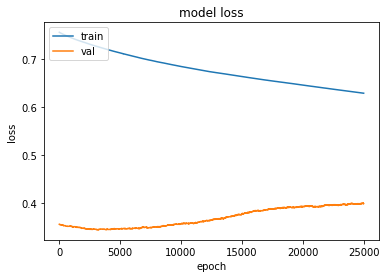

In [157]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

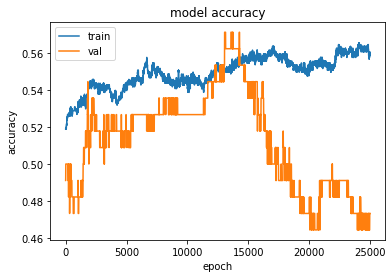

In [158]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<span style="color:green"> You are just not fitting ... Le